# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

### Импортируем планируемые к применению в проекте библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

### Открываем файл

In [2]:
#открываем с учетом разделителя

data = pd.read_csv('real_estate_data.csv', sep='\t' , decimal='.')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Выводим сводную информацию о таблице

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Выводим уникальные значения и изучаем структуру каждого столбца

#### Число фотографий квартиры в объявлении

In [4]:
print(sorted(data['total_images'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 37, 39, 42, 50]


In [5]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

<AxesSubplot:title={'center':'Распределение числа фотографий в объявлениях'}, ylabel='Frequency'>

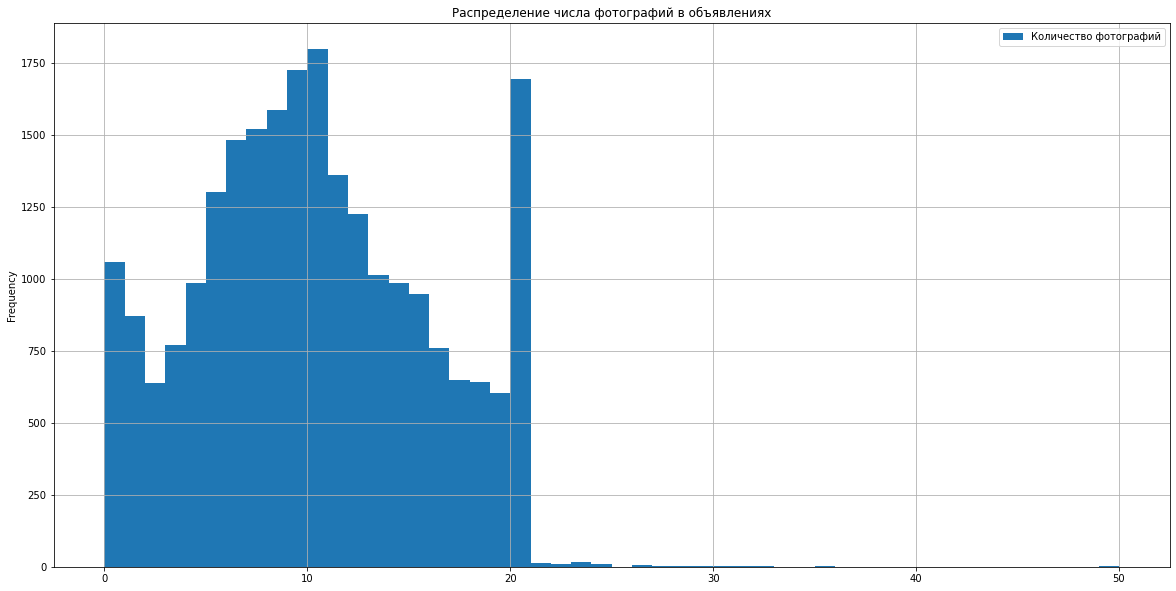

In [6]:
data.plot(
    kind='hist',
    y='total_images',
    figsize=[20,10],
    bins=50,
    linewidth=5,
    alpha=1,
    label='Количество фотографий',
    grid=True,
    legend=True,
    title='Распределение числа фотографий в объявлениях'
)

**Вывод**

Пропуски в данных отсутствуют. Гистограмма распределения показывает несколько локальных максимумов в районе 10 фотографий и 20. Скорее всего число в 20 не является аномалией, а стандартом количества фотографий для агенств по продаже недвижимости. Обычные же пользователи в среднем выкладывают 6-14 фотографий, при средней и медианной в районе 9-10.

Также следует отметить немалый массив пользователей, который вообще не выкладывают фотографии объекта. С учетом продаж квартир это видится достаточно странным, возможно следует обратить внимание на такие объявления в целях выявления мошешенников.

Предобработка не потребуется.

#### Цена на момент снятия с публикации

In [7]:
data['last_price'].describe().apply(lambda x: format(x, '.0f'))

count        23699
mean       6541549
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: object

In [8]:
print(sorted(data['last_price'].unique()))

[12190.0, 430000.0, 440000.0, 450000.0, 470000.0, 480000.0, 490000.0, 500000.0, 520000.0, 530000.0, 550000.0, 560000.0, 565000.0, 580000.0, 585000.0, 590000.0, 600000.0, 620000.0, 630000.0, 650000.0, 660000.0, 680000.0, 690000.0, 700000.0, 710000.0, 720000.0, 730000.0, 740000.0, 750000.0, 760000.0, 770000.0, 777000.0, 780000.0, 790000.0, 799000.0, 800000.0, 820000.0, 850000.0, 860000.0, 869000.0, 870000.0, 880000.0, 890000.0, 900000.0, 910000.0, 920000.0, 945750.0, 950000.0, 965780.0, 970000.0, 980000.0, 990000.0, 995000.0, 999000.0, 999999.0, 1000000.0, 1010000.0, 1020000.0, 1030000.0, 1050000.0, 1060000.0, 1070000.0, 1080000.0, 1090000.0, 1099000.0, 1100000.0, 1110000.0, 1130000.0, 1150000.0, 1170000.0, 1180000.0, 1190000.0, 1199000.0, 1200000.0, 1220000.0, 1230000.0, 1240000.0, 1249000.0, 1250000.0, 1260000.0, 1270000.0, 1280000.0, 1290000.0, 1300000.0, 1310000.0, 1315000.0, 1320000.0, 1330000.0, 1350000.0, 1353000.0, 1360000.0, 1370000.0, 1380000.0, 1390000.0, 1399000.0, 1400000.0,

Ограничим гистограму от 0 рублей до 10 млн. рублей (с учетом 75 перцентиля в 6,8 млн - покрывает бОльшую часть выборки)20 корзин для шага в 500 тыс. рублей.

<AxesSubplot:title={'center':'Распределение цены на момент снятия с публикации'}, ylabel='Frequency'>

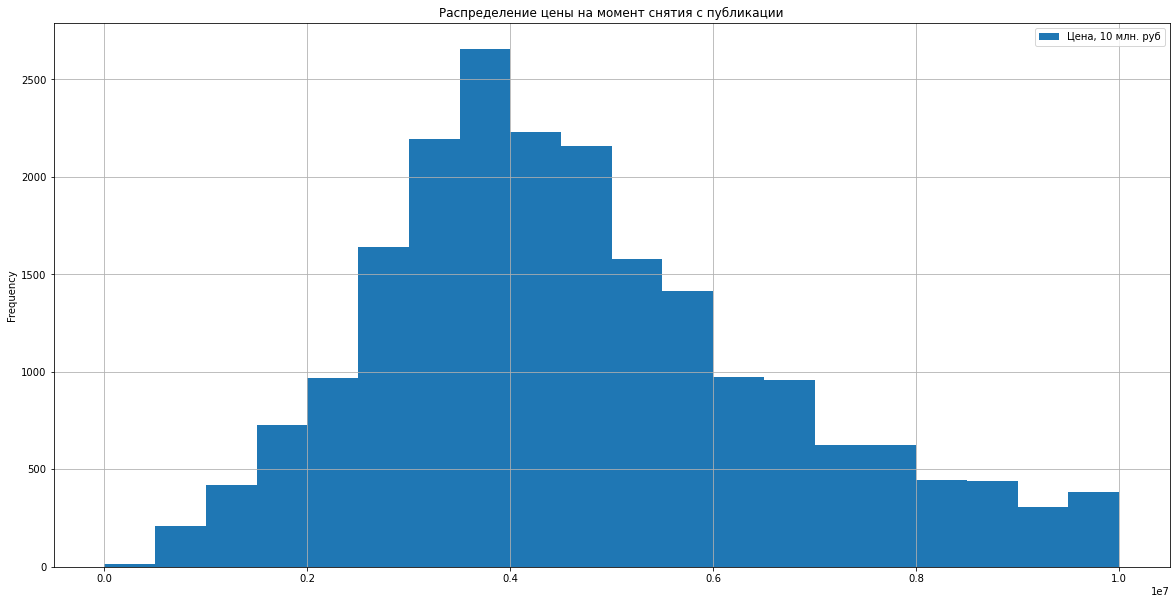

In [9]:
data.plot(
    kind='hist',
    y='last_price',
    figsize=[20,10],
    bins=20,
    range=(0, 10000000),
    linewidth=5,
    alpha=1,
    label='Цена, 10 млн. руб',
    grid=True,
    legend=True,
    title='Распределение цены на момент снятия с публикации'
)

**Вывод**

Для начала взглянем на крайние значения, квартиры за 12 тыс. рублей и 630 млн. рублей. И если 630 млн. рублей не вызывает подозрений (на 15.02.2022, согласно Авито, наиболее дорогая в продаже квартира в Спб стоит 750 млн. рублей - https://www.avito.ru/sankt-peterburg/kvartiry/5-k._apartamenty_540_m_16_et._2128823413)
То наиболее дешевая вызывает подозрения, т.к. на момент анализа наиболее дешевая составляет 150 тыс. рублей (https://www.avito.ru/efimovskiy/kvartiry/3-k._kvartira_61m_15et._2225999573)
С учетом следующей по порядку цены в 430 тыс. (реалистично для Ленобласти), требуется рассмотреть более детально квартиру за 12 тыс в следующем разделе.

Ограничение в 10 млн. на гистограме вызвано тем, что данные в 1 млн. и 630 млн. просто не влезают на 1 гистограму. В следующем разделе желательно разбить квартиры на несколько групп по ценовому диапозону, с учетом очевидного факта, что формирование цены на люксовые квартиры (100-630 млн, точные границы еще предстоит определить), несколько отличается от формирование цены на квартиры масс-маркет (с учетом медианы в 4,6 млн. рублей.

Пропуски отсутствуют. 
Возможно 2 пути форматирования числа - приведение к целочисленному формату, либо приведения к тыс. или млн. рублей. Для сохранения достаточной точности данных предлагается приведение к целочисленному формату в тыс. рублей.

#### Площадь квартиры в квадратных метрах

In [10]:
data['total_area'].describe().apply(lambda x: format(x, '.2f'))

count    23699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: object

In [11]:
print(sorted(data['total_area'].unique()))

[12.0, 13.0, 13.2, 14.0, 15.0, 15.5, 16.0, 17.0, 17.2, 17.6, 17.78, 18.0, 18.4, 18.5, 18.8, 18.9, 19.0, 19.5, 20.0, 20.1, 20.3, 20.5, 20.6, 20.67, 20.8, 21.0, 21.1, 21.3, 21.4, 21.57, 21.6, 21.7, 21.8, 21.89, 21.9, 22.0, 22.2, 22.23, 22.3, 22.4, 22.5, 22.7, 23.0, 23.06, 23.17, 23.29, 23.3, 23.39, 23.4, 23.5, 23.55, 23.6, 23.69, 23.7, 23.8, 23.98, 24.0, 24.05, 24.1, 24.2, 24.26, 24.3, 24.4, 24.42, 24.5, 24.6, 24.62, 24.64, 24.67, 24.7, 24.75, 24.8, 24.9, 25.0, 25.07, 25.15, 25.2, 25.27, 25.3, 25.33, 25.36, 25.4, 25.41, 25.48, 25.5, 25.53, 25.55, 25.6, 25.63, 25.7, 25.8, 25.9, 26.0, 26.05, 26.09, 26.1, 26.18, 26.2, 26.23, 26.4, 26.45, 26.49, 26.5, 26.6, 26.69, 26.7, 26.8, 26.9, 27.0, 27.1, 27.11, 27.2, 27.3, 27.32, 27.36, 27.4, 27.5, 27.55, 27.56, 27.6, 27.7, 27.8, 27.81, 27.9, 28.0, 28.01, 28.05, 28.1, 28.16, 28.2, 28.3, 28.4, 28.49, 28.5, 28.6, 28.61, 28.66, 28.7, 28.71, 28.8, 28.86, 28.9, 29.0, 29.1, 29.14, 29.2, 29.24, 29.3, 29.4, 29.45, 29.5, 29.54, 29.6, 29.61, 29.62, 29.7, 29.8, 2

In [12]:
#Ищем границу для визуального отсечения

data_len = len(data)

print('{:.2%}'.format(len(data.query('total_area > 500')) / data_len))
print('{:.2%}'.format(len(data.query('total_area > 400')) / data_len))
print('{:.2%}'.format(len(data.query('total_area > 300')) / data_len))
print('{:.2%}'.format(len(data.query('total_area > 200')) / data_len))
print('{:.2%}'.format(len(data.query('total_area > 180')) / data_len))
print('{:.2%}'.format(len(data.query('total_area > 100')) / data_len))

0.03%
0.10%
0.26%
0.96%
1.31%
7.75%


<AxesSubplot:title={'center':'Распределение площади'}, ylabel='Frequency'>

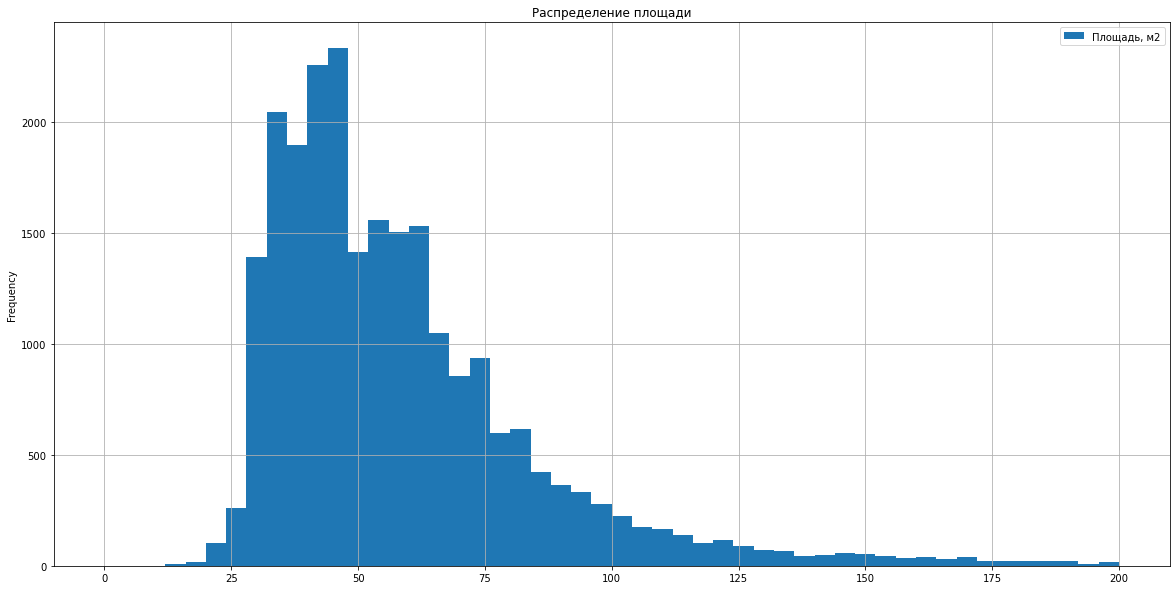

In [13]:
#Отсечем свыше 200 для целей визуализации (менее 1% от выборки площади)

data.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=50,
    range=(0, 200),
    linewidth=5,
    alpha=1,
    label='Площадь, м2',
    grid=True,
    legend=True,
    title='Распределение площади'
)

**Вывод**

Границы площади лежат в пределах реалистичных (мин = 12, макс 900, при нахождении в продаже мин 10м, макс = 1000м).

Пропуски отсутствуют.

Более детальный анализ в следующем разделе. 

#### Дата публикации

In [14]:
data['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

In [15]:
data['first_day_exposition'].min()

'2014-11-27T00:00:00'

In [16]:
data['first_day_exposition'].max()

'2019-05-03T00:00:00'

**Вывод**

Пропуски отсутствуют.

Потребуется перевод в формат даты.

Границы дат с 27 ноября 2014 года по 3 мая 2019 года. 

#### Число комнат

In [17]:
data['rooms'].describe().apply(lambda x: format(x, '.2f'))

count    23699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: object

In [18]:
print(sorted(data['rooms'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]


In [19]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

<AxesSubplot:title={'center':'Распределение комнат'}, ylabel='Frequency'>

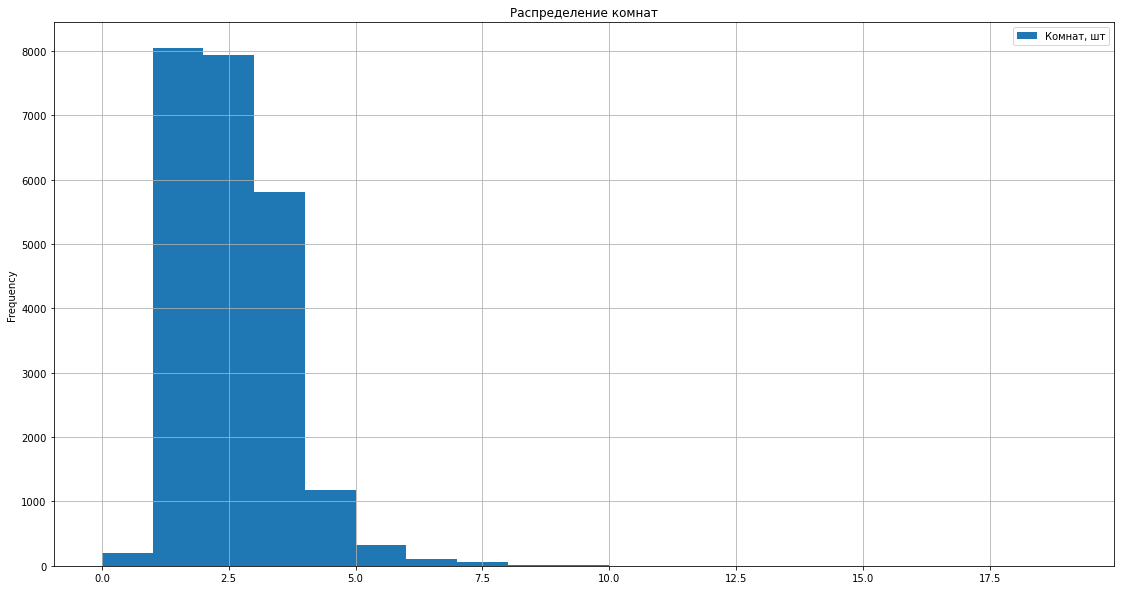

In [20]:
data.plot(
    kind='hist',
    y='rooms',
    figsize=[19,10],
    bins=19,
    linewidth=5,
    alpha=1,
    label='Комнат, шт',
    grid=True,
    legend=True,
    title='Распределение комнат'
)

**Вывод**

Пропуски отсутствуют.

Наибольшая часть выборки лежит в границах 1-3 комнат.

Имеются выбросывые уникальные значения (6 и более комнат = 195 штук или 0,82% от выборки - возможно исключить, либо выделить в отдельную группу и проанализировать отдельно, так же как и люксовые квартиры по стоимостному показателю).

Имеется 197 квартир с 0 числом комнат. Требуется более датальный анализ по другим параметрам для понимания природы ошибки - в следующем разделе. 

#### Высота потолков в м

In [21]:
data['ceiling_height'].describe().apply(lambda x: format(x, '.2f'))

count    14504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: object

In [22]:
print(sorted(data['ceiling_height'].unique()))

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

<AxesSubplot:title={'center':'Распределение высоты потолков'}, ylabel='Frequency'>

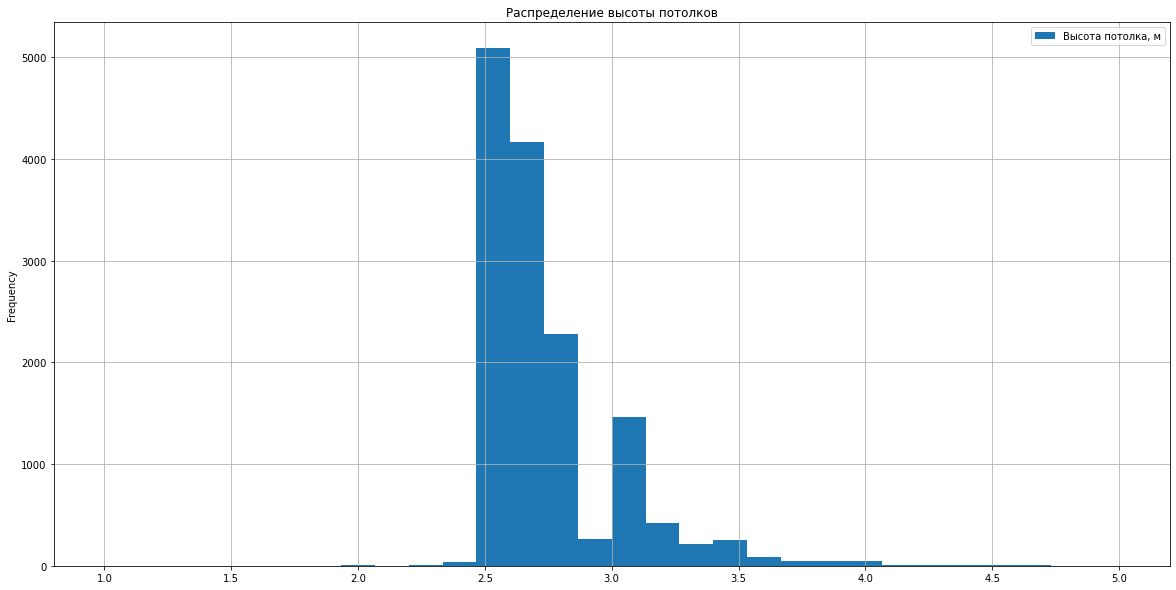

In [23]:
data.plot(
    kind='hist',
    y='ceiling_height',
    figsize=[20,10],
    bins=30,
    range=(1, 5),
    linewidth=5,
    alpha=1,
    label='Высота потолка, м',
    grid=True,
    legend=True,
    title='Распределение высоты потолков'
)

In [24]:
print('{:.2%}'.format(data['ceiling_height'].isna().mean()))

38.80%


**Выводы**

Имеются пропуски в размере 38,8% выборки.

Имеются выбросовые данные в обе стороны (потолки 1м или 100м).

Более детальный анализ в следующем разделе.

#### Всего этажей в доме

In [25]:
data['floors_total'].describe().apply(lambda x: format(x, '.2f'))

count    23613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: object

In [26]:
print(sorted(data['floors_total'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, nan, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0, 37.0, 52.0, 60.0]


<AxesSubplot:title={'center':'Распределение всего этажей в доме'}, ylabel='Frequency'>

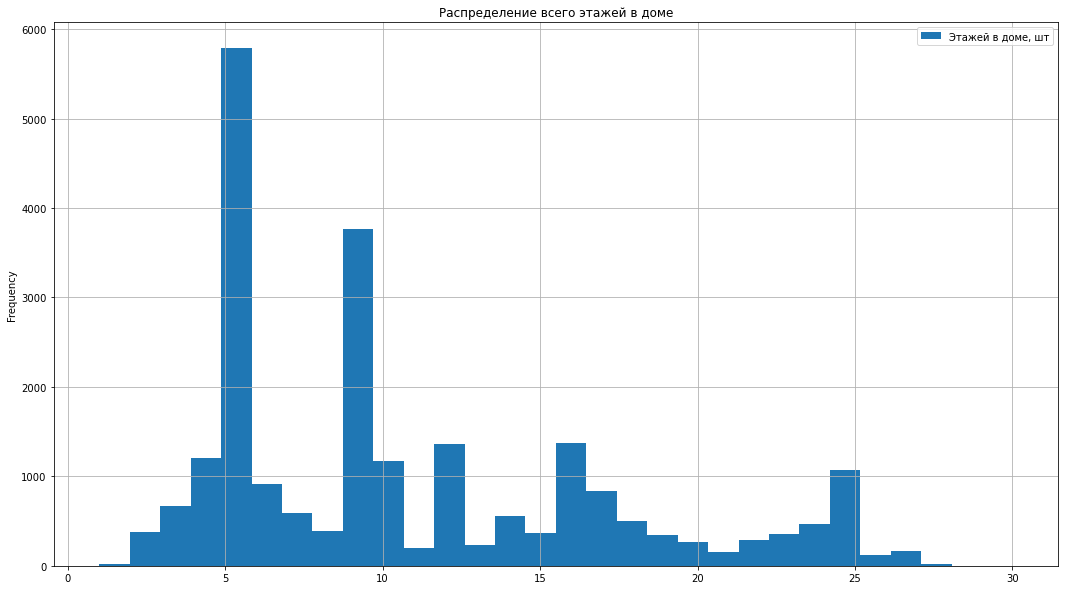

In [27]:
data.plot(
    kind='hist',
    y='floors_total',
    figsize=[18,10],
    bins=30,
    range=(1, 30),
    linewidth=5,
    alpha=1,
    label='Этажей в доме, шт',
    grid=True,
    legend=True,
    title='Распределение всего этажей в доме'
)

**Выводы**

В 86 строках отсутсвуют данные по этажам в доме.

Имеются выбросовые значения (наибольшая высота жилого здания в СПб - 32 этажа), возможно ошибка в проставлении лишнего 0 (например 60 этаж это 6). Требуется более детальный анализ.

Возможен перевод в формат int. 

#### Жилая площадь в квадратных метрах

In [28]:
data['living_area'].describe().apply(lambda x: format(x, '.2f'))

count    21796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: object

In [29]:
print(sorted(data['living_area'].unique()))

[2.0, 3.0, 9.0, 10.0, 10.6, 12.3, 12.7, 13.0, 14.0, 14.4, 14.47, 14.6, 14.7, 14.73, 15.0, 15.2, 15.35, 15.36, 15.4, 15.43, 15.9, 16.0, 16.1, 16.3, 16.5, 16.9, 17.0, 17.1, 17.2, 17.4, 17.5, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.6, 18.7, 19.0, 19.2, 19.3, 19.4, 20.3, 20.5, 20.75, 20.8, 21.4, 23.0, 24.75, 25.0, 25.4, 25.41, 26.0, 26.1, 26.4, 26.7, 27.0, 27.7, 28.0, 28.3, 28.4, 28.7, 28.73, 28.8, 28.9, 29.0, 29.1, 29.5, 29.6, 29.7, 29.8, 30.0, 30.04, 30.3, 30.8, 30.9, 31.0, 31.1, 31.48, 32.0, 32.5, 32.7, 33.0, 33.6, 33.7, 34.1, 34.2, 34.3, 34.4, 35.0, 36.6, 36.7, 37.0, 37.1, 37.7, 38.1, 38.5, 38.7, 38.8, 39.0, 39.7, 39.8, 40.4, 40.59, 41.0, 41.5, 42.0, 42.2, 42.4, 42.7, 42.8, 43.0, 43.1, 43.2, 43.4, 43.6, 43.78, 44.1, 44.9, 45.7, 46.5, 47.0, 47.4, 50.0, 50.9, 51.0, nan, 5.0, 5.4, 6.0, 6.5, 8.0, 8.3, 8.4, 8.5, 8.9, 9.1, 9.8, 10.08, 10.3, 10.4, 10.5, 10.52, 10.55, 10.7, 10.76, 10.8, 10.9, 10.93, 10.94, 11.0, 11.1, 11.15, 11.2, 11.3, 11.38, 11.4, 11.47, 11.5, 11.6, 11.7, 11.79, 11.88, 11.9, 

<AxesSubplot:title={'center':'Распределение жилой площади'}, ylabel='Frequency'>

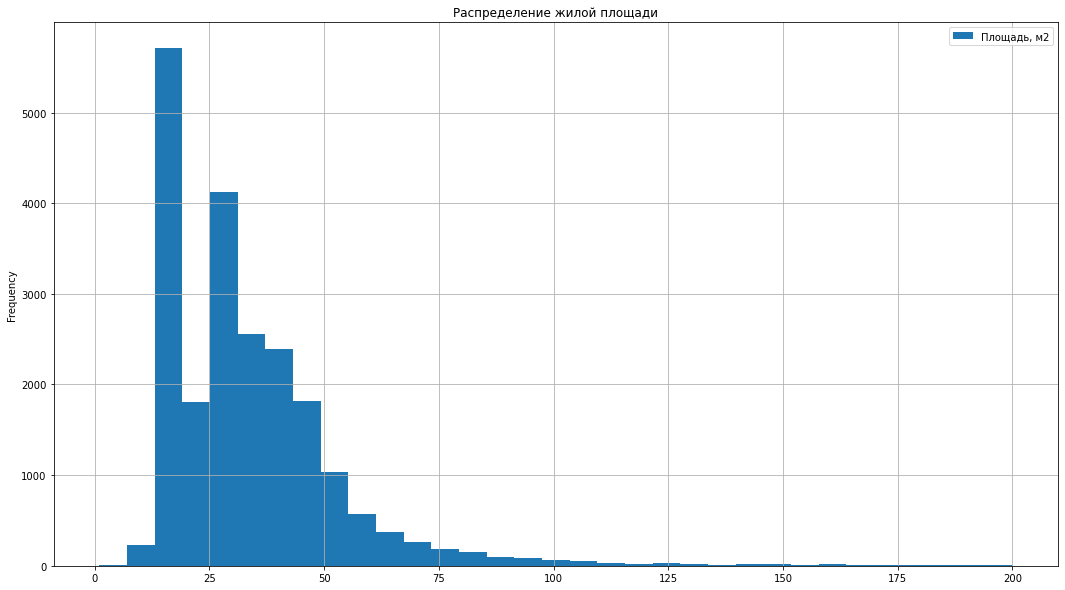

In [30]:
data.plot(
    kind='hist',
    y='living_area',
    figsize=[18,10],
    bins=33,
    range=(1, 200),
    linewidth=5,
    alpha=1,
    label='Площадь, м2',
    grid=True,
    legend=True,
    title='Распределение жилой площади'
)

In [31]:
print('{:.2%}'.format(data['living_area'].isna().mean()))

8.03%


**Выводы**

Имеются пропуски в данных (отсутствует 8% от общего числа данных)

Имеются слабореалистичные данные в нижней границе (2 и 3 жилых метра, при минимальных общих в 12м), хотя вполне возможно это квартира-студия и в ней действительно 2кв.м. жилой площади по документации. Требуется более детальный анализ. 

Имеются также реалистичные выбросы к верхней границе, от которых, тем не менее, придется избавиться на следующем этапе.

#### Этаж

In [32]:
data['floor'].describe().apply(lambda x: format(x, '.2f'))

count    23699.00
mean         5.89
std          4.89
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: object

In [33]:
print(sorted(data['floor'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


<AxesSubplot:title={'center':'Распределение этажей, продаваемых квартир'}, ylabel='Frequency'>

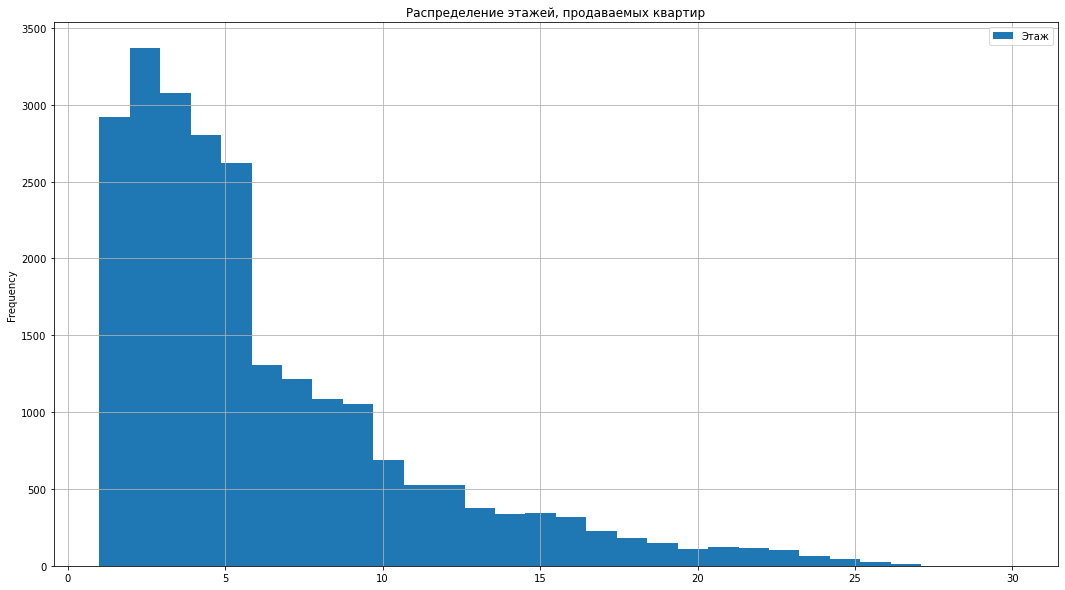

In [34]:
data.plot(
    kind='hist',
    y='floor',
    figsize=[18,10],
    bins=30,
    range=(1, 30),
    linewidth=5,
    alpha=1,
    label='Этаж',
    grid=True,
    legend=True,
    title='Распределение этажей, продаваемых квартир'
)

**Выводы**

Заполняемость 100%, при этом отсутствуют нереалистичные значения. Однако, с учетом наличия пропусков в столбце общего числа этажей в доме, могу возникнуть проблемы и классификации на категории по этажам. 

#### Апартаменты

In [35]:
data['is_apartment'].describe().apply(lambda x: format(x, '.2f'))

count     2775.00
unique       2.00
top          0.00
freq      2725.00
Name: is_apartment, dtype: object

In [36]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [37]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [38]:
print('{:.2%}'.format(data['is_apartment'].isna().mean()))

88.29%


**Выводы**

Заполняемость 12%, при этом, скорее всего, бОльшая часть значений nan означает, что данные квартиры не апартаменты.

Имеет смысл в дальнейшем перевести данные в формат 0/1. 

Также, возможно имело бы смысл провести корреляционный анализ апартов и не апартов с различными показателями (цена, сколько дней было размещено объявление) и сравнить этот анализ с данными по nan квартирам для подтверждения гипотезы, что nan это не апарты, однако, с учетом того, общее количество заполненных данных мало (12% от выборки), а число данных с true вообще 50 штук, что 0,2% от выборки, то корреляционный анализ имеет низкую точность из-за малой доступной базы заполненных данных. 

#### Квартира-студия

In [39]:
data['studio'].describe().apply(lambda x: format(x, '.2f'))

count     23699.00
unique        2.00
top           0.00
freq      23550.00
Name: studio, dtype: object

In [40]:
data['studio'].unique()

array([False,  True])

In [41]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

**Выводы**

100% заполняемость, при этом квартир-студий всего 0,6% от общего числа, что кажется немного нереалистичным, с учетом предложений на рынке. Скорее всего часть квартир продаются без обозначения, что это квартира студия, а как однокомнатные. Хорошее направление для анализа на мошенничество, однако не в рамках данной работы. 

#### Свободная планировка

In [42]:
data['open_plan'].describe().apply(lambda x: format(x, '.2f'))

count     23699.00
unique        2.00
top           0.00
freq      23632.00
Name: open_plan, dtype: object

In [43]:
data['open_plan'].unique()

array([False,  True])

In [44]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

**Выводы**

Похожая ситуация с прошлым показателем в части 100% заполняемости и низкой доли True. Однако, в данном случае возможное сокрытие, что квартира со свободной планировкой не несет мошеннического потенциала, поэтому низкое значение True не вызывает подозрений. 

#### Площадь кухни

In [45]:
data['kitchen_area'].describe().apply(lambda x: format(x, '.2f'))

count    21421.00
mean        10.57
std          5.91
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: object

In [46]:
print(sorted(data['kitchen_area'].unique()))

[1.3, 3.0, 4.5, 4.9, 5.0, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 7.0, 7.06, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.81, 8.9, 9.0, 9.1, 9.2, 9.36, 9.4, 9.5, 9.6, 9.7, 9.8, 10.0, 10.19, 10.2, 10.3, 10.4, 10.44, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.24, 11.3, 11.4, 11.5, 11.52, 11.6, 11.7, 11.9, 11.95, 12.0, 12.2, 12.4, 12.5, 12.7, 12.72, 12.9, 13.0, 13.1, 13.29, 13.4, 14.0, 14.1, 14.2, 14.4, 14.7, 15.0, 15.4, 15.7, 16.0, 16.3, 16.5, 17.5, 18.4, 19.0, 19.3, 20.0, 20.91, 21.3, 21.4, 21.5, 22.0, 23.8, 25.0, nan, 2.0, 2.3, 2.4, 2.89, 3.2, 3.3, 3.4, 3.5, 3.7, 3.8, 4.0, 4.1, 4.2, 4.3, 4.4, 4.6, 4.7, 4.8, 5.04, 5.06, 5.1, 5.14, 5.21, 5.23, 5.25, 5.28, 5.29, 5.31, 5.33, 5.35, 5.42, 5.44, 5.47, 5.49, 5.53, 5.59, 5.61, 5.62, 5.64, 5.65, 5.68, 5.74, 5.75, 5.78, 5.8, 5.82, 5.85, 5.86, 5.9, 5.91, 6.02, 6.03, 6.16, 6.19, 6.22, 6.23, 6.24, 6.25, 6.26, 6.27, 6.28, 6.31, 6.33, 6.35, 6.36, 6.37, 6.47, 6.55, 6.58, 6.

<AxesSubplot:title={'center':'Распределение площади кухни'}, ylabel='Frequency'>

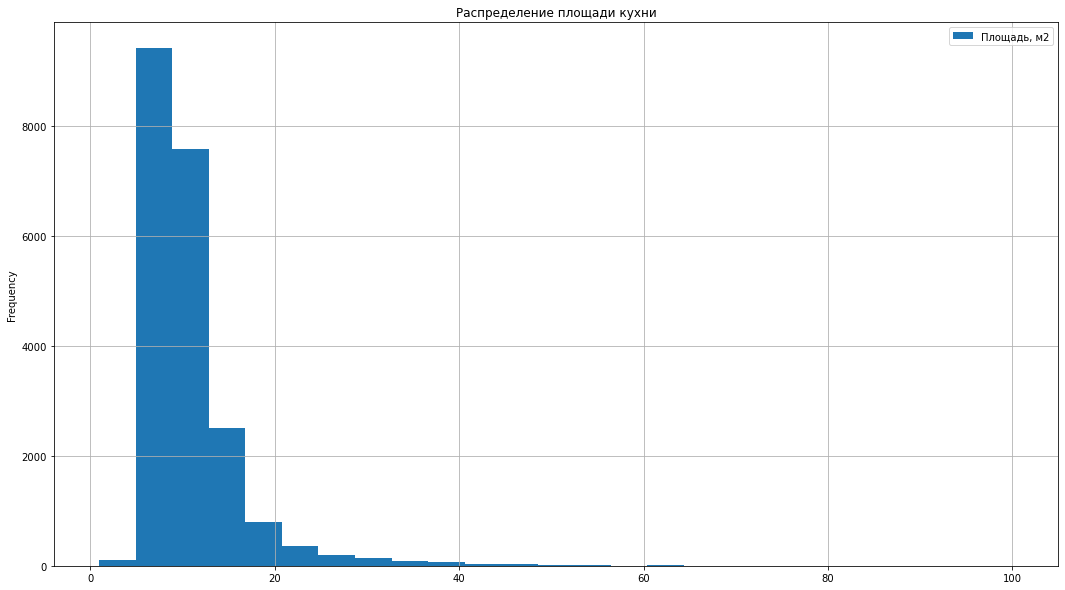

In [47]:
data.plot(
    kind='hist',
    y='kitchen_area',
    figsize=[18,10],
    bins=25,
    range=(1, 100),
    linewidth=5,
    alpha=1,
    label='Площадь, м2',
    grid=True,
    legend=True,
    title='Распределение площади кухни'
)

In [48]:
print('{:.2%}'.format(data['kitchen_area'].isna().mean()))

9.61%


**Выводы**

Процент пропусков примерно аналогичный данным по жилой площади. 

Реалистичность данных будет проверена в следующих разделах. 

#### Балкон

In [49]:
data['balcony'].describe().apply(lambda x: format(x, '.2f'))

count    12180.00
mean         1.15
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: object

In [50]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [51]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [52]:
print('{:.2%}'.format(data['balcony'].isna().mean()))

48.61%


**Выводы**

Около половины данных не заполнены. Возможно, что в данных квартирах нет балконов вообще, но нельзя исключать и ошибку при заведении лота для продажи. 

Также бросается в глаза, что количество квартир с 5 балконами больше, чем с 4 и 3 вместе взятыми. Сам факт наличия 5 балконов, при наличии в выборке квартир с 900 кв.м. метрами - не является чем-то нереалистичным, однако не соответсвует распределению Пуассона, которое должно доминировать, с учетом доминации обычных квартир как по сумме, так и по площадям (и как следствие, планировке). 

#### Название населенного пункта

In [53]:
data['locality_name'].unique()  

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [54]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [55]:
print('{:.2%}'.format(data['locality_name'].isna().mean()))

0.21%


In [56]:
print('{:.2%}'.format(len(data.query('locality_name == "Санкт-Петербург"')) / len(data['locality_name'])))

66.34%


**Выводы**

В столбце 364 названия населенных пунктов, заполняемость столбца почти 99%.

Санкт-Петербург представлен в 66% случаев. Создавать словарь с уникальными значениями для классификации не имеет смысл, однако в целях выполнения задания в шаге 4 имеет смысл классифицировать населенный пункт как 1 = Спб, 0 = не Спб. 

#### Расстояние до ближайшего аэропорта

In [57]:
data['airports_nearest'].describe().apply(lambda x: format(x, '.2f'))

count    18157.00
mean     28793.67
std      12630.88
min          0.00
25%      18585.00
50%      26726.00
75%      37273.00
max      84869.00
Name: airports_nearest, dtype: object

<AxesSubplot:title={'center':'Распределение расстояния до аэропорта'}, ylabel='Frequency'>

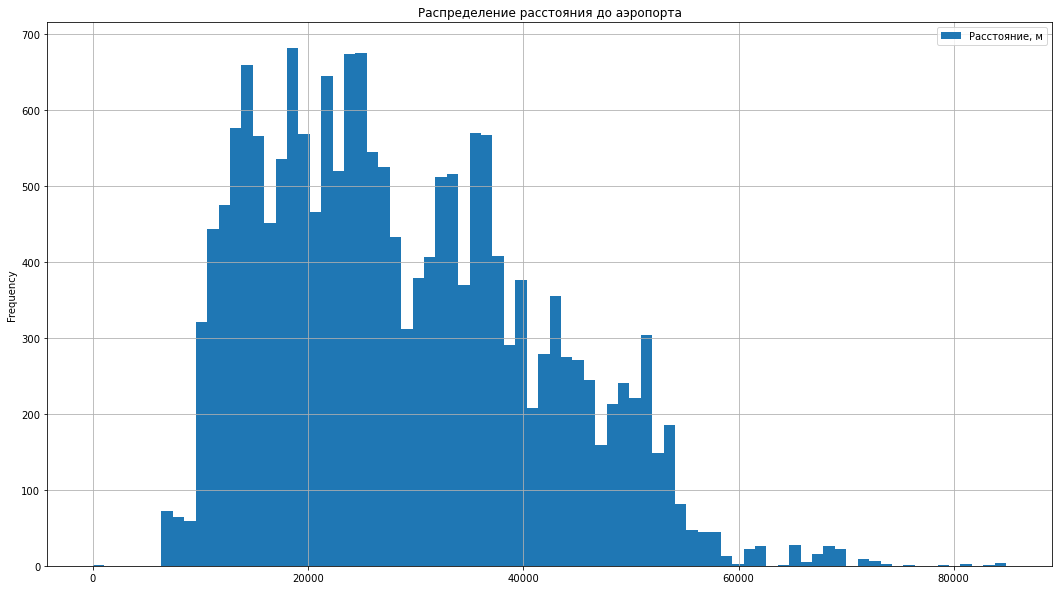

In [58]:
data.plot(
    kind='hist',
    y='airports_nearest',
    figsize=[18,10],
    bins=80,
    linewidth=5,
    alpha=1,
    label='Расстояние, м',
    grid=True,
    legend=True,
    title='Распределение расстояния до аэропорта'
)

In [59]:
print('{:.2%}'.format(data['airports_nearest'].isna().mean()))

23.38%


**Выводы**

Заполняемость 77%.

На первый взгляд, данные реалистичны, кроме наличия квартир с 0 км, что невозможно. Скорее всего данное значение вызвано ошибочным заведением данных при создании объявления. 

#### Расстояние до центра города

In [60]:
data['cityCenters_nearest'].describe().apply(lambda x: format(x, '.2f'))

count    18180.00
mean     14191.28
std       8608.39
min        181.00
25%       9238.00
50%      13098.50
75%      16293.00
max      65968.00
Name: cityCenters_nearest, dtype: object

<AxesSubplot:title={'center':'Распределение расстояния до центра города'}, ylabel='Frequency'>

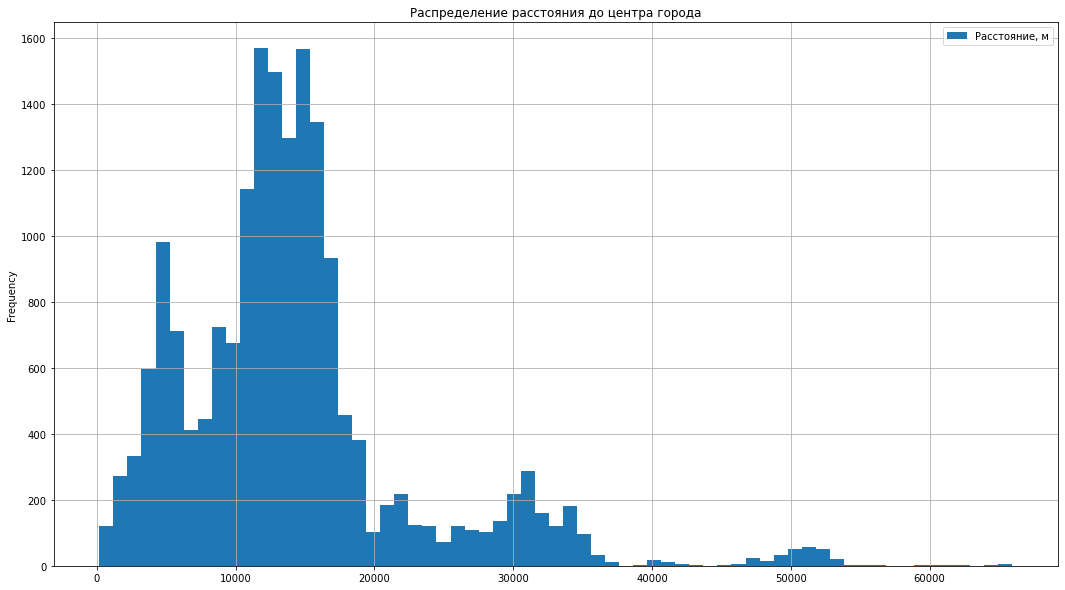

In [61]:
data.plot(
    kind='hist',
    y='cityCenters_nearest',
    figsize=[18,10],
    bins=65,
    linewidth=5,
    alpha=1,
    label='Расстояние, м',
    grid=True,
    legend=True,
    title='Распределение расстояния до центра города'
)

In [62]:
print('{:.2%}'.format(data['cityCenters_nearest'].isna().mean()))

23.29%


**Выводы**

Заполняемость 77%. При этом, стоит отметить, что достоверно заполнить пропуски по данному столбцу не получится, таким образом, в части анализа, где будет строиться зависимость различных параметров от удаленности от центра города - строки с пропущенными значениями будут отсутствовать. 

#### Число парков в радиусе 3км

In [63]:
data['parks_around3000'].describe().apply(lambda x: format(x, '.2f'))

count    18181.00
mean         0.61
std          0.80
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around3000, dtype: object

In [64]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [65]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [66]:
print('{:.2%}'.format(data['parks_around3000'].isna().mean()))

23.28%


**Выводы**

Заполняемость 77%, при этом, можно предположить, что отсутствующие значения это также показатель отсутствия парков недалеко от квартиры.

Возможен перевод данных в целочисленные показатели. 

#### Расстояние до ближайшего парка

In [67]:
data['parks_nearest'].describe().apply(lambda x: format(x, '.2f'))

count    8079.00
mean      490.80
std       342.32
min         1.00
25%       288.00
50%       455.00
75%       612.00
max      3190.00
Name: parks_nearest, dtype: object

In [68]:
print('{:.2%}'.format(data['parks_nearest'].isna().mean()))

65.91%


**Количество детей**

Заполняемость 34%, имеет смысл провести перекрестную проверку с предыдущим столбцом (например в предыдущем значение отсутствует, а в этом имеется километраж до ближайшего парка). Таким образом, можно будет проставить хотя бы 1 парк (или 0, если значение км более 3х).

#### Водоемы в радиусе 3км

In [69]:
data['ponds_around3000'].describe().apply(lambda x: format(x, '.2f'))

count    18181.00
mean         0.77
std          0.94
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          3.00
Name: ponds_around3000, dtype: object

In [70]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [71]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [72]:
print('{:.2%}'.format(data['ponds_around3000'].isna().mean()))

23.28%


**Выводы**

Вот мы и нашли законномерность работы картографических данных. Заполняемость кол-во парков и водоемов одинаковая до сотых долей (76,72%), таким образом, можно сделать вывод, что не заполнение этих полей вызвано одной причиной. Скорее всего это техническая особенность парсинга данных сервисом с карты. 

#### Расстояние до ближайшего водоема

In [73]:
data['ponds_nearest'].describe().apply(lambda x: format(x, '.2f'))

count    9110.00
mean      517.98
std       277.72
min        13.00
25%       294.00
50%       502.00
75%       729.00
max      1344.00
Name: ponds_nearest, dtype: object

In [74]:
print('{:.2%}'.format(data['ponds_nearest'].isna().mean()))

61.56%


**Выводы**

А вот тут картина несколько отличается, от аналогичного столбца по паркам, хотя и не существенно (38 и 34% заполняемости).

#### Дней с публикации до снятия

In [75]:
data['days_exposition'].describe().apply(lambda x: format(x, '.2f'))

count    20518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max       1580.00
Name: days_exposition, dtype: object

<AxesSubplot:title={'center':'Распределение дней с публикации до снятия объявления'}, ylabel='Frequency'>

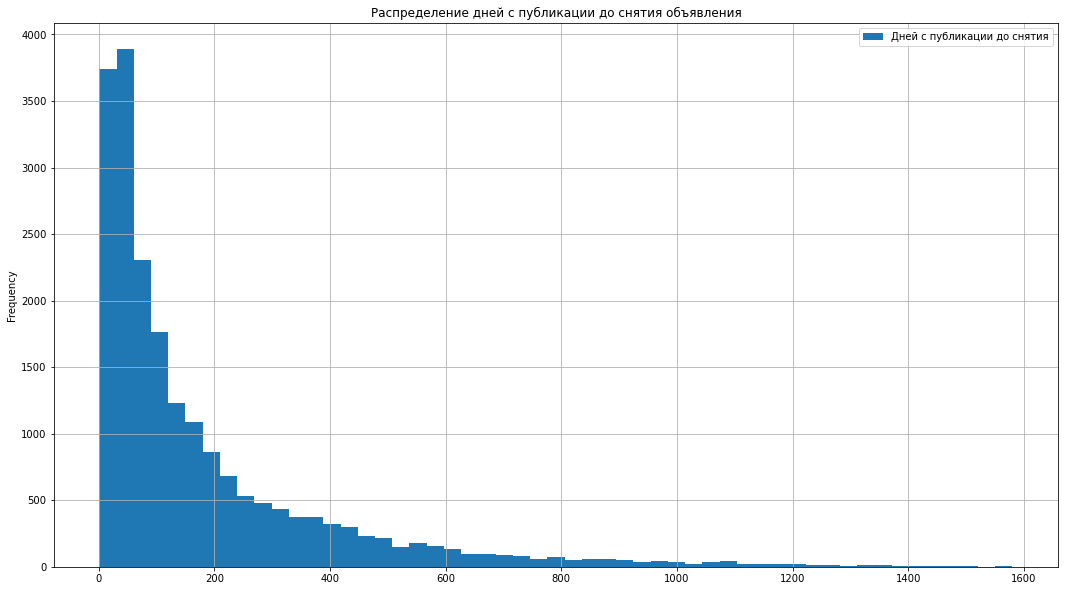

In [76]:
data.plot(
    kind='hist',
    y='days_exposition',
    figsize=[18,10],
    bins=53,
    linewidth=5,
    alpha=1,
    label='Дней с публикации до снятия',
    grid=True,
    legend=True,
    title='Распределение дней с публикации до снятия объявления'
)

In [77]:
print('{:.2%}'.format(data['days_exposition'].isna().mean()))

13.42%


**Выводы**

Заполняемость 87%, что может быть проблемой, при проведении анализа связанности срока продажи с другими факторами. При этом, данный столбец будет сложно восстановить по имеющимся данным, а приведение к средней или медиане при группировке, лишь подтвердит уже имеющийся паттерн. Логичнее будет использовать данные в наличии, без заполнения пропусков и ограничиться лишь убирание выбросов по верхней и нижней границе. 

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

По итогам анализа, было выявлено, что имеются пропуски в следующих столбцах:

* Высота потолков +;
* Всего этажей  +;
* Жилая площадь +;
* Апартаменты? +;
* Площадь кухни +;
* Балкон? +;
* Местоположение +;
* Расстояние до аэропорта -;
* Расстояние до центра -;
* Парков рядом +;
* Расстояние до парка;
* Водоемов рядом +;
* Расстояние до водоема;
* Срок объявления +;

Плюсом (+) отмечен тот параметр, заполнить который можно попробовать (в связи с другим или от средней/медианы), если не отмечен, то заполнение от средней или медианы будет нести низкую точность и корелляционный анализ по данному параметру еще больше будет смещен к среднему/медиане, что не имеет аналитического смысла для принятия решений или выводов.

Минусом (-), тот параметр, который критичный и заполнить его не представляется возможным.

Предварительный план на заполнение пропусков сформирован, работа со следующими столбцами:

* Высота потолков;
* Всего этажей;
* Жилая площадь;
* Апартаменты?;
* Площадь кухни;
* Балкон?;
* Местоположение;
* Парков рядом;
* Расстояние до парка;
* Водоемов рядом;
* Срок объявления +;

## Предобработка данных

### Определение и изучение пропущенных значений

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Всего этажей в доме

In [80]:
#Выведем количество пропусков

data['floors_total'].isna().sum()

86

In [81]:
#Изучим эти строчки

data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [82]:
#Аналитическим путем, удалось выявить, что можно найти тоже самое здание в других лотах
#(на примере первого здания(186 строки))

data.query('airports_nearest == 39197')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.8,4,NaN,...,12.0,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
6173,19,6280000.0,42.6,2017-10-31T00:00:00,1,2.92,17.0,NaN,16,NaN,...,NaN,2.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,23.0
14896,3,5950000.0,45.0,2016-02-09T00:00:00,1,2.90,17.0,19.4,17,NaN,...,11.5,2.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,193.0
18811,10,9300000.0,58.0,2017-05-12T00:00:00,2,2.70,17.0,34.0,11,NaN,...,12.0,2.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,107.0


In [83]:
#Второй пример (237 строка)

data.query('airports_nearest == 22041').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.8,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
2846,4,2325000.0,27.8,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
4617,4,4275062.0,61.2,2017-04-27T00:00:00,2,NaN,NaN,32.00,12,NaN,...,12.2,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0
5784,4,4262941.0,59.9,2017-04-02T00:00:00,2,NaN,NaN,31.70,18,NaN,...,11.9,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
6765,20,4895892.0,60.7,2015-03-12T00:00:00,2,NaN,24.0,31.90,3,NaN,...,12.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0
10013,4,4558637.0,64.4,2016-09-21T00:00:00,2,NaN,NaN,31.70,19,NaN,...,14.4,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,320.0
10027,4,4650259.0,67.5,2017-04-01T00:00:00,2,NaN,NaN,31.30,20,NaN,...,14.4,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,116.0


Таким образом, выявили, что пропуски в всего этажей это недозаполнение объявления. Возможно получится заполнить эти этажи при поиске аналогичного здания (по дистанции от аэропорта).

Что интересно, проверка выше выявила и ошибку в уже заполненных данных. Так, дома у нас одинаковые, но в части объявлений 24 этажа, а в части 23. Хотя, вполне возможно данное расхождение вызвано тем, что дом по подъездам не одной этажности (разница по СПб может доходить 3-5 этажей по разным подъездам). 

Ниже напишем функцию, которая группирует данные по дистанции до аэропорта и заполняет пропуски максимальным этажом (то есть, возможно расхождение между 23 и 24 этажом, на данном примере, но ожидается, что ошибка будет минимальной. 

In [84]:
data_transformed = data.groupby('airports_nearest')['floors_total'].transform('max')

data['floors_total'] = data['floors_total'].fillna(data_transformed)

In [85]:
#Осталось 22 строки, которые не смогли найти аналогичную недвижимость по дистанции от аэропорта

data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,NaN,NaN,19.00,12,NaN,...,10.30,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,95.0
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,NaN,NaN,NaN,1,NaN,...,NaN,0.0,посёлок Щеглово,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0
3831,5,4850000.0,37.40,2019-03-02T00:00:00,1,NaN,NaN,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4901,5,2200000.0,24.00,2018-10-22T00:00:00,0,NaN,NaN,NaN,6,NaN,...,NaN,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5187,5,3300000.0,25.40,2018-11-02T00:00:00,0,NaN,NaN,NaN,15,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6030,3,10900000.0,116.23,2017-05-05T00:00:00,4,NaN,NaN,NaN,24,NaN,...,NaN,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,83.0
8986,10,4850000.0,103.10,2018-07-10T00:00:00,3,NaN,NaN,68.10,4,NaN,...,16.70,NaN,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
9023,5,2900000.0,35.10,2018-07-18T00:00:00,1,NaN,NaN,NaN,11,NaN,...,NaN,NaN,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,26.0
10058,9,3350000.0,25.00,2018-09-10T00:00:00,1,2.65,NaN,17.00,21,NaN,...,3.50,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,23.0


Аналогично пройдем по дистанции от центра

In [86]:
data_transformed = data.groupby('cityCenters_nearest')['floors_total'].transform('max')

data['floors_total'] = data['floors_total'].fillna(data_transformed)

In [87]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,NaN,NaN,19.00,12,NaN,...,10.30,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,95.0
3831,5,4850000.0,37.40,2019-03-02T00:00:00,1,NaN,NaN,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4901,5,2200000.0,24.00,2018-10-22T00:00:00,0,NaN,NaN,NaN,6,NaN,...,NaN,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5187,5,3300000.0,25.40,2018-11-02T00:00:00,0,NaN,NaN,NaN,15,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6030,3,10900000.0,116.23,2017-05-05T00:00:00,4,NaN,NaN,NaN,24,NaN,...,NaN,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,83.0
8986,10,4850000.0,103.10,2018-07-10T00:00:00,3,NaN,NaN,68.10,4,NaN,...,16.70,NaN,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
9023,5,2900000.0,35.10,2018-07-18T00:00:00,1,NaN,NaN,NaN,11,NaN,...,NaN,NaN,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,26.0
10058,9,3350000.0,25.00,2018-09-10T00:00:00,1,2.65,NaN,17.00,21,NaN,...,3.50,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,23.0
10259,1,3440000.0,44.83,2016-05-25T00:00:00,2,NaN,NaN,NaN,5,NaN,...,NaN,0.0,поселок Мурино,51553.0,21888.0,0.0,NaN,2.0,133.0,46.0


Осталось 18 значений, по которым нет данных удаления от города и аэропорта и аналогичных домов по этим данных с известным количеством этажей.
Предлагается признать высоту их домов как высота продаваемой квартиры + 1 (чтобы избежать искажения количества квартир с последнего этажа, которых очевидно меньше, чем в классе "Другие")

In [88]:
data_transformed = data.groupby('floor')['floor'].transform(lambda x: (x.max() + 1))

data['floors_total'] = data['floors_total'].fillna(data_transformed)

In [89]:
#Все пропуски ушли

data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [90]:
#Проверим пару строк

print(data.loc[3031, 'floors_total'])
print(data.loc[3438, 'floors_total'])
print(data.loc[5187, 'floors_total'])
print(data.loc[10058, 'floors_total'])
print(data.loc[20738, 'floors_total'])

13.0
13.0
16.0
22.0
11.0


**Выводы**

Заполнение пропущенных значений по количеству этажей в здание прошло успешно, можно двигаться дальше.

#### Высота потолков

In [91]:
data['ceiling_height'].isna().sum()

9195

In [92]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Шаг 1. 
В этажах мы поняли, что можем найти здание, если проведем поиск через удаление от аэропорта и центра. Повторим это и в данном случае, с учетом того, что потолки в одном здание должны быть примерно одинаковые (на примере ниже у нас 2 здания, оба находятся на одинаковом удалении от аэро (28 км), но на разном от центра города). Поэтому поиск такого числа пропусков только по 1 параметру, как в прошлом разделе - будет неверным. 

Также, возможен случай, когда в 1 здании разная высота потолков (пример через строку), высота колеблется от 2.58 до 2.70. Такая разница может быть вызвана как ошибками при измерении, так и реальной разницой в связи с разной планировкой квартир. Также, на этом же примере можем увидеть, что, если судить по дистанции, дом один и тот же, но высота зданий по парадным/корпусам - разная. В данном случае предлагается брать среднюю (mean).
Однако, прежде чем проводить группировку по аэро и центру города и брать среднюю, предстоит избавиться от выбросовых значений, которые могут повлиять на среднюю (немного опередим то, что надо будет делать на 3 шаге), для большей точности расчетов. 

In [93]:
data.query('airports_nearest == 28098')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
8261,20,36000000.0,123.2,2018-01-14T00:00:00,1,3.0,14.0,31.2,7,NaN,...,58.4,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,61.0
11010,0,4550000.0,56.0,2017-08-15T00:00:00,2,NaN,9.0,34.3,9,NaN,...,9.9,1.0,посёлок Стрельна,28098.0,23352.0,2.0,763.0,1.0,1165.0,17.0
12223,20,59000000.0,127.5,2017-01-24T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,4.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,5.0
17537,6,3500000.0,38.1,2017-02-06T00:00:00,1,2.6,9.0,18.5,3,NaN,...,8.2,2.0,посёлок Стрельна,28098.0,23352.0,2.0,763.0,1.0,1165.0,703.0
20199,18,6600000.0,80.5,2018-09-19T00:00:00,3,2.6,9.0,49.1,5,NaN,...,10.8,2.0,посёлок Стрельна,28098.0,23352.0,2.0,763.0,1.0,1165.0,196.0
22709,20,59000000.0,127.5,2016-12-21T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,635.0


In [94]:
data.query('airports_nearest == 52996')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
40,9,3590000.0,36.0,2017-03-15T00:00:00,1,2.60,26.0,15.00,22,NaN,...,10.0,2.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,430.0
2108,15,3499000.0,32.7,2018-06-20T00:00:00,1,NaN,25.0,13.50,18,NaN,...,8.0,NaN,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,72.0
3049,2,3150000.0,37.0,2017-02-15T00:00:00,1,2.70,27.0,11.00,18,NaN,...,14.0,0.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,12.0
8543,16,4700000.0,53.0,2016-09-14T00:00:00,2,2.60,25.0,25.00,12,NaN,...,12.0,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,335.0
10734,6,3280000.0,34.0,2017-08-10T00:00:00,1,NaN,26.0,15.60,17,NaN,...,9.6,0.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,58.0
11358,3,3450000.0,37.0,2016-09-02T00:00:00,1,NaN,25.0,13.76,10,NaN,...,9.8,0.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,417.0
13184,10,3150000.0,34.6,2017-09-19T00:00:00,1,2.58,17.0,13.40,7,NaN,...,10.3,0.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,59.0
19434,4,3749000.0,39.0,2017-06-14T00:00:00,1,NaN,14.0,16.00,11,NaN,...,12.0,NaN,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,347.0


Рассмотрим еще раз разброс высоты потолков. 

<AxesSubplot:title={'center':'Разброс высоты потолков'}, ylabel='Frequency'>

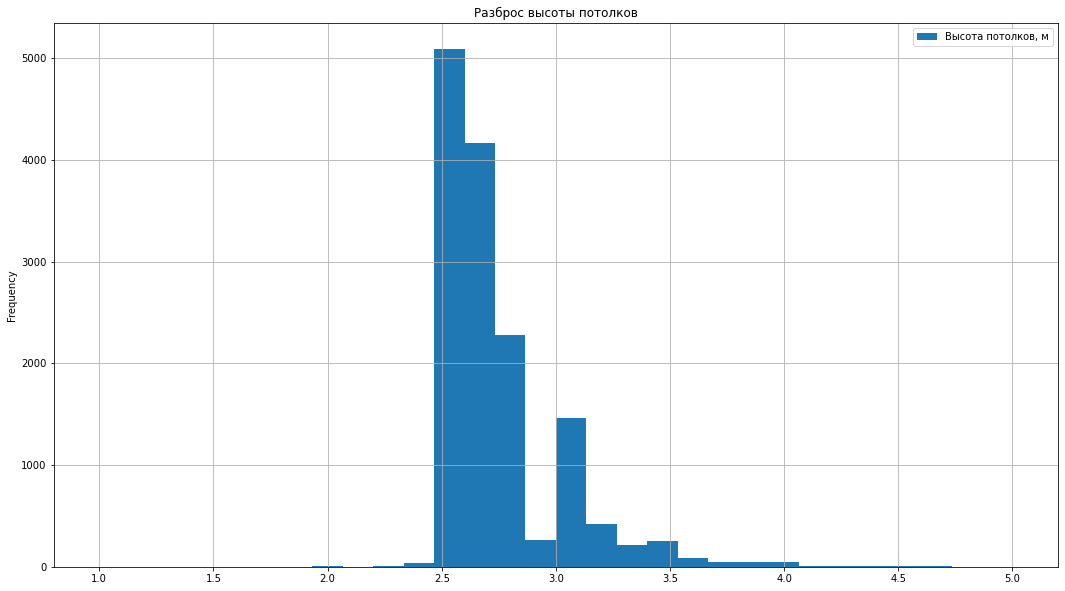

In [95]:
data.plot(
    kind='hist',
    y='ceiling_height',
    figsize=[18,10],
    bins=30,
    linewidth=5,
    range=(1,5),
    alpha=1,
    label='Высота потолков, м',
    grid=True,
    legend=True,
    title='Разброс высоты потолков'
)

In [96]:
print(sorted(data['ceiling_height'].unique()))

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

In [97]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Согласно ГОСТам и информации в различных источниках, минимальная высота потолков в жилых помещениях не менее 2.5 метра. В нежилых зонах допустима высота в 2.1. Как видно на гистограмме, максимум приходится как раз на 2.5м, а медиана лежит в районе 2,65м.

Оценим, какой % лежит в нижних значениях для определения уровня отсечения.

In [98]:
data_len = len(data)
print('{:.2%}'.format(len(data.query('ceiling_height < 2.6')) / data_len))
print('{:.2%}'.format(len(data.query('ceiling_height < 2.5')) / data_len))
print('{:.2%}'.format(len(data.query('ceiling_height < 2.4')) / data_len))

21.73%
0.31%
0.09%


Как видим, Гост не врет, значения менее 2.5 встречаются в 0.31% случаев, то есть скорее ошибочное заведение информации, измерения или какие-либо еще ошибки. В любом случае, жилым помещением высота ниже быть не может. 

Теперь определим верхнюю границу. Согласно информации в интернете, "средняя" верхняя планка находится на уровне 3.2м, при этом в сталинках высота может достигать и 3.6м. Понятно, что это не предел, особенно для люксовых зданий. 

In [99]:
print('{:.2%}'.format(len(data.query('ceiling_height > 3.5')) / data_len))
print('{:.2%}'.format(len(data.query('ceiling_height > 3.8')) / data_len))
print('{:.2%}'.format(len(data.query('ceiling_height > 4.0')) / data_len))

1.28%
0.62%
0.32%


Таким образом, сформируем функцию, которая поменяет пустые значения на медиану, по одинаковым зданиям (при наличии по ним данных о потолках, и при этом не будет брать в расчет средней потолки ниже 2.5 и выше 4 метров).

In [100]:
data_transformed = data[((data['ceiling_height'] > 2.49) & (data['ceiling_height'] < 4.01)) | (data['ceiling_height'].isna())].groupby(['airports_nearest', 'cityCenters_nearest'])['ceiling_height'].transform('median')

In [101]:
data['ceiling_height'] = data['ceiling_height'].fillna(data_transformed)

In [102]:
data['ceiling_height'].isna().sum()

5497

Отлично, заполнили чуть менее 4тыс. значений с высокой долей точности. 

Взглянем, какие пропуски остались. 

In [103]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.00,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Шагом 2, может быть заполнение уже через более слабую, но все же законномерность. В домах с одинаковым количеством этажей, скорее всего, будет примерно одинаковая высота потолков (так 5 или 9 этажей стандарт для панелек), а многоэтажки современного строительства, скорее всего со стандартными потолками в районе 2.5-2.7.

Раделим этот шаг на два подэтапа, в первом из которых будет более жесткий фильтр сравнения. Помимо этажности здания - по одинаковой площади кухонь. Задумка такая, типичная планировка во многом распространяется на нежилую площадь (кухня, санузлы), поэтому допфильтр через кузню позволит подобрать наиболее близкие варианты.

Затем пройдемся уже просто по этажности домов. 

In [104]:
data_transformed = data[((data['ceiling_height'] > 2.49) & (data['ceiling_height'] < 4.01)) | (data['ceiling_height'].isna())].groupby(['floors_total', 'kitchen_area'])['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(data_transformed)

In [105]:
data['ceiling_height'].isna().sum()

1383

In [106]:
#Отлично, такой фильтр убрал пробелов даже больше, чем мы ожидали. Теперь добьём пропуски более мягким фильтром

data_transformed = data[((data['ceiling_height'] > 2.49) & (data['ceiling_height'] < 4.01)) | (data['ceiling_height'].isna())].groupby('floors_total')['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(data_transformed)

In [107]:
data['ceiling_height'].isna().sum()

0

Отлично, пропуски устранены.
Сравним вновь полученный столбец с первоначальным по базовым показателям.

In [108]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.742484
std          0.994150
min          1.000000
25%          2.550000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**Выводы**

Заполнение пропусков прошло успешно, трехэтапный подход от самого жесткого и точного фильтра (поиск точно такого же дома с известными данными по потолкам), до перехода к поиску однотипных домов по этажности и площади кухонь, позволил избавиться от всех пропусков с достаточно высокой точностью (субъективная, конечно же, оценка;).

При этом, с учетом того, что было заполнено почти 39% выборки-упущенных значений, базовые показатели значительно не изменились. Так, средняя стала 2,74, ранее 2,77, медиана сохранилась на уровне 2.65 м. Изменение лишь добавилось в стандартном отклонении, ранее 1,26, сейчас 0,99, однако врядли это негативный фактор. Дальнейшая работа над этим параметром будет проведена в рамках исключения выбросов в Шаге 3.

#### Площадь кухни

Базовый алгоритм по работе с пропусками в площади кухонь предлагается оставить в том же русле:
- взглянуть на фронт работы;
- заполнить с учетом поиска дома по расстоянию до центра и аэро, а ТАКЖЕ количества комнат, т.к. очевидно, что в рамках 1 дома, планировка квартиры меняется с учетом количества комнат, тогда как высота потолков во время строительства одинаковая (плюс-минус);
- поиск типового дома по иным параметрам.

In [109]:
data['kitchen_area'].isna().sum()

2278

In [110]:
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.55,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.76,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.55,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [111]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [112]:
data_transformed = data.groupby(['airports_nearest', 'cityCenters_nearest', 'rooms'])['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(data_transformed)

In [113]:
data['kitchen_area'].isna().sum()

1631

In [114]:
#Поиск типового дома будем производить по этажности, а доп будем фильтровать количеством комнат

data_transformed = data.groupby(['floors_total', 'rooms'])['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(data_transformed)

In [115]:
data['kitchen_area'].isna().sum()

201

Отлично, большая часть пропусков ушла, теперь, следует отказаться от ключевого фильтра - кол-во комнат и подумать, в каком направлении работать.

Можно попробовать пройтись по поиску аналогичного дома, как в этапе, через удаленность от аэро и центра, то есть убрать комнаты. Либо поиск по этажности. 

С учетом того, что первый способ точнее находит точно такой же дом (этажность находит типовой и то не факт).
То начнем с первого варианта.

In [116]:
data_transformed = data.groupby(['airports_nearest', 'cityCenters_nearest'])['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(data_transformed)

In [117]:
data['kitchen_area'].isna().sum()

99

In [118]:
#Добьём пропуски через комнаты.

data_transformed = data.groupby('rooms')['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(data_transformed)

In [119]:
data['kitchen_area'].isna().sum()

0

In [120]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.511771
std          5.716485
min          1.300000
25%          7.100000
50%          9.200000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

**Выводы**

Результаты не могут не радовать, мы закрыли все пропуски, начиная от самого жесткого фильтра и к самому мягкому. Средняя и медиана изменились незначительно.

#### Жилая площадь

Поступим с жилой площадью - аналогичным образом, как с кухонной. 
При этом в данном случае мы будем плясать уже не только от количества комнат, но и от общей площади, т.к. если в случае кухни, что на 100 кв.м, что на 50, кухня плюс-минус одна и та же в небольшой диапазоне разброса значений, то вот жилая плозадь очевидно растет прямо-пропрционально росту общего метража и комнат.

In [121]:
data['living_area'].isna().sum()

1903

In [122]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Поищем в одинаковых домах похожие квартиры разными способами. 

In [123]:
data_transformed = data.groupby(['airports_nearest', 'cityCenters_nearest', 'total_area'])['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(data_transformed)

In [124]:
data['living_area'].isna().sum()

1847

In [125]:
#Негусто, но ожидаемо, попробуем иначе
#Поищем от общей площали, комнат и площади кухни

data_transformed = data.groupby(['kitchen_area', 'rooms', 'total_area'])['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(data_transformed)

In [126]:
data['living_area'].isna().sum()

1138

In [127]:
#Уже лучше, уберем площадь кухонь

data_transformed = data.groupby(['rooms', 'total_area'])['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(data_transformed)

In [128]:
data['living_area'].isna().sum()

212

Отлично, почти все. Осталось решить поискать в целом по площади

In [129]:
data_transformed = data.groupby('total_area')['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(data_transformed)

In [130]:
data['living_area'].isna().sum()

143

Не хочет сдаваться жилая площадь. Взглянем на остатки и подумаем, как можно их добить.

In [131]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
360,6,4990000.0,57.84,2018-08-22T00:00:00,2,2.65,27.0,NaN,13,NaN,...,10.19,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,60.0
802,5,8045000.0,73.08,2018-11-10T00:00:00,2,2.70,12.0,NaN,12,NaN,...,10.69,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1307,20,26558000.0,152.38,2017-01-11T00:00:00,5,2.75,17.0,NaN,12,NaN,...,14.61,5.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,625.0
1388,20,59800000.0,399.00,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,...,15.00,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
1464,6,21500000.0,122.50,2017-11-07T00:00:00,3,3.00,15.0,NaN,8,NaN,...,12.00,2.0,Санкт-Петербург,31744.0,4836.0,0.0,NaN,3.0,153.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22825,4,6100000.0,54.75,2018-07-25T00:00:00,2,2.75,19.0,NaN,13,NaN,...,12.96,NaN,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,60.0
22923,10,6552700.0,83.58,2018-02-20T00:00:00,3,2.71,21.0,NaN,5,NaN,...,10.15,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,428.0
23018,6,8555000.0,64.85,2019-04-24T00:00:00,2,3.10,14.0,NaN,13,NaN,...,11.70,2.0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,NaN
23324,14,9900000.0,59.09,2018-06-10T00:00:00,1,3.30,5.0,NaN,5,NaN,...,17.44,NaN,Санкт-Петербург,25965.0,4754.0,0.0,NaN,2.0,776.0,178.0


Остатки пропусков можно добить посредством расчета доли жилой площади в общей (создание нового столбца) и дальнейшей группировкой этих данных по количеству комнат. 

In [132]:
data['living_area_proportion'] = data['living_area'] / data['total_area']

In [133]:
data_transformed = data.groupby('rooms')['living_area_proportion'].transform('mean')
data['living_area'] = data['living_area'].fillna(data_transformed * data['total_area'])

In [134]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_proportion


In [135]:
data['living_area'].describe()

count    23699.000000
mean        34.612015
std         22.622664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

**Выводы**

Пропуски в жилой площади закрыти, хотя и не без костылей. Медиана и средняя без значительных изменений. 

#### Апартаменты

С учетом того, что апартаменты не являются ключевым параметром для анализа, то нет смысла что-то выдумывать, принимая во внимание, что апартаменты это правовой статус жилого помещения и не всегда есть зависимость между зданиями и прочими параметрами. Таким образом, заполним пустые значения значением unknown.

In [136]:
data['is_apartment'] = data['is_apartment'].fillna('unknown')

#### Балконы

Балконы это типичный признак планировки, поэтому имеет смысл попробовать поискать совпадения по домам и квартирам, оставшиеся значения указать как unknown.

In [137]:
data['balcony'].isna().sum()

11519

In [138]:
data_transformed = data.groupby(['airports_nearest', 'cityCenters_nearest', 'rooms'])['balcony'].transform('median')
data['balcony'] = data['balcony'].fillna(data_transformed)

In [139]:
data_transformed = data.groupby(['floors_total', 'rooms'])['balcony'].transform('median')
data['balcony'] = data['balcony'].fillna(data_transformed)

In [140]:
data['balcony'].isna().sum()

31

In [141]:
data['balcony'].describe().apply(lambda x: format(x, '.2f'))

count    23668.00
mean         1.09
std          0.89
min          0.00
25%          1.00
50%          1.00
75%          1.50
max          5.00
Name: balcony, dtype: object

In [142]:
data['balcony'] = data['balcony'].fillna('unknown')

#### Парки и озера

In [143]:
data['parks_around3000'].isna().sum()

5518

In [144]:
data['parks_nearest'].isna().sum()

15620

In [145]:
data['ponds_around3000'].isna().sum()

5518

In [146]:
data['ponds_nearest'].isna().sum()

14589

In [147]:
data_transformed = data.groupby(['airports_nearest', 'cityCenters_nearest'])['parks_nearest'].transform('median')
data['parks_nearest'] = data['parks_nearest'].fillna(data_transformed)

data_transformed = data.groupby(['airports_nearest', 'cityCenters_nearest'])['parks_around3000'].transform('median')
data['parks_around3000'] = data['parks_around3000'].fillna(data_transformed)

In [148]:
data['parks_around3000'].isna().sum()

5518

In [149]:
data['parks_nearest'].isna().sum()

15598

In [150]:
data_transformed = data.groupby(['airports_nearest', 'cityCenters_nearest'])['ponds_nearest'].transform('median')
data['ponds_nearest'] = data['ponds_nearest'].fillna(data_transformed)

data_transformed = data.groupby(['airports_nearest', 'cityCenters_nearest'])['ponds_around3000'].transform('median')
data['ponds_around3000'] = data['ponds_around3000'].fillna(data_transformed)

In [151]:
data['ponds_around3000'].isna().sum()

5518

In [152]:
data['ponds_nearest'].isna().sum()

14555

Какого то эффекта данная методика не оказала на заполняемость данных. Видимо из картографических данных получен максимум и больше данных из них не выцепить.

#### Локация

In [153]:
data['locality_name'].isna().sum()

49

Закроем часть пропусков по старой схеме - через нахождение идентичного дома по дистанции до аэро и центра. При этом, перед этим заполним в таблице-дубле пропуски как unknown (т.к. с пустыми значениями функция max не работает на столбце со string значениями). 

In [154]:
data_unknown = data[['locality_name', 'airports_nearest', 'cityCenters_nearest']]

In [155]:
#Предварительно заполним пропуски unknown для облегчения поиска в функции

data_unknown['locality_name'] = data_unknown['locality_name'].fillna('unknown')

In [156]:
data_unknown['locality_name'].isna().sum()

0

In [157]:
data_transformed = data_unknown.groupby(['airports_nearest', 'cityCenters_nearest'])['locality_name'].transform('max')
data['locality_name'] = data['locality_name'].fillna(data_transformed)

In [158]:
data['locality_name'].isna().sum()

8

Получилось заполнить большинство пропусков, осталось 8 без информации про дистанцию. Не будем изобретать велосипед и просто исключим эти значения из будущего анализа, создав новый столбец, который разделит локацию на 1. Спб, 2. Не спб 3. неизвестно.

В раздел неизвестно пойдет 8 пустых значений и 23 уже имеющихся, итого 31

In [159]:
data['locality_name'] = data['locality_name'].fillna('unknown')
data['locality_name'].isna().sum()

0

In [160]:
def location_cat(row):
    
    location = row['locality_name']
    
    if location == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif location == 'unknown':
        return 'unknown'
    else:
        return 'другой'

data['location_cat'] = data.apply(location_cat, axis=1)

In [161]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_proportion,location_cat
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,unknown,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,unknown,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,другой
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,unknown,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,54.0,9,unknown,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.339623,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,unknown,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,Санкт-Петербург


In [162]:
data['location_cat'].value_counts()

Санкт-Петербург    15739
другой              7929
unknown               31
Name: location_cat, dtype: int64

#### Срок объявления

In [163]:
data['days_exposition'].isna().sum()

3181

Проверим теорию, что отсутствие даты закрытия объявления обусловлено тем, что объявление еще не закрыто.

In [164]:
data.sort_values(by='first_day_exposition', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_proportion,location_cat
12003,10,950000.0,37.10,2019-05-03T00:00:00,1,3.00,4.0,17.00,4,False,...,деревня Курковицы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.458221,другой
14246,14,6200000.0,86.20,2019-05-03T00:00:00,3,2.75,10.0,49.50,7,unknown,...,деревня Куттузи,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574246,другой
3254,16,8800000.0,80.00,2019-05-03T00:00:00,3,2.80,17.0,31.00,15,unknown,...,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387500,другой
12343,12,2890000.0,48.80,2019-05-03T00:00:00,2,2.55,5.0,29.40,1,unknown,...,городской посёлок Рощино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.602459,другой
5986,0,5000000.0,48.00,2019-05-03T00:00:00,3,2.50,9.0,34.00,2,unknown,...,Санкт-Петербург,51060.0,16892.0,0.0,NaN,0.0,NaN,NaN,0.708333,Санкт-Петербург
12380,9,3900000.0,35.60,2019-05-03T00:00:00,1,2.50,12.0,18.00,12,unknown,...,Санкт-Петербург,41522.0,12331.0,2.0,371.0,0.0,NaN,NaN,0.505618,Санкт-Петербург
13993,6,3300000.0,43.00,2019-05-03T00:00:00,1,2.60,17.0,18.00,3,unknown,...,Колпино,28554.0,34341.0,0.0,NaN,3.0,287.0,NaN,0.418605,другой
17551,7,3200000.0,45.60,2019-05-03T00:00:00,2,2.50,5.0,30.90,5,False,...,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.677632,другой
8170,4,3280000.0,38.19,2019-05-03T00:00:00,1,3.00,6.0,14.41,4,unknown,...,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.377324,другой
9217,7,4300000.0,35.70,2019-05-03T00:00:00,1,2.70,21.0,15.00,12,False,...,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420168,другой


Все объявления, открыты 3 мая 2019 не имею срока окончания, скорее всего эта дата выгрузки датасета.
Для дальнейшей работы переведем дату в удобоворимый формат.

In [165]:
data['first_day_exposition_d'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [166]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_proportion,location_cat,first_day_exposition_d
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,unknown,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,Санкт-Петербург,2019-03-07
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,unknown,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,другой,2018-12-04
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,unknown,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,Санкт-Петербург,2015-08-20
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,54.0,9,unknown,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.339623,Санкт-Петербург,2015-07-24
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,unknown,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,Санкт-Петербург,2018-06-19


Логика простая, у нас есть часть объявлений, которые уже закрыты и имею данные по сроку размещения (предположительно продажи квартиры, т.к. объявление могли и просто снять, передумав). И есть часть обявлений без даты окончания, т.к. срок их предполагаемого закрытия лежит дальше, чем последняя дата в датасете (3 мая 19). 

Продлевать дату незакрытых объявлений до сегодняшнего числа будет неверно, врядли хоть какое-то объявление дожило до 2022 года, однако использовать в анализе расчет, что срок экспозиции = 3 мая 19 минус дата выставления объявления, тоже неверно (все объявления выставления в этот день или за несколько, по умолчанию станут продаваемыми менее чем за неделю). Легче отказаться от данных строк в анализе, чтобы не искажать результат, т.к. логического варианта заполнения срока продажи нет, а данных достаточно.

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  object        
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  float64       
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  object        
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            23699 non-null  float6

**Выводы**

Итак, мы провели масштабную работу по восстановлению потерянных данных, в части столбцов качество заполнение высокое (т.к. мы находили одинаковые дома, что сводило ошибку при заполнении данных по планировке к минимуму), в части не очень, однако остался один столбец, где полностью, на первый взгляд, восстановить данные не представляется возможным. Вернемся к нему в рамках 4 шага и посмотрим, что получится придумать.

А теперь проведем работу с типами данных.

### Приведение данных к нужным типам

Переведем столбец: всего этажей в целочисленный формат.

Стоимость и расстояние оставим в формате float, т.к. в следующем разделе мы будем их уменьшать, а при делении все равно будет получаться формат float, который, по мере потребности, мы и сделаем целочисленным. 

In [168]:
data['floors_total'] = data['floors_total'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  object        
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int32         
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  object        
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            23699 non-null  float6

## Расчёты и добавление результатов в таблицу

### Приведение цены к тысячам рублей

Создадим целочисленный столбец в тысячах рублей для более простого анлиза стоимостных показателей (копейки в рамках квартир, нам все таки не интересны)

In [169]:
data['price_th'] = data['last_price'] / 1000

In [170]:
data['price_th'] = data['price_th'].astype('int')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_proportion,location_cat,first_day_exposition_d,price_th
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,unknown,...,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,Санкт-Петербург,2019-03-07,13000
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,unknown,...,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,другой,2018-12-04,3350
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,unknown,...,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,Санкт-Петербург,2015-08-20,5196
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,54.0,9,unknown,...,6800.0,2.0,84.0,3.0,234.0,424.0,0.339623,Санкт-Петербург,2015-07-24,64900
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,unknown,...,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,Санкт-Петербург,2018-06-19,10000


### Добавление цены на квадратный метр

In [171]:
#В тысячах рублей

data['price_sq_m'] = data['price_th'] / data['total_area']

In [172]:
data['price_sq_m'] = data['price_sq_m'].astype('int')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_proportion,location_cat,first_day_exposition_d,price_th,price_sq_m
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,unknown,...,1.0,482.0,2.0,755.0,NaN,0.472222,Санкт-Петербург,2019-03-07,13000,120
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,unknown,...,0.0,NaN,0.0,NaN,81.0,0.460396,другой,2018-12-04,3350,82
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,unknown,...,1.0,90.0,2.0,574.0,558.0,0.612500,Санкт-Петербург,2015-08-20,5196,92
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,54.0,9,unknown,...,2.0,84.0,3.0,234.0,424.0,0.339623,Санкт-Петербург,2015-07-24,64900,408
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,unknown,...,2.0,112.0,1.0,48.0,121.0,0.320000,Санкт-Петербург,2018-06-19,10000,100


### Добавление дня недели, месяца и года публикации объявления

In [173]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition_d']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition_d']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition_d']).year
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_proportion,location_cat,first_day_exposition_d,price_th,price_sq_m,weekday,month,year
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,unknown,...,755.0,NaN,0.472222,Санкт-Петербург,2019-03-07,13000,120,3,3,2019
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,unknown,...,NaN,81.0,0.460396,другой,2018-12-04,3350,82,1,12,2018
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,unknown,...,574.0,558.0,0.612500,Санкт-Петербург,2015-08-20,5196,92,3,8,2015
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,54.0,9,unknown,...,234.0,424.0,0.339623,Санкт-Петербург,2015-07-24,64900,408,4,7,2015
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,unknown,...,48.0,121.0,0.320000,Санкт-Петербург,2018-06-19,10000,100,1,6,2018


### Добавление категории по этажу квартиры

In [174]:
def floor_cat(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_cat'] = data.apply(floor_cat, axis=1)

In [175]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,living_area_proportion,location_cat,first_day_exposition_d,price_th,price_sq_m,weekday,month,year,floor_cat
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,unknown,...,NaN,0.472222,Санкт-Петербург,2019-03-07,13000,120,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,unknown,...,81.0,0.460396,другой,2018-12-04,3350,82,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,unknown,...,558.0,0.612500,Санкт-Петербург,2015-08-20,5196,92,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,54.0,9,unknown,...,424.0,0.339623,Санкт-Петербург,2015-07-24,64900,408,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,unknown,...,121.0,0.320000,Санкт-Петербург,2018-06-19,10000,100,1,6,2018,другой


### Соотношение жилой и общей площади, также кухни к общей

In [176]:
data['living_area_proportion'] = (data['living_area'] / data['total_area']).apply(lambda x: format(x, '.2f'))
data['kitchen_area_proportion'] = (data['kitchen_area'] / data['total_area']).apply(lambda x: format(x, '.2f'))

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_proportion,location_cat,first_day_exposition_d,price_th,price_sq_m,weekday,month,year,floor_cat,kitchen_area_proportion
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,unknown,...,0.47,Санкт-Петербург,2019-03-07,13000,120,3,3,2019,другой,0.23
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,unknown,...,0.46,другой,2018-12-04,3350,82,1,12,2018,первый,0.27
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,unknown,...,0.61,Санкт-Петербург,2015-08-20,5196,92,3,8,2015,другой,0.15
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,54.0,9,unknown,...,0.34,Санкт-Петербург,2015-07-24,64900,408,4,7,2015,другой,0.07
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,unknown,...,0.32,Санкт-Петербург,2018-06-19,10000,100,1,6,2018,другой,0.41


### Приведение расстояний к км

In [177]:
data['city_center_km'] = (data['cityCenters_nearest'] / 1000).apply(lambda x: format(x, '.3f'))
data['airports_km'] = (data['airports_nearest'] / 1000).apply(lambda x: format(x, '.3f'))
data['parks_km'] = (data['parks_nearest'] / 1000).apply(lambda x: format(x, '.3f'))
data['ponds_km'] = (data['ponds_nearest'] / 1000).apply(lambda x: format(x, '.3f'))
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_sq_m,weekday,month,year,floor_cat,kitchen_area_proportion,city_center_km,airports_km,parks_km,ponds_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,unknown,...,120,3,3,2019,другой,0.23,16.028,18.863,0.482,0.755
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,unknown,...,82,1,12,2018,первый,0.27,18.603,12.817,nan,nan
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,unknown,...,92,3,8,2015,другой,0.15,13.933,21.741,0.090,0.574
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,54.0,9,unknown,...,408,4,7,2015,другой,0.07,6.800,28.098,0.084,0.234
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,unknown,...,100,1,6,2018,другой,0.41,8.098,31.856,0.112,0.048


### Последние визуальные правки

In [178]:
data['living_area'] = data['living_area'].apply(lambda x: format(x, '.2f'))
data['living_area'] = data['living_area'].astype('float')
data['city_center_km'] = data['city_center_km'].astype('float')
data['kitchen_area_proportion'] = data['kitchen_area_proportion'].astype('float')
data['airports_km'] = data['airports_km'].astype('float')
data['parks_km'] = data['parks_km'].astype('float')
data['ponds_km'] = data['ponds_km'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  float64       
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  object        
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23699 non-null  int32         
 7   living_area              23699 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  object        
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             23699 n

### Вывод

Ключевые параметры для дальнейшего анализа заполнены, типы данных приведены к нормальному виду, теперь можно формировать таблицу для дальнейшего анализа.

In [179]:
data_new = data[['price_th', 'price_sq_m', 'total_area', 'rooms', 'ceiling_height', 'floor_cat', 'location_cat', 'locality_name', 'city_center_km', 'days_exposition', 'year', 'month', 'weekday']]
data_new

,price_th,price_sq_m,total_area,rooms,ceiling_height,floor_cat,location_cat,locality_name,city_center_km,days_exposition,year,month,weekday
0,13000,120,108.00,3,2.70,другой,Санкт-Петербург,Санкт-Петербург,16.028,NaN,2019,3,3
1,3350,82,40.40,1,2.75,первый,другой,посёлок Шушары,18.603,81.0,2018,12,1
2,5196,92,56.00,2,2.55,другой,Санкт-Петербург,Санкт-Петербург,13.933,558.0,2015,8,3
3,64900,408,159.00,3,3.00,другой,Санкт-Петербург,Санкт-Петербург,6.800,424.0,2015,7,4
4,10000,100,100.00,2,3.03,другой,Санкт-Петербург,Санкт-Петербург,8.098,121.0,2018,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700,72,133.81,3,3.70,другой,Санкт-Петербург,Санкт-Петербург,4.232,NaN,2017,3,1
23695,3100,52,59.00,3,2.55,другой,другой,Тосно,NaN,45.0,2018,1,0
23696,2500,44,56.70,2,2.80,первый,другой,село Рождествено,NaN,NaN,2018,2,6
23697,11475,149,76.75,2,3.00,другой,Санкт-Петербург,Санкт-Петербург,10.364,602.0,2017,3,1


## Исследовательский анализ данных

### Изучение основных параметров

#### Площадь

In [180]:
data_new['total_area'].describe().apply(lambda x: format(x, '.2f'))

count    23699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: object

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

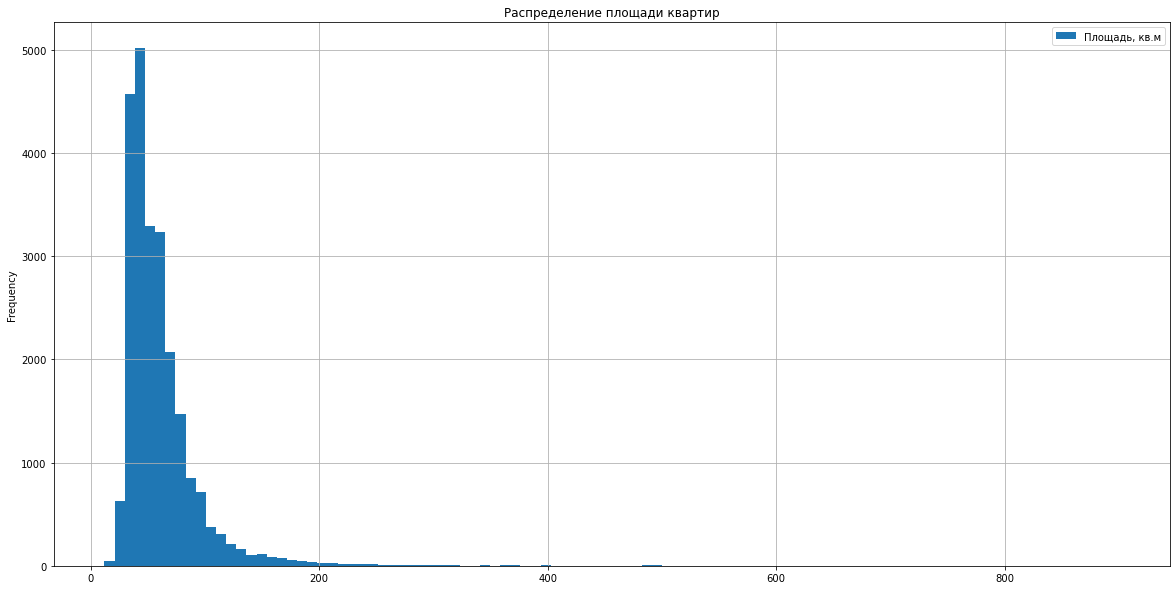

In [181]:
#Построим гистограмму без ограничений

data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=100,
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
) 

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

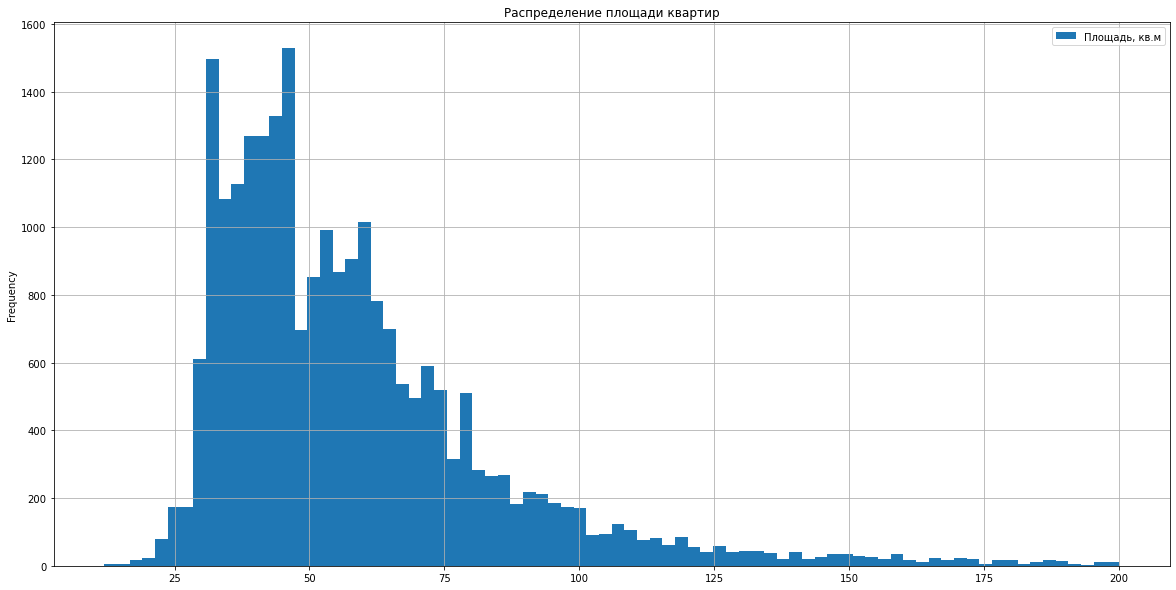

In [182]:
#Так не пойдет, ограничимся 200 метрами сверху и 12 снизу

data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    range=(12, 200),
    bins=80,
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
) 

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

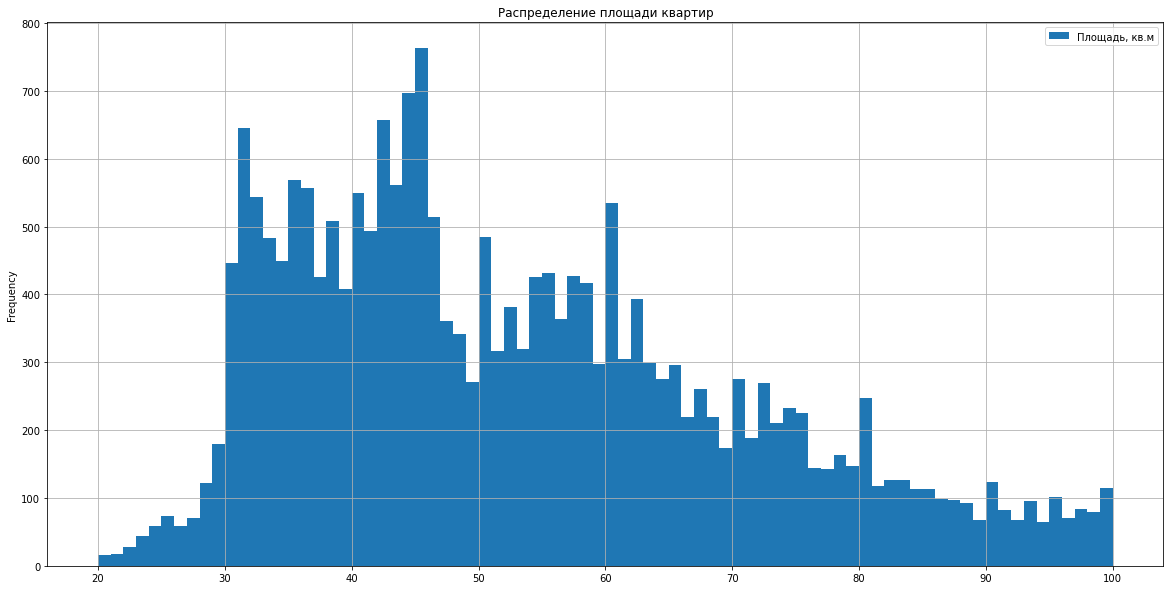

In [183]:
#Взглянем детальнее на основную долю выборки

data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    range=(20, 100),
    bins=80,
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
) 

**Выводы**

Отлично, выходит типичное распределение Пуассона с длинным коротким хвостом. В одном из следующих разделов определим границу, по которой мы ограничим выборку.

Среднее несколько завышено по сравнению с медианой.
Видны пики на 45 и 46 метрах, а также выбивающиеся локальные максимумы например на 31 метрах, 50, 60 и 80, что может свидетельствовать о достаточном большом числе типовых квартир в продаже. 

При этом, на основании ограничения выбросов по площади, числу комнат, высоте потолков и стоимости мы создадим новый датасет и в рамках шага 4.4 сравним, как меняется корелляция цены по базовому датасету и очищенному. 

#### Цена

In [184]:
data_new['price_th'].describe().apply(lambda x: format(x, '.0f'))

count     23699
mean       6542
std       10887
min          12
25%        3400
50%        4650
75%        6800
max      763000
Name: price_th, dtype: object

<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

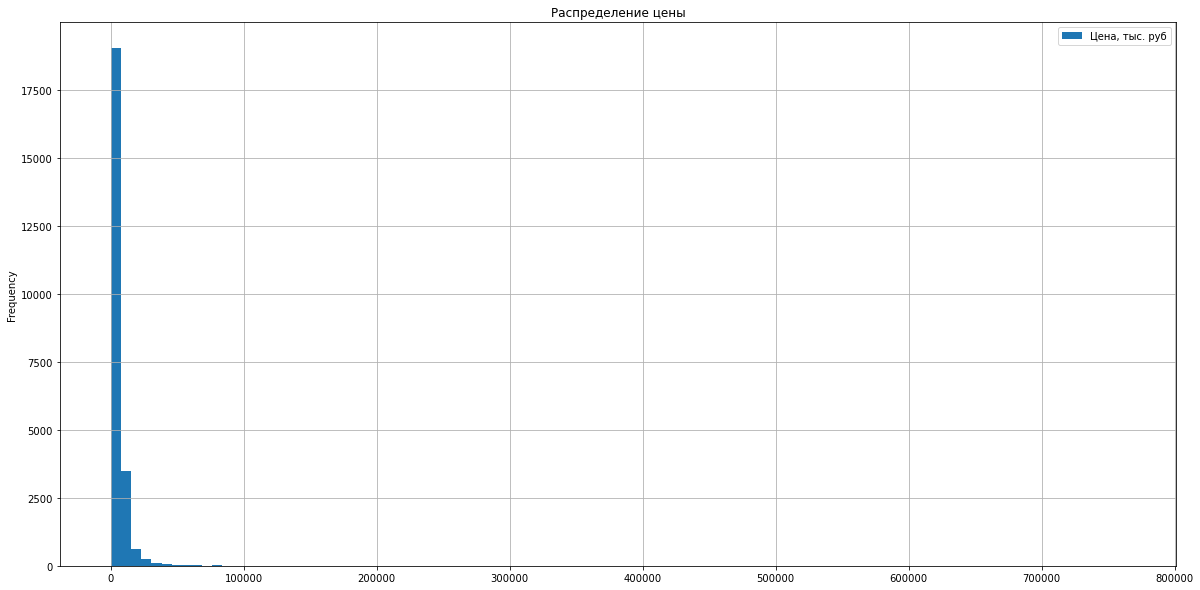

In [185]:
#Построим гистограмму без ограничений

data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    bins=100,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. руб',
    grid=True,
    legend=True,
    title='Распределение цены'
)

<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

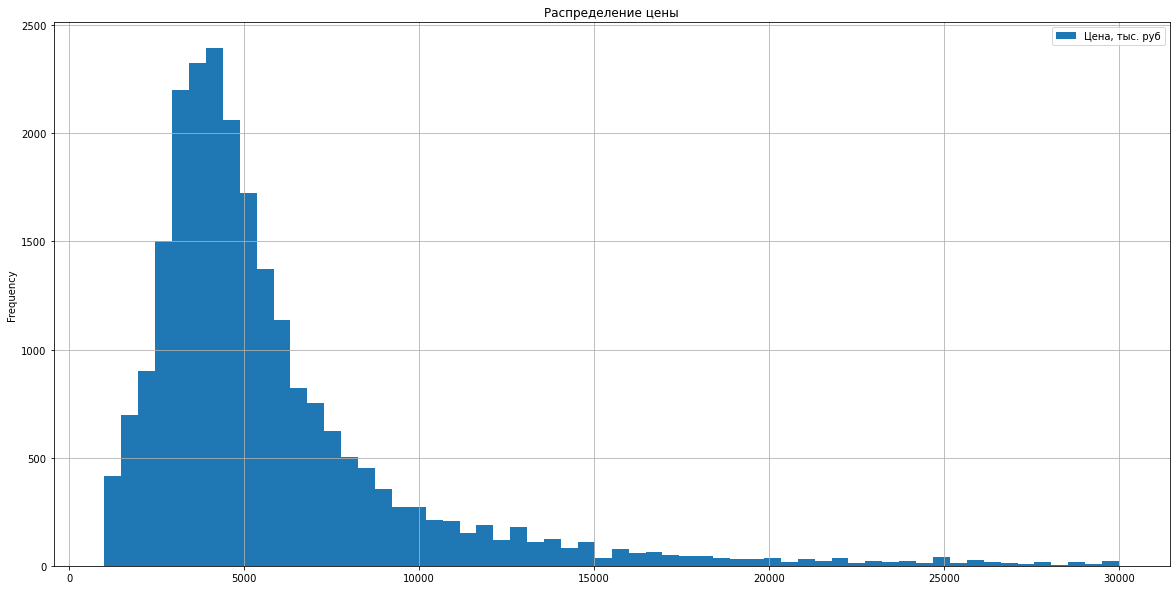

In [186]:
#Средняя находится рядом с 75 перцентилем, 
#что говорит о наличии определенного числа уникальных квартир в продаже по заоблочной цене, 
#что и искажает статистику, ограничим данные 1 млн и 30 млн. рублей, шаг корзин 500 тыс. рублей

data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    range=(1000, 30000),
    bins=60,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. руб',
    grid=True,
    legend=True,
    title='Распределение цены'
) 

<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

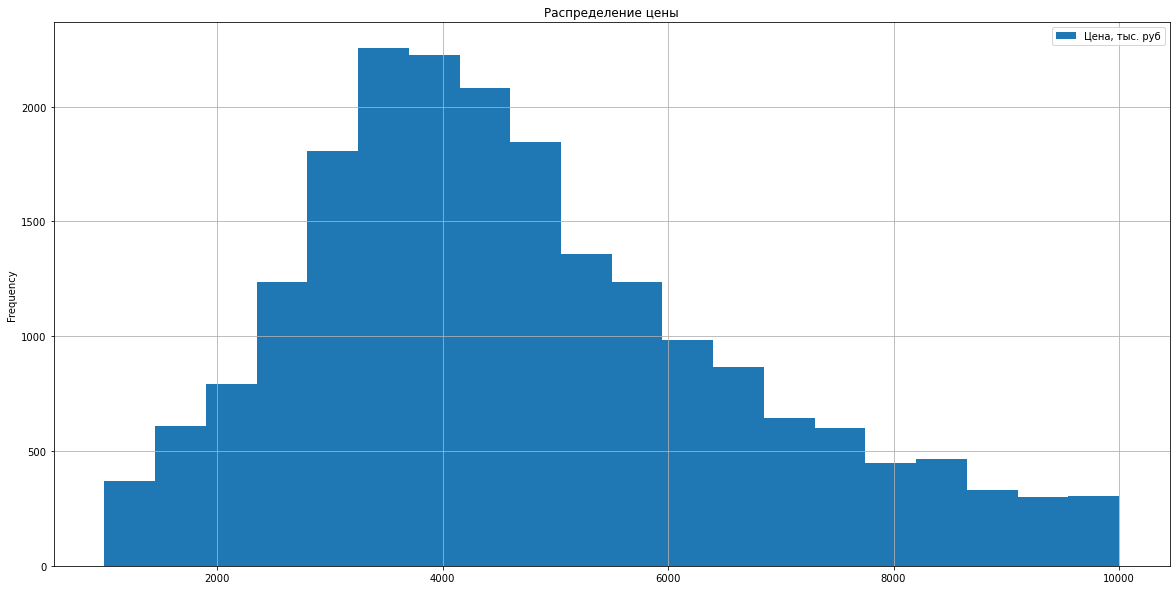

In [187]:
#Основная масса лежит до 10-15 млн, взглянем поближе, шаг корзин 500 тыс

data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    range=(1000, 10000),
    bins=20,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. руб',
    grid=True,
    legend=True,
    title='Распределение цены'
) 

**Выводы**

В рамках цены влияние выбросовых значений в верхней границе оказывает более сильное искажающее влияние на выборку, чем площадь. Так средняя приближается к 75 перцентилю, а хвост, на общей гистограмме, тянется уже от 30-50 млн до 763.

#### Число комнат

In [188]:
data_new['rooms'].describe().apply(lambda x: format(x, '.0f'))

count    23699
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: object

In [189]:
data_new['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

<AxesSubplot:ylabel='Frequency'>

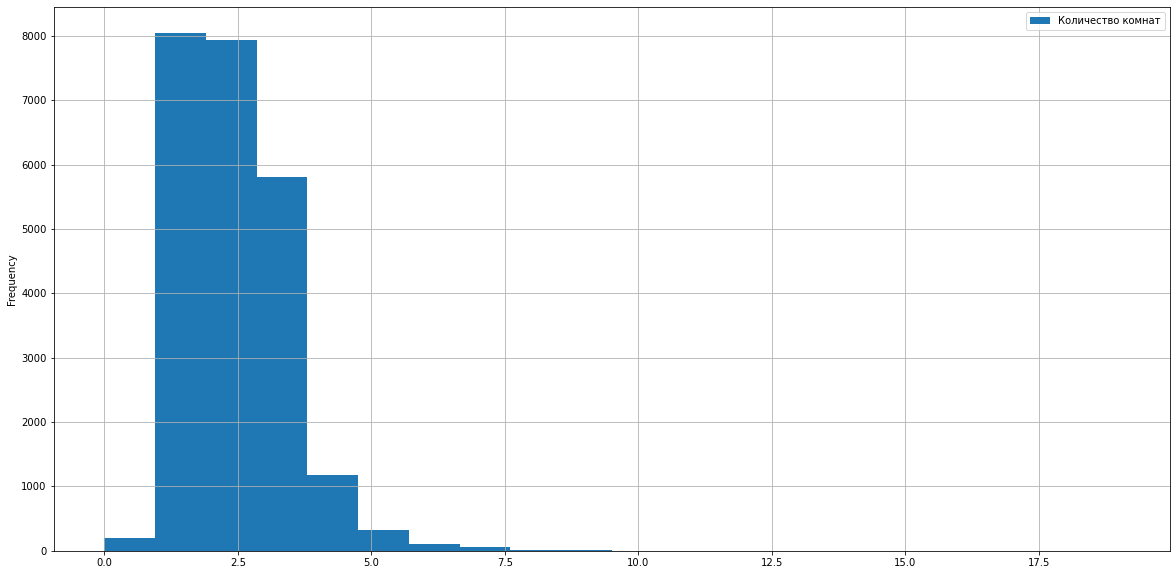

In [190]:
#Построим гистограмму без ограничений

data_new.plot(
    kind='hist',
    y='rooms',
    figsize=[20,10],
    bins=20,
    linewidth=5,
    alpha=1,
    label='Количество комнат',
    grid=True,
    legend=True,
)

**Выводы**

Имеются единичные выбросовые значения, которые можно исключить (0 комнат - возможно техническая ошибка при заведении объявления или нежелания продавца указывать число комнат, а также число комнат более 5-7 (более детально в следующих разделах)).

#### Высота потолков

In [191]:
data_new['ceiling_height'].describe().apply(lambda x: format(x, '.2f'))

count    23699.00
mean         2.74
std          0.99
min          1.00
25%          2.55
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: object

<AxesSubplot:title={'center':'Распределение высоты потолков'}, ylabel='Frequency'>

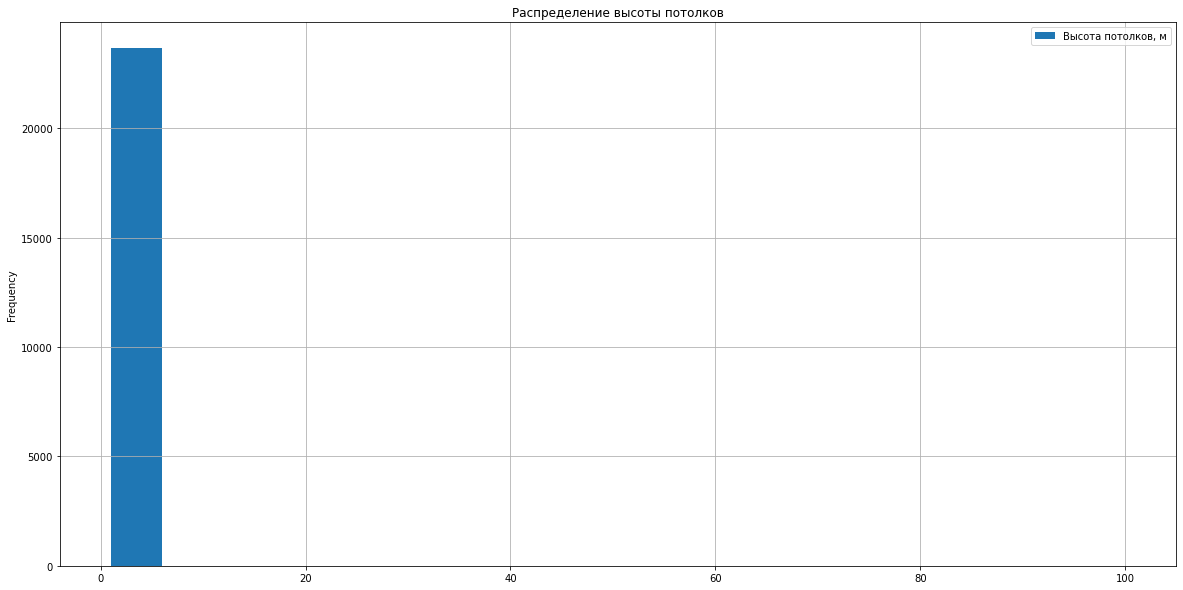

In [192]:
#Построим гистограмму без ограничений

data_new.plot(
    kind='hist',
    y='ceiling_height',
    figsize=[20,10],
    bins=20,
    linewidth=5,
    alpha=1,
    label='Высота потолков, м',
    grid=True,
    legend=True,
    title='Распределение высоты потолков'
)

<AxesSubplot:title={'center':'Распределение высоты потолков'}, ylabel='Frequency'>

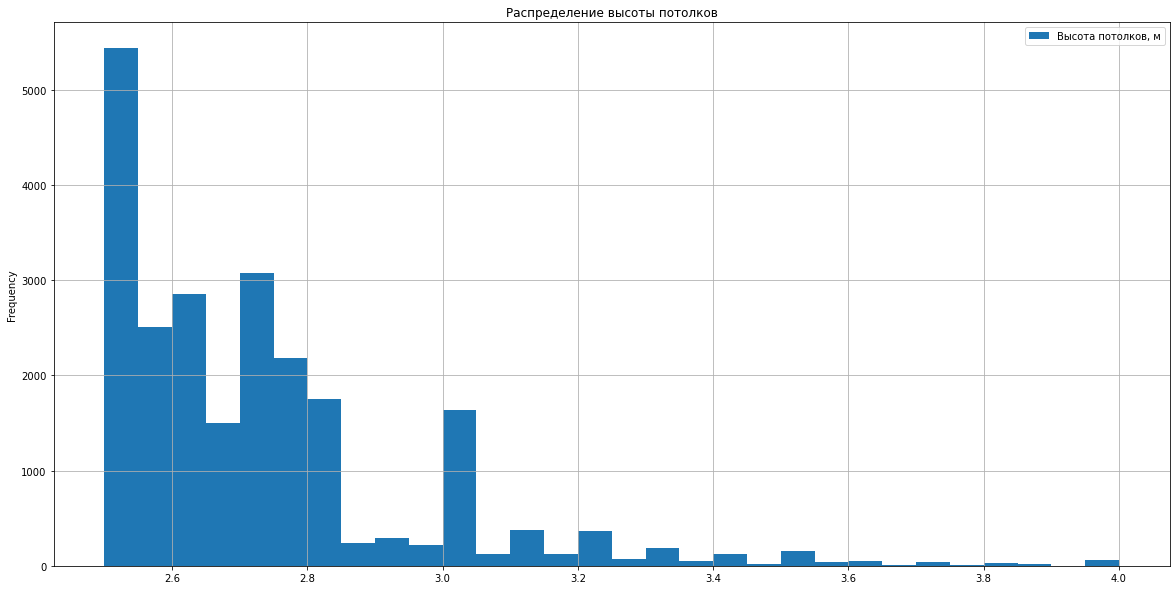

In [193]:
#Выброс в 100м потолки не позволяет изучить распределения, ограничимся стандартными значениями (от 2.5 до 4м)

data_new.plot(
    kind='hist',
    y='ceiling_height',
    figsize=[20,10],
    bins=30,
    range=(2.5,4),
    linewidth=5,
    alpha=1,
    label='Высота потолков, м',
    grid=True,
    legend=True,
    title='Распределение высоты потолков'
)

In [194]:
data_new['ceiling_height'].value_counts()

2.500    4931
2.700    2695
2.600    2604
2.550    1914
2.750    1761
         ... 
5.200       1
3.435       1
5.000       1
3.840       1
3.590       1
Name: ceiling_height, Length: 278, dtype: int64

**Выводы**

Основная масса приходится на минимально допустимую высоту потолка (2.5), однако средняя и медиана в районе 2.6-2.7. В разделе  2.1.2 мы уже определили, что нижняя граница в 2.5 метра отсекает 0.31% выборки, а верхняя в размере 4м 0.32%. Используем эти знания в разделе 4.3

### Изучение времени продажи квартир

In [195]:
data_new['days_exposition'].describe().apply(lambda x: format(x, '.0f'))

count    20518
mean       181
std        220
min          1
25%         45
50%         95
75%        232
max       1580
Name: days_exposition, dtype: object

Максимальное время продажи = 1580 дней или почти 5 лет, минимальное 1 день.

При этом, хотелось бы сделать пару комментариев в пользу того, почему данное иследование по сроку продажи квартир, оценивани, быстрых продаж или долгих и прочее, связанное со сроком - нерелевантно.

1. Ключевое допущение по данному столбцу, что срок экспозиции объявления = сроку продажи квартиры. При этом не берутся в расчет факторы, что человек может быть передумал о продаже (например кейсы о продажи до 7 дней, с учетом того, что решение банка по ипотеке принимается в еще более длинные сроки, вплоть до 20 дней, а все это время объявление будет висеть), так и факторы того, что объявление может сниматься по другим причинам (например продали квартиру через другие каналы сбыта, однако там срок экспозиции был другим).
2. Разговор о долгой или быстрой продаже сводится к тому, что объявление с ценой на объект ниже рыночной, очевидно уйдет быстрее, чем объект с высокой ценой. Однако, ключевое для любого продавца это выгодно для себя продать объект недвижимости, а не сбагрить его побыстрее.

Поэтому дальнейший анализ будет лишь в статистической плоскости, однако, иметь под собой слабую логическую базу, с учетом различных понятий, кто и сколько дней считает быстрой продажей, а сколько медленной. 

<AxesSubplot:title={'center':'Распределение времени продаж квартир'}, ylabel='Frequency'>

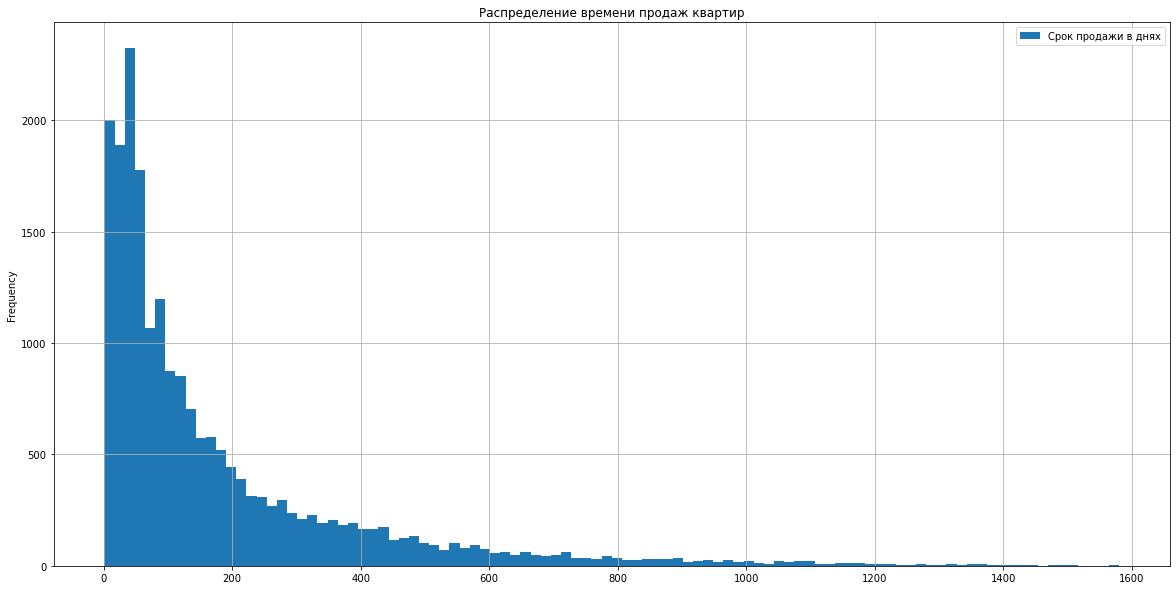

In [196]:
#Взглянем на распределение значений в общем виде

data_new.plot(
    kind='hist',
    y='days_exposition',
    figsize=[20,10],
    bins=100,
    linewidth=5,
    alpha=1,
    label='Срок продажи в днях',
    grid=True,
    legend=True,
    title='Распределение времени продаж квартир'
)

<AxesSubplot:title={'center':'Распределение времени продаж квартир'}, ylabel='Frequency'>

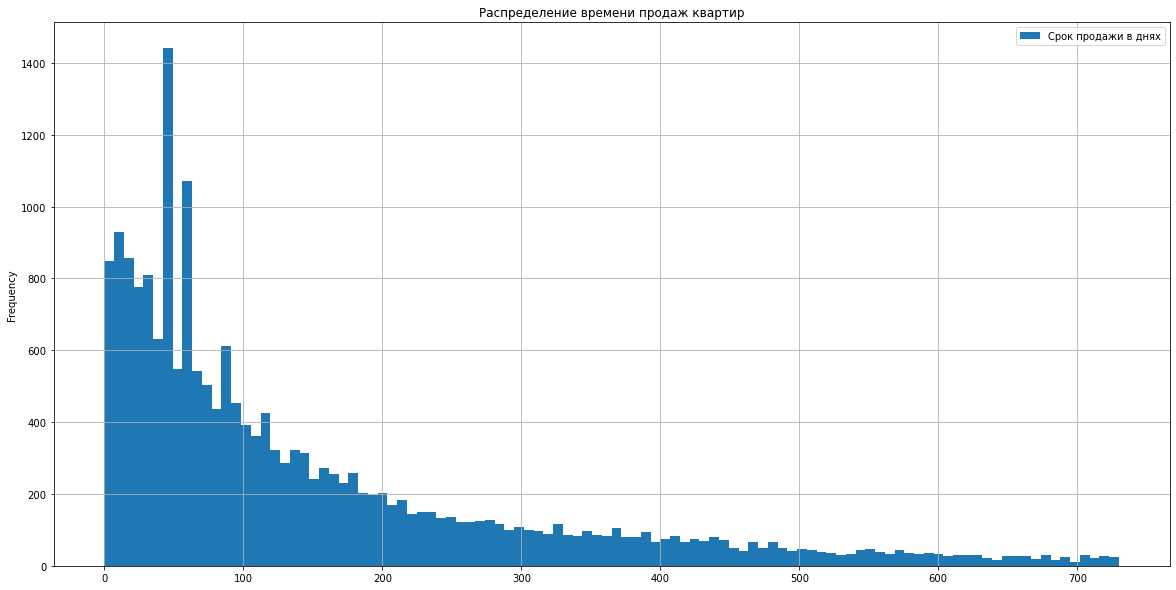

In [197]:
#Отсечем длинный хвост для более детального рассмотрения основных данных, 
#установим верхнюю границу на уровне 2х лет (730 дней)
#количество корзин установим в размере 104 шт (анализ с шагом в неделю)

data_new.plot(
    kind='hist',
    y='days_exposition',
    figsize=[20,10],
    range=(0,730),
    bins=104,
    linewidth=5,
    alpha=1,
    label='Срок продажи в днях',
    grid=True,
    legend=True,
    title='Распределение времени продаж квартир'
)

<AxesSubplot:title={'center':'Распределение времени продаж квартир'}, ylabel='Frequency'>

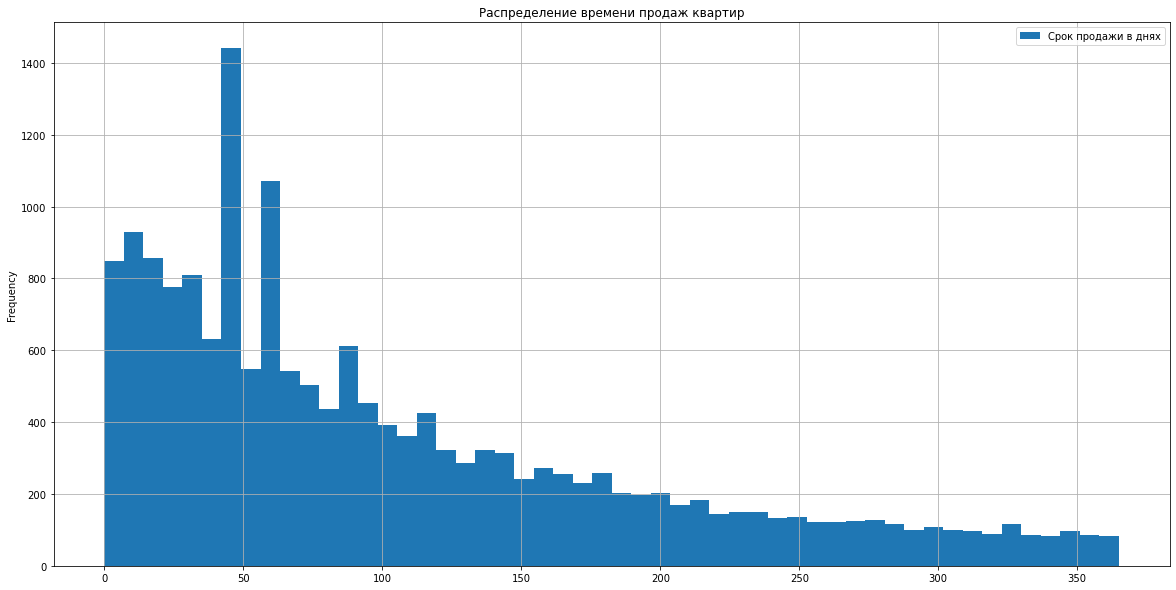

In [198]:
#Еще крупнее

data_new.plot(
    kind='hist',
    y='days_exposition',
    figsize=[20,10],
    range=(0,365),
    bins=52,
    linewidth=5,
    alpha=1,
    label='Срок продажи в днях',
    grid=True,
    legend=True,
    title='Распределение времени продаж квартир'
)

In [199]:
data_len = data_new['days_exposition'].count()

print('{:.2%}'.format(len(data.query('days_exposition > 1460')) / data_len))
print('{:.2%}'.format(len(data.query('days_exposition > 1095')) / data_len))
print('{:.2%}'.format(len(data.query('days_exposition > 910')) / data_len))
print('{:.2%}'.format(len(data.query('days_exposition > 730')) / data_len))
print('{:.2%}'.format(len(data.query('days_exposition > 365')) / data_len))

0.05%
0.81%
1.93%
3.66%
14.92%


In [200]:
print('{:.2%}'.format(len(data.query('days_exposition < 270')) / data_len))
print('{:.2%}'.format(len(data.query('days_exposition < 180')) / data_len))
print('{:.2%}'.format(len(data.query('days_exposition < 90')) / data_len))
print('{:.2%}'.format(len(data.query('days_exposition < 30')) / data_len))
print('{:.2%}'.format(len(data.query('days_exposition < 14')) / data_len))
print('{:.2%}'.format(len(data.query('days_exposition < 7')) / data_len))

78.41%
68.31%
47.41%
17.20%
7.93%
2.99%


In [201]:
#Соберем цикл, который выведет данные для построения графика продаж 
#в доле от всей выборки по дням после выставления объявления

days = []
perc = []

day = 1

for i in range(1580):
    perc.append('{:.2f}'.format(len(data.query('days_exposition < @day')) / data_len))
    days.append(day)
    day += 1

In [202]:
#Соберем этот датасет

days_plot = pd.DataFrame({'perc' : perc, 'days' : days})
days_plot

,perc,days
0,0.00,1
1,0.00,2
2,0.00,3
3,0.01,4
4,0.02,5
...,...,...
1575,1.00,1576
1576,1.00,1577
1577,1.00,1578
1578,1.00,1579


In [203]:
days_plot['perc'] = pd.to_numeric(days_plot['perc'])
days_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   perc    1580 non-null   float64
 1   days    1580 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 24.8 KB


<AxesSubplot:xlabel='days'>

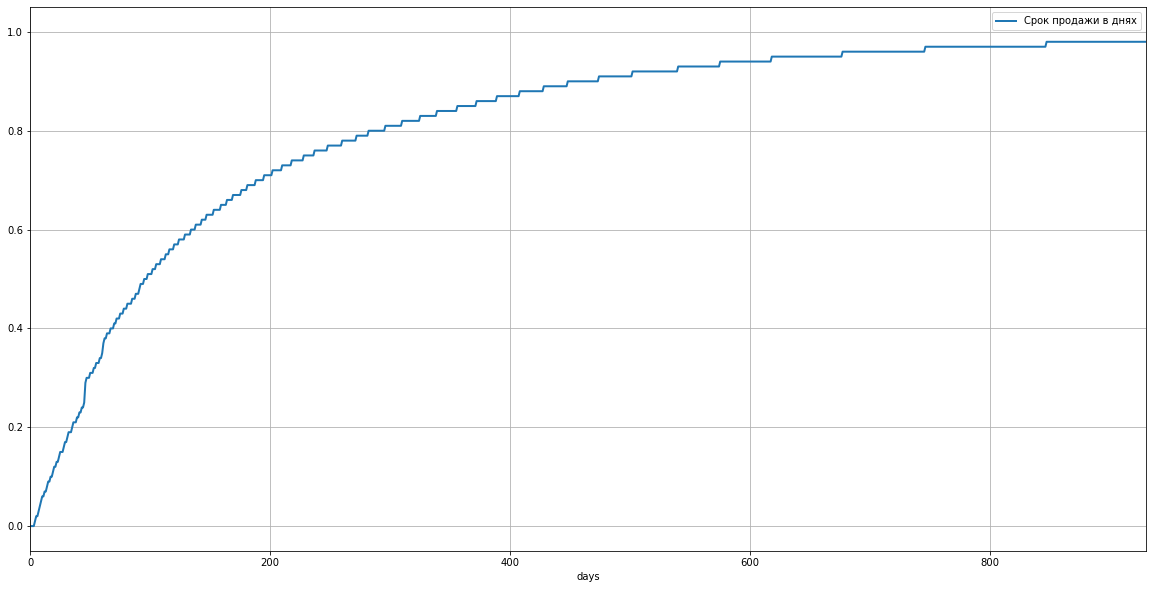

In [204]:
#Сделаем график и ограничим экстримальные значения (более 2.5 лет)

days_plot.plot(
    kind='line',
    x='days',
    y='perc',
    figsize=[20,10],
    xlim=(0,930),
    linewidth=2,
    alpha=1,
    label='Срок продажи в днях',
    grid=True,
    legend=True,
)

**Общий вывод**

Медленные продажи:

В среднем, можно считать продажу дольше 2-3 лет как редкое явление (менее 4% от выборки).
При этом продажа дольше 1 года и менее 2 лет это 11% от выборки, то есть в зависимости от рыночности предложения квартира может продавать достаточно долгое время. 

Быстрые продажи:
В течении недели закрывается 3% объявлений, однако валидировать эти данные на предмет просто закрытия не по причине продажи, а по причине отказа продавца от продажи (передумал), невозможно.
В целом, продажу в течении первой недели можно считать большой удачей.

Общая масса квартир продается в срок до 232 дней (75 перцентиль). При этом продавцу более вероятно следует ожидать продажу в первую половину этой выборки из-за резкого роста графика продаж в пределах 0-200 дней и дальнейшее сглаживание.

### Чистка выбросов

#### Площадь

In [205]:
data_new['total_area'].describe().apply(lambda x: format(x, '.2f'))

count    23699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: object

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

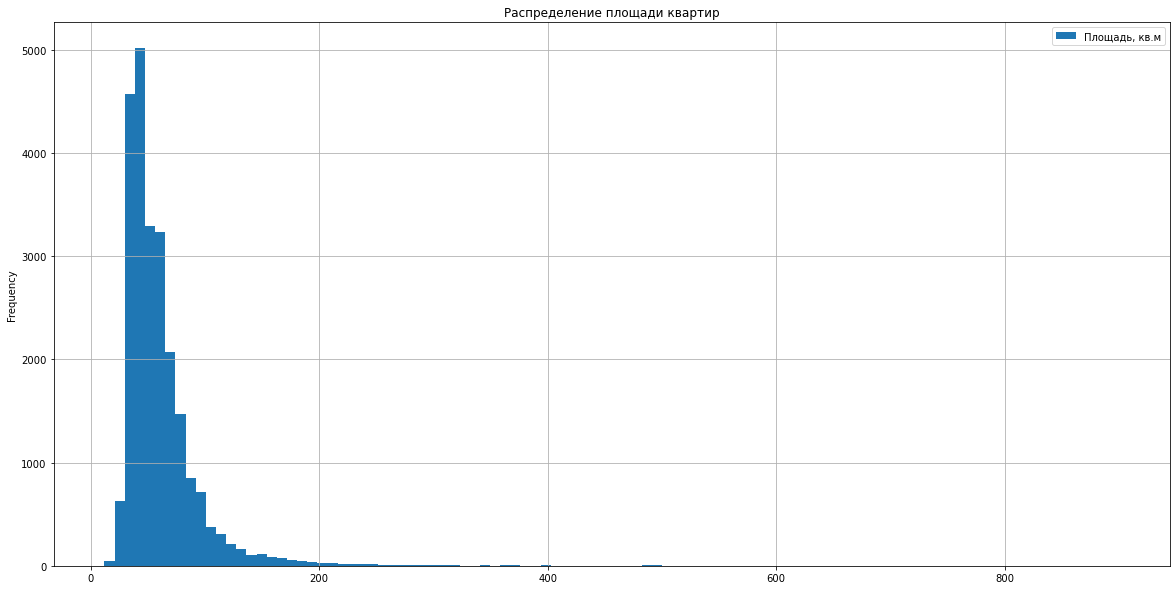

In [206]:
#Взглянем еще раз на гистограмму без ограничений

data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=100,
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
)

В большинстве своем реалистичность данных не подвергается сомнению (как было сказано в 1 разделе, существуют квартиры на рынке и больше метражом и меньше, представленных крайних значений в датасете), однако для сглаживания средней предлагается урезать верхнюю границу.

Взглянем на частоту верхней границы:

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

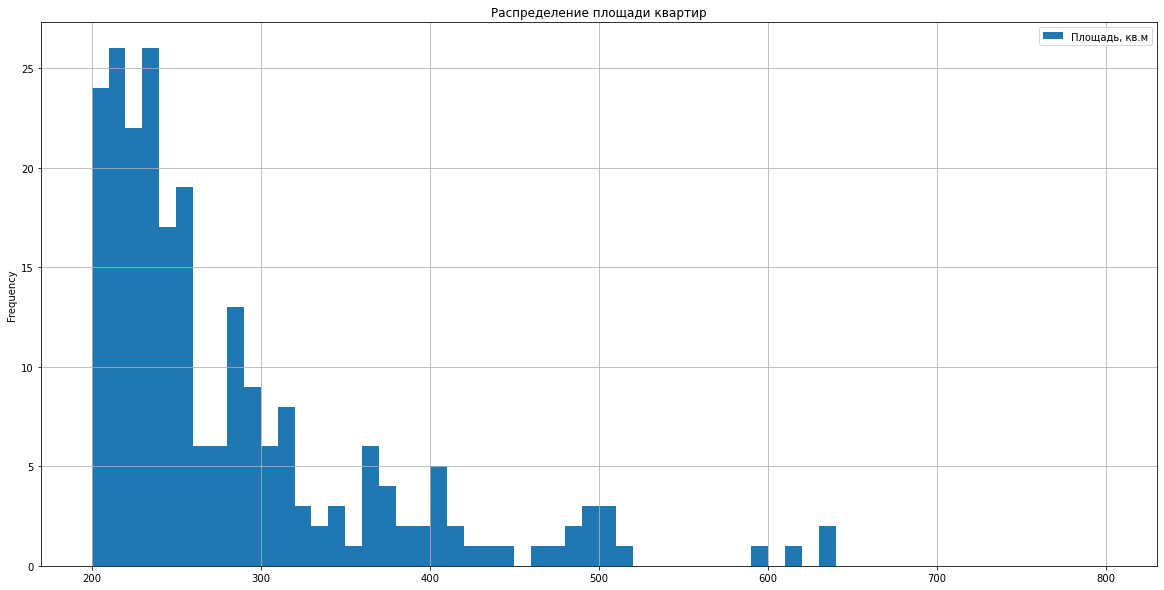

In [207]:
data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=60,
    range=(200,800),
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
)

Квартиры свыше 400 м представлены в единичных экземплярах (не более 3шт) в каждом бакете с шагом 10 кв метров,
рост количества продаж начинается от 250кв м

In [208]:
print('{:.2%}'.format(len(data_new.query('total_area > 300')) / data_len))
print('{:.2%}'.format(len(data_new.query('total_area > 250')) / data_len))
print('{:.2%}'.format(len(data_new.query('total_area > 200')) / data_len))

0.30%
0.55%
1.11%


Однако, если взглянуть на долю выборки, то свыше 200 м представлено менее 1% квартир.

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

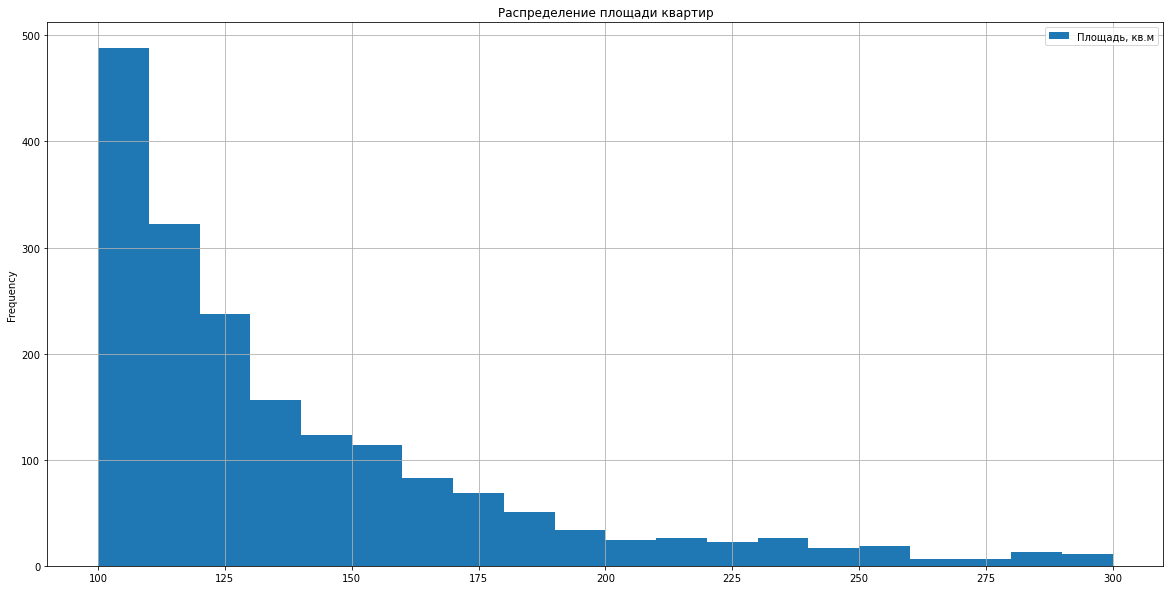

In [209]:
data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=20,
    range=(100,300),
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
)

Свыше 200 квартир на шаг 10кв м приходится от значения 125-130

In [210]:
print('{:.2%}'.format(len(data_new.query('total_area > 180')) / data_len))
print('{:.2%}'.format(len(data_new.query('total_area > 170')) / data_len))
print('{:.2%}'.format(len(data_new.query('total_area > 150')) / data_len))
print('{:.2%}'.format(len(data_new.query('total_area > 130')) / data_len))
print('{:.0f}'.format(len(data_new.query('total_area > 180'))))

1.51%
1.80%
2.75%
4.09%
310


Как границу можно установить 

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

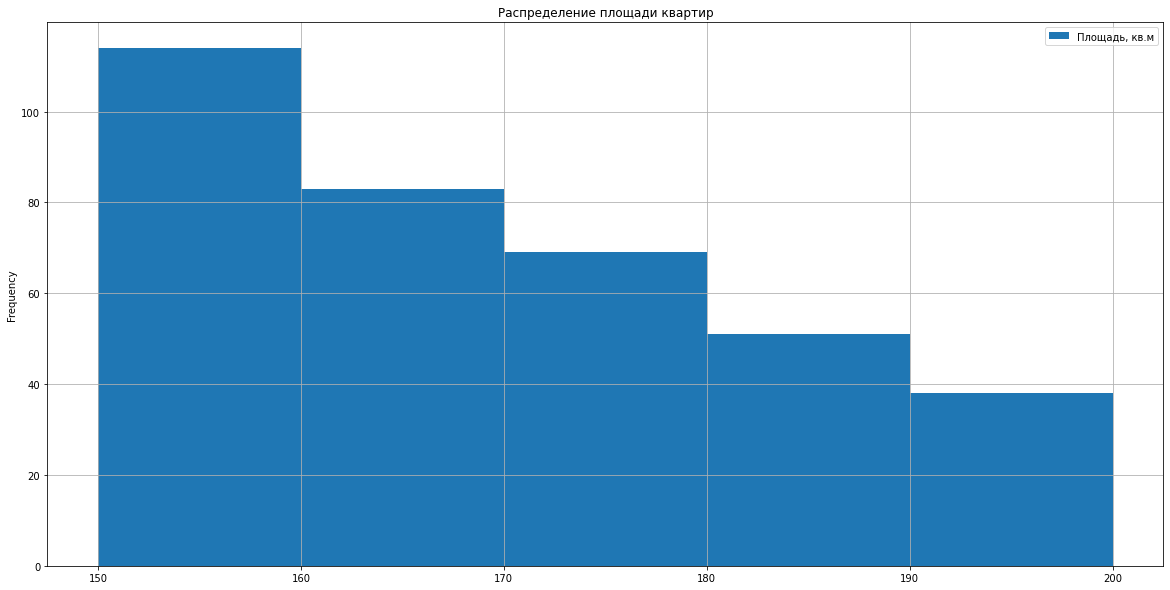

In [211]:
data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=5,
    range=(150,200),
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
)

Границей отсечения можно установить 180 метров(дальше идет уже менее 50 продаж на шаг 10кв м). Доля квартир свыше 180 метров составляет 1,31%, количество = 310 квартир

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

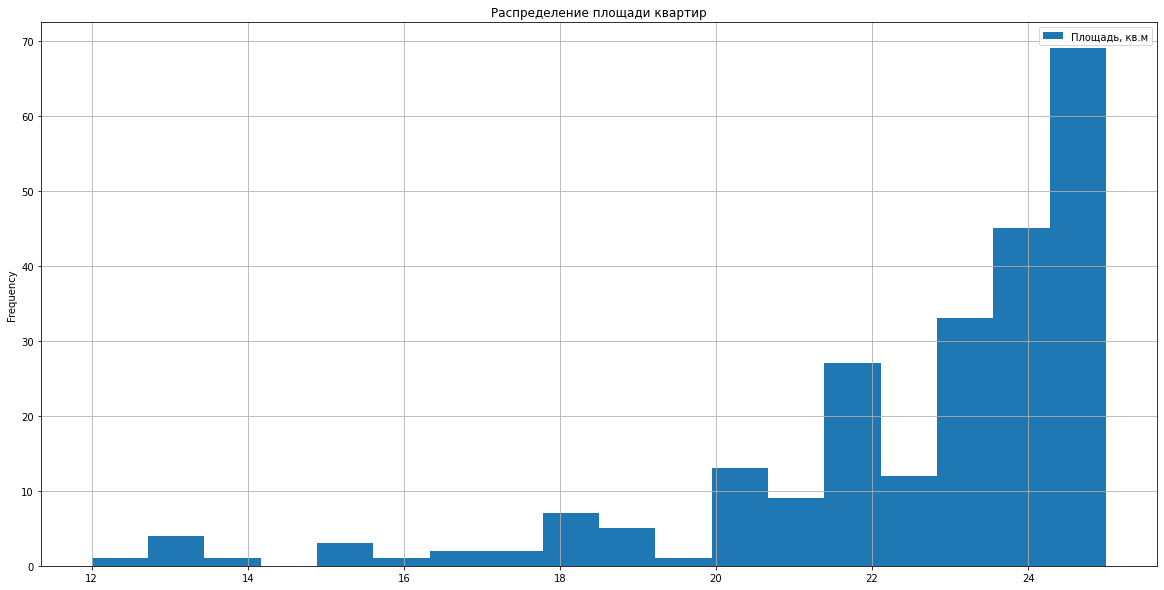

In [212]:
#Теперь взглянем на нижнюю границу

data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=18,
    range=(12,25),
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
)

In [213]:
print('{:.2%}'.format(len(data_new.query('total_area < 25')) / data_len))
print('{:.2%}'.format(len(data_new.query('total_area < 24')) / data_len))
print('{:.0f}'.format(len(data_new.query('total_area < 25'))))

0.93%
0.64%
190


Если по логике с верхней границей, брать отсечение в 50 квартир (в данном случае с шагом на 1кв м), то все что меньше 25кв м попадает в данную границу.
Стоит отметить, что таких квартир даже меньше, чем элитных в верхнем диапазоне выбросов. 
Доля квартир менее 25 кв м составляет 0.8%, а количество 190 штук. 

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

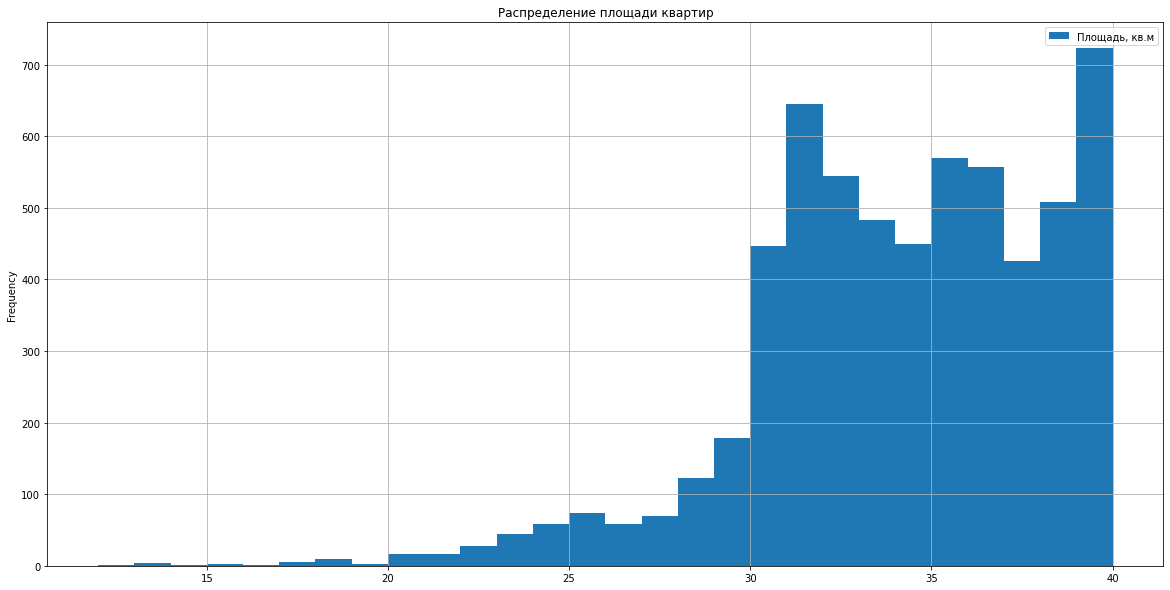

In [214]:
data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=28,
    range=(12,40),
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
)

Однако на данном графике, значительный провал начинается от квартир менее 30кв м

In [215]:
print('{:.2%}'.format(len(data_new.query('total_area < 30')) / data_len))
print('{:.0f}'.format(len(data_new.query('total_area < 30'))))

3.38%
693


<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

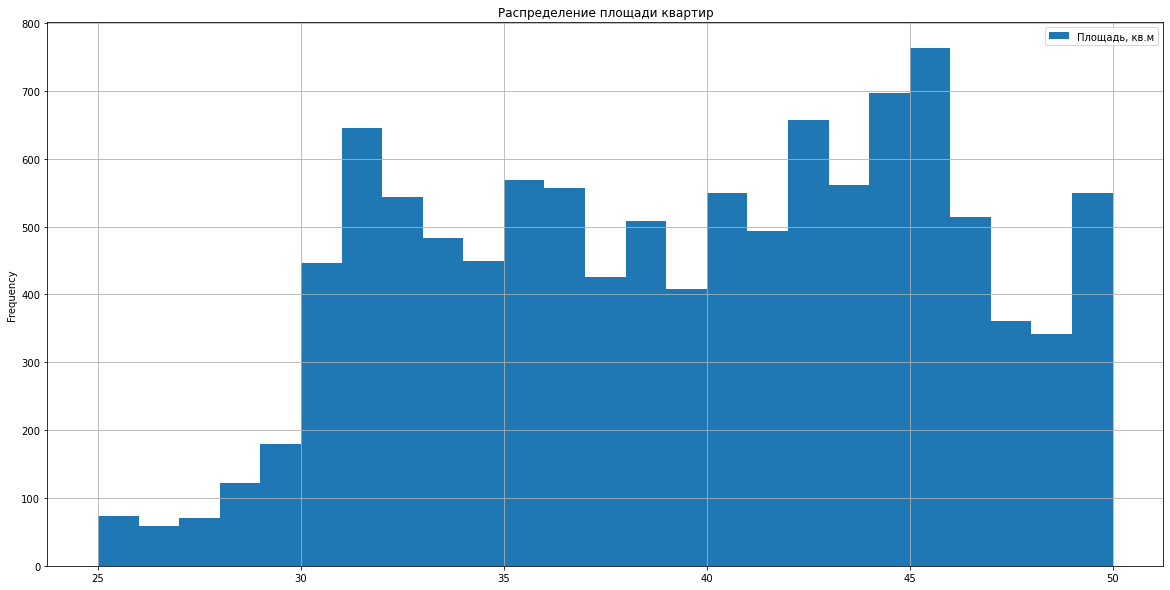

In [216]:
data_new.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=25,
    range=(25,50),
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
)

Важно помнить, что распределение Пуассона начинается с резкого роста в левой части и плавным спадом в правой, что мы и видим на данном графике.
Поэтому за нижнюю границу отсечения предлагается взять менее 25кв м. 

In [217]:
print('{:.2%}'.format(len(data_new.query('(total_area < 25) | (total_area > 180)')) / data_len))
print('{:.0f}'.format(len(data_new.query('(total_area < 25) | (total_area > 180)'))))

2.44%
500


In [218]:
data_new_plot = data_new.query('(total_area >= 25) & (total_area <= 180)')

<AxesSubplot:title={'center':'Распределение площади квартир'}, ylabel='Frequency'>

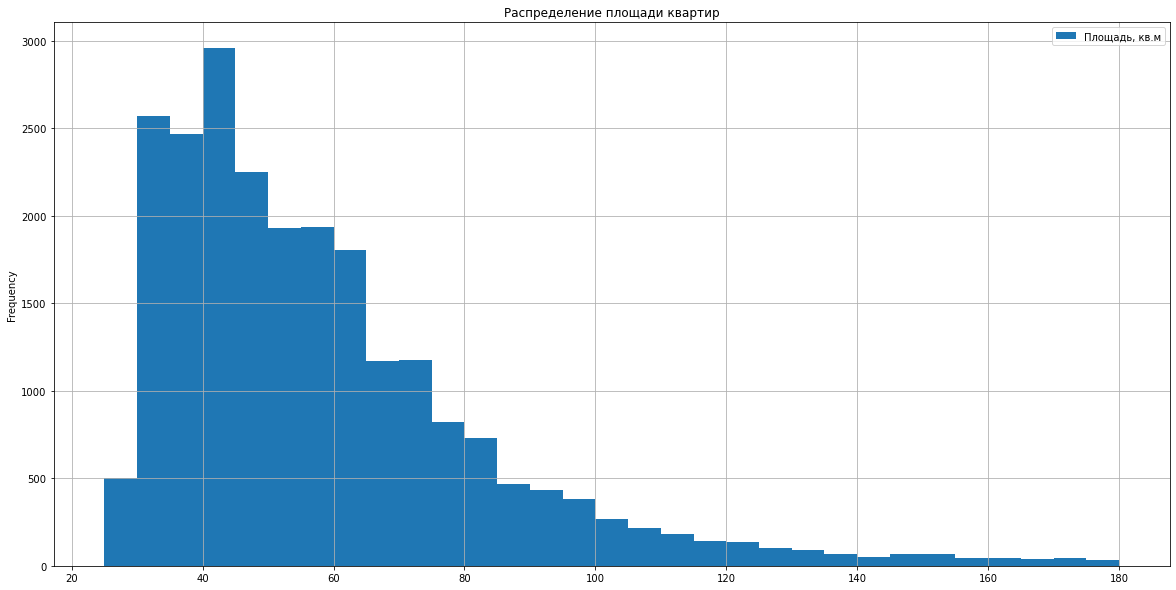

In [219]:
#Гистограмма с шагом 5 метров

data_new_plot.plot(
    kind='hist',
    y='total_area',
    figsize=[20,10],
    bins=31,
    linewidth=5,
    alpha=1,
    label='Площадь, кв.м',
    grid=True,
    legend=True,
    title='Распределение площади квартир'
)

In [220]:
data_new_plot['total_area'].describe().apply(lambda x: format(x, '.2f'))

count    23199.00
mean        58.01
std         25.29
min         25.00
25%         40.00
50%         52.00
75%         68.80
max        180.00
Name: total_area, dtype: object

Минимальная граница = 25 метров,
Максимальная 180

Отсечение 2.11% данных или 500 квартир.

Средняя снизилась до 58кв м, медиана сохранилась на уровне 52 метра.
Возможно, имело бы смысл еще поработать над верхней границей в сторону её снижения для сглаживания средней, однако количество данных в районе 150-180 начинает расти, поэтому их исключение не имеет смысл в исследовательских целях, т.к. таких квартир на рынке представлено достаточное количество. 

#### Цена

In [221]:
data_new['price_th'].describe().apply(lambda x: format(x, '.0f'))

count     23699
mean       6542
std       10887
min          12
25%        3400
50%        4650
75%        6800
max      763000
Name: price_th, dtype: object

<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

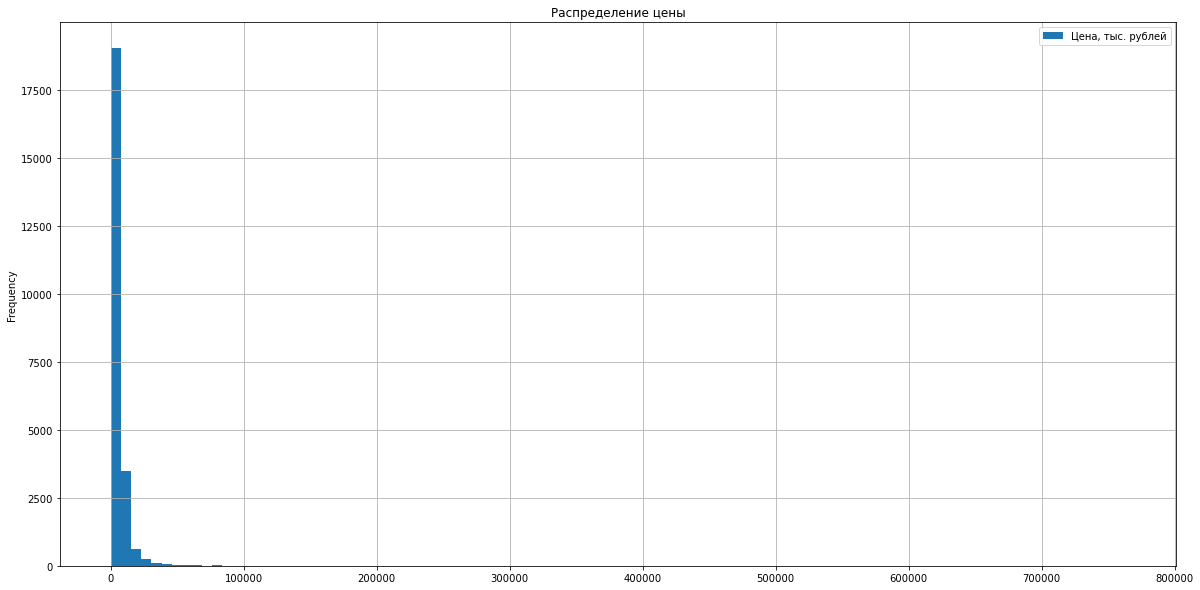

In [222]:
#Взглянем еще раз на гистограмму без ограничений

data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    bins=100,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. рублей',
    grid=True,
    legend=True,
    title='Распределение цены'
)

<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

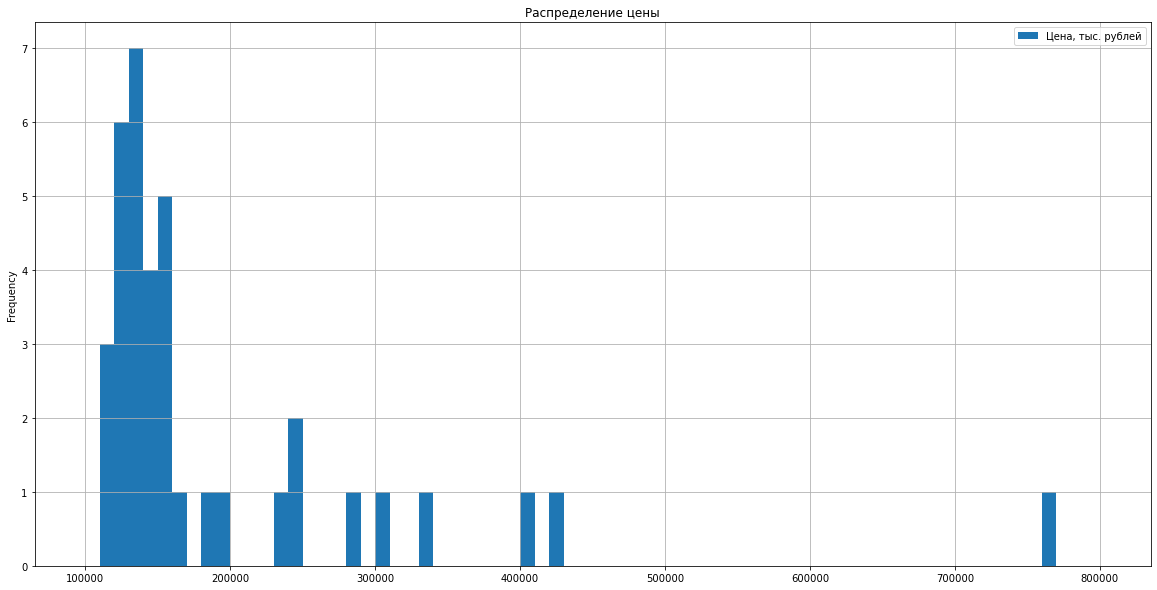

In [223]:
#Свыше 100 млн. сразу отсекаем

data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    range=(100000,800000),
    bins=70,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. рублей',
    grid=True,
    legend=True,
    title='Распределение цены'
)

In [224]:
print('{:.2%}'.format(len(data_new.query('price_th > 100000')) / data_len))
print('{:.0f}'.format(len(data_new.query('price_th > 100000'))))

0.18%
37


<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

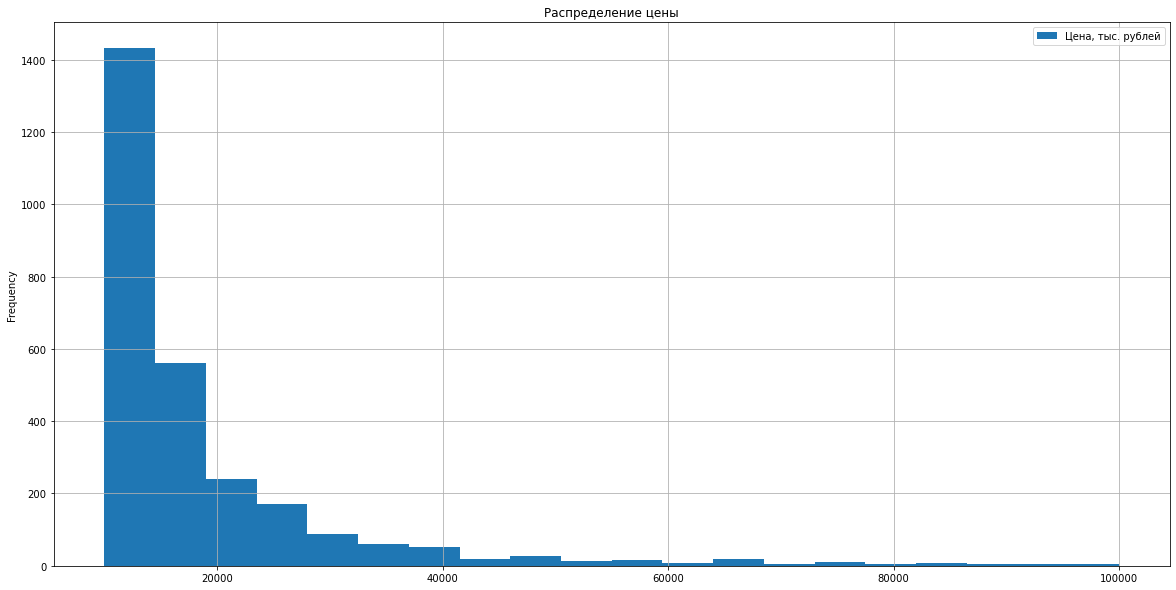

In [225]:
#шаг в 5 млн

data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    range=(10000,100000),
    bins=20,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. рублей',
    grid=True,
    legend=True,
    title='Распределение цены'
)

<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

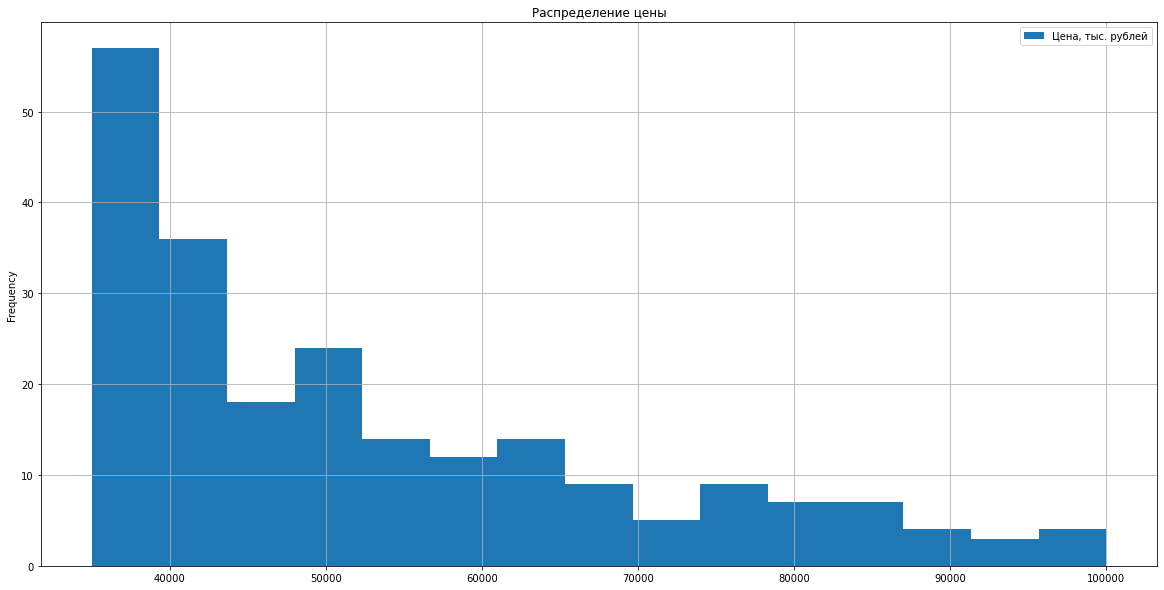

In [226]:
data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    range=(35000,100000),
    bins=15,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. рублей',
    grid=True,
    legend=True,
    title='Распределение цены'
)

In [227]:
print('{:.2%}'.format(len(data_new.query('price_th > 35000')) / data_len))
print('{:.0f}'.format(len(data_new.query('price_th > 35000'))))

1.20%
247


Кажется, что логичной верхней границей отсечения будет 35 млн. рублей
Проверим на гистограмме ниже с шагом уже по 1 млн рублей

<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

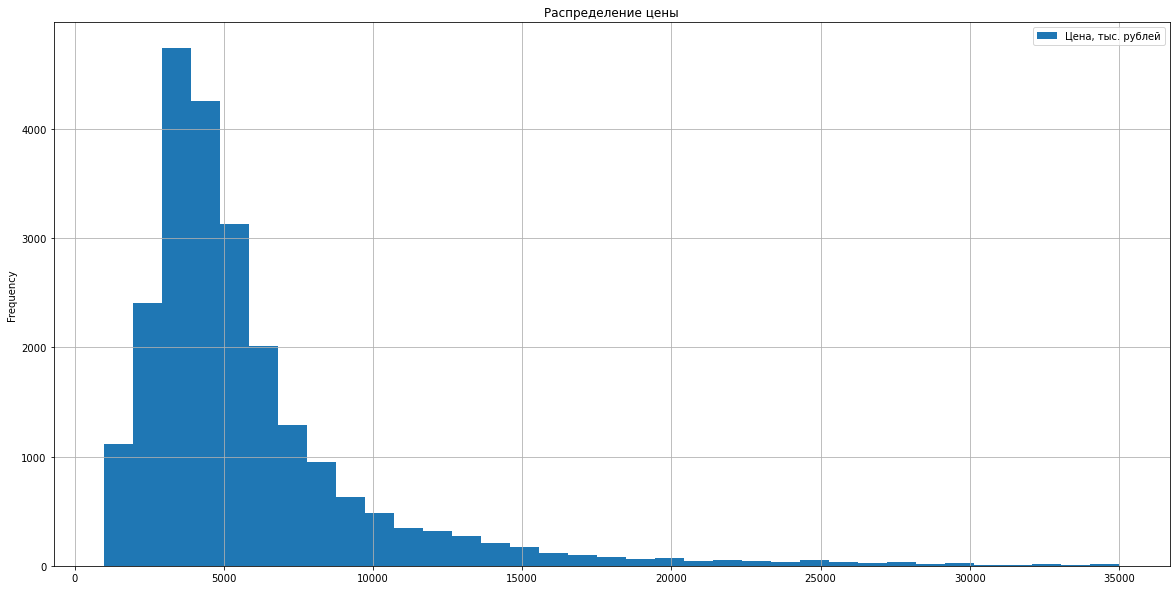

In [228]:
data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    range=(1000,35000),
    bins=35,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. рублей',
    grid=True,
    legend=True,
    title='Распределение цены'
)

По графику видно, что можно еще "отсечь" хвост в районе 30 млн.

In [229]:
print('{:.2%}'.format(len(data_new.query('price_th > 30000')) / data_len))
print('{:.0f}'.format(len(data_new.query('price_th > 30000'))))

1.54%
316


<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

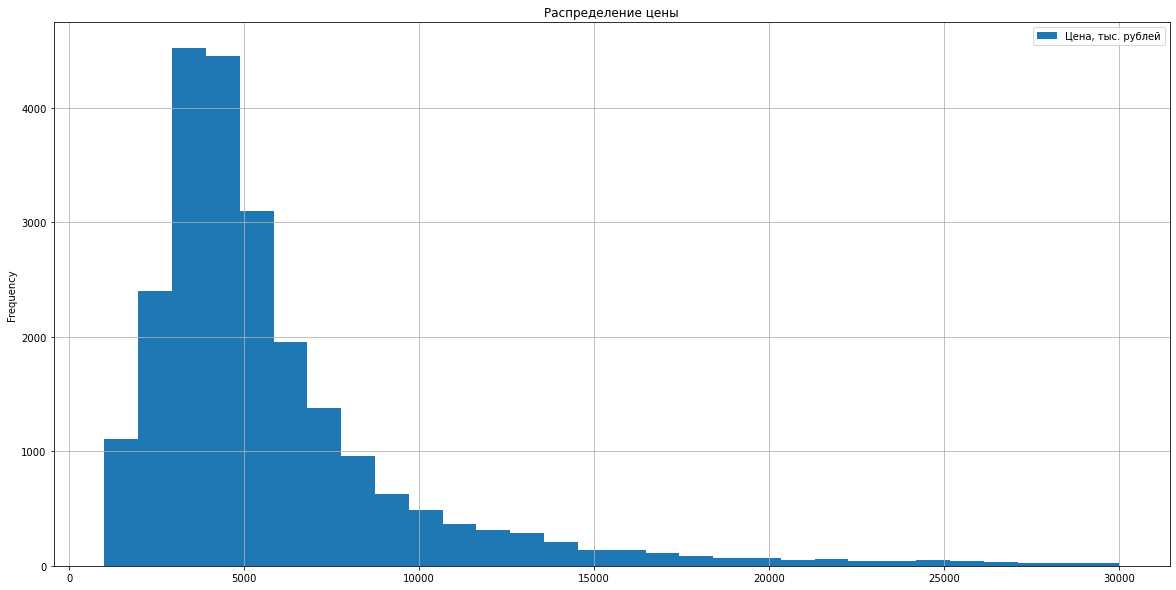

In [230]:
data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    range=(1000,30000),
    bins=30,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. рублей',
    grid=True,
    legend=True,
    title='Распределение цены'
)

<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

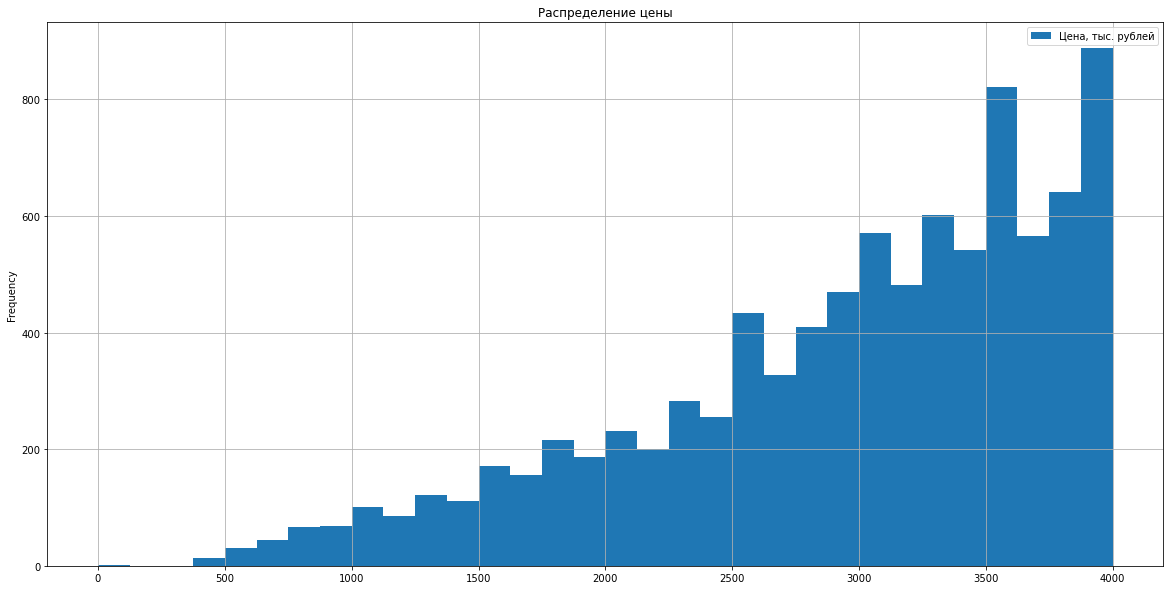

In [231]:
#теперь к нижней границе, шаг в 250 тыс

data_new.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    range=(0,4000),
    bins=32,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. рублей',
    grid=True,
    legend=True,
    title='Распределение цены'
)

In [232]:
print('{:.2%}'.format(len(data_new.query('price_th < 1000')) / data_len))
print('{:.2%}'.format(len(data_new.query('price_th < 1250')) / data_len))
print('{:.2%}'.format(len(data_new.query('price_th < 1500')) / data_len))
print('{:.2%}'.format(len(data_new.query('price_th < 2000')) / data_len))

print('{:.0f}'.format(len(data_new.query('price_th < 1000'))))

1.10%
2.01%
3.15%
6.70%
225


<AxesSubplot:title={'center':'Распределение цены'}, ylabel='Frequency'>

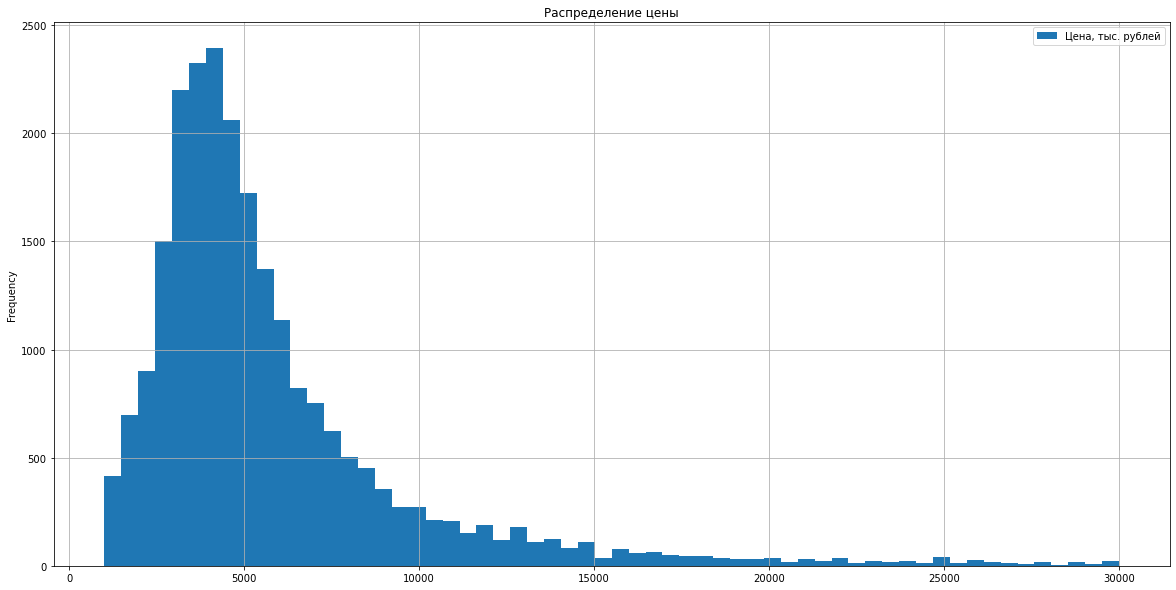

In [233]:
#Финальный график с границами 1млн - 30 млн, с шагом 500 тыс.
data_new_plot = data_new.query('(price_th >= 1000) & (price_th <= 30000)')


data_new_plot.plot(
    kind='hist',
    y='price_th',
    figsize=[20,10],
    bins=60,
    linewidth=5,
    alpha=1,
    label='Цена, тыс. рублей',
    grid=True,
    legend=True,
    title='Распределение цены'
)

In [234]:
print('{:.2%}'.format(len(data_new.query('(price_th < 1000) | (price_th > 30000)')) / data_len))
print('{:.0f}'.format(len(data_new.query('(price_th < 1000) | (price_th > 30000)'))))

2.64%
541


In [235]:
data_new_plot['price_th'].describe().apply(lambda x: format(x, '.0f'))

count    23158
mean      5791
std       4031
min       1000
25%       3450
50%       4600
75%       6699
max      30000
Name: price_th, dtype: object

Минимальная граница = 1 млн. рублей,
Максимальная = 30 млн. рублей

Отсечение 2.28% данных или 541 квартир.

Средняя снизилась до 5,8 млн. рублей, медиана сохранилась на уровне 4,6 млн. рублей.

#### Число комнат

In [236]:
data_new['rooms'].describe().apply(lambda x: format(x, '.2f'))

count    23699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: object

In [237]:
data_new['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

<AxesSubplot:title={'center':'Распределение комнат'}, ylabel='Frequency'>

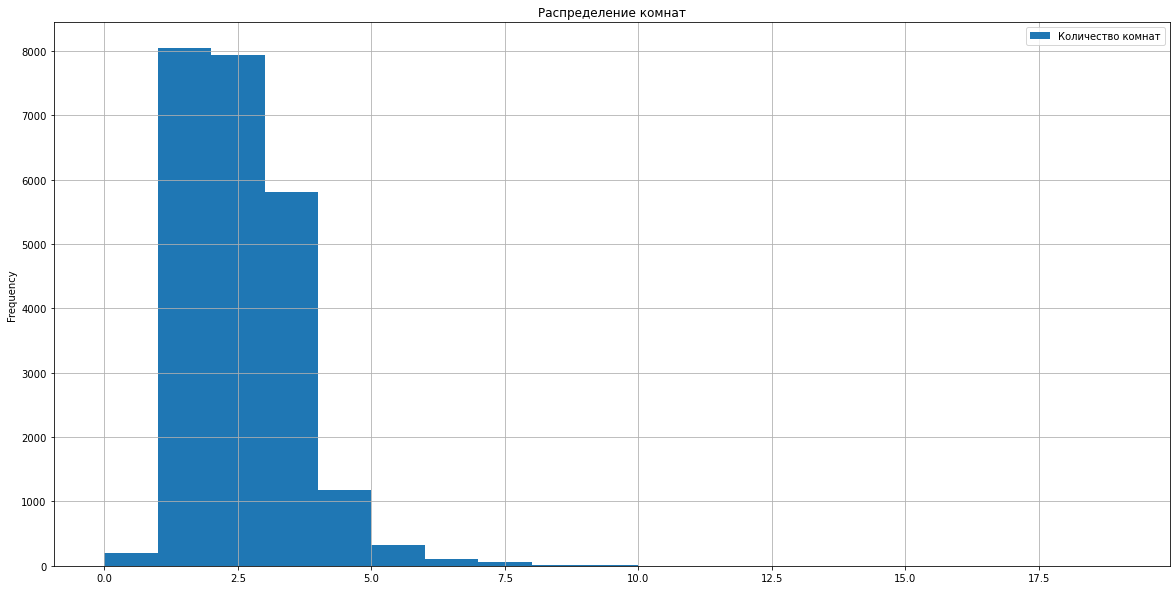

In [238]:
data_new.plot(
    kind='hist',
    y='rooms',
    figsize=[20,10],
    bins=19,
    linewidth=5,
    alpha=1,
    label='Количество комнат',
    grid=True,
    legend=True,
    title='Распределение комнат'
)

In [239]:
print('{:.2%}'.format(len(data_new.query('rooms > 6')) / data_len))
print('{:.2%}'.format(len(data_new.query('rooms > 5')) / data_len))
print('{:.2%}'.format(len(data_new.query('rooms > 4')) / data_len))
print()
print('{:.0f}'.format(len(data_new.query('rooms > 5'))))
print('{:.0f}'.format(len(data_new.query('rooms > 4'))))

0.44%
0.95%
2.54%

195
521


Очевидными выбросами являются 0 комнат (ошибочное значение из-за человеческого фактора или технической ошибки при заведении данных), по верхней границе не так очевидно. 

Если обратиться к статистике, комнаты 5 и более встречаются в 2,2% случаев, 6 и более в 0,82%
Если обратиться к крупнейшим сайтам по поиску недвижимости, то у Авито имеется фильтр 5 и более комнат, у Циан 6 и более, у Яндекс-недвижимость 4 и более. 

Построим гистограмму для обоих случаев.

<AxesSubplot:ylabel='Frequency'>

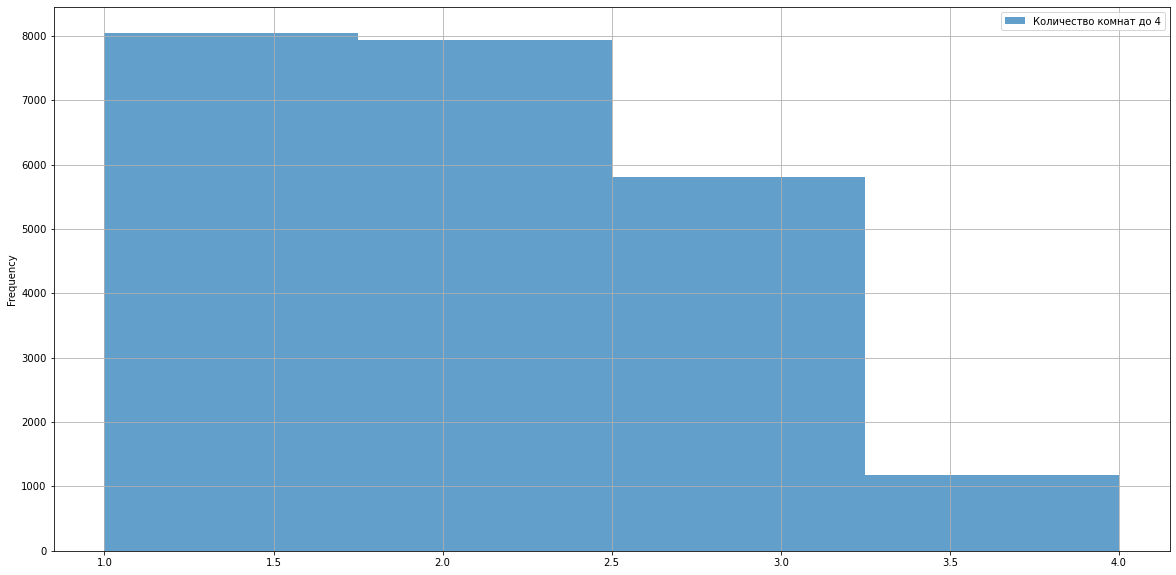

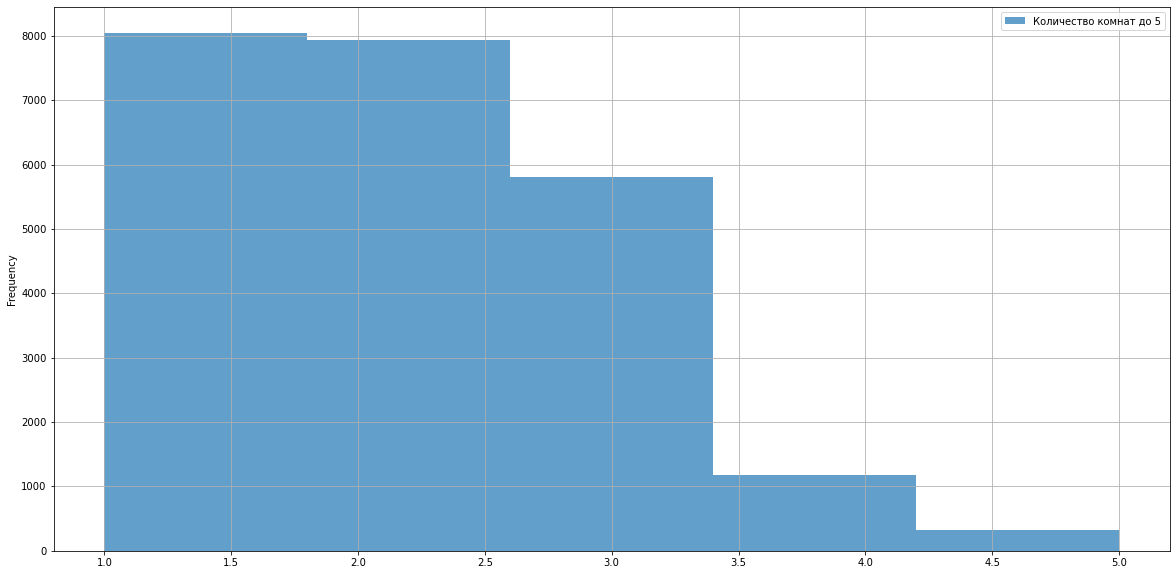

In [240]:
data_new.plot(
    kind='hist',
    y='rooms',
    figsize=[20,10],
    bins=4,
    range=(1,4),
    linewidth=5,
    alpha=0.7,
    label='Количество комнат до 4',
    grid=True,
    legend=True,
)

data_new.plot(
    kind='hist',
    y='rooms',
    figsize=[20,10],
    bins=5,
    range=(1,5),
    linewidth=5,
    alpha=0.7,
    label='Количество комнат до 5',
    grid=True,
    legend=True,
)

С учетом опыта различных сайтов по продаже квартир, а также плавности снижения гистограммы распределения, считаю возможным сделать отсечение на 5 комнатах.

In [241]:
print('{:.2%}'.format(len(data_new.query('(rooms < 1) | (rooms > 5)')) / data_len))
print('{:.0f}'.format(len(data_new.query('(rooms < 1) | (rooms > 5)'))))

1.91%
392


In [242]:
data.query('rooms < 1').count().head(1)

total_images    197
dtype: int64

In [243]:
data.query('studio == True').count().head(1)

total_images    149
dtype: int64

Квартир с 0 комнат 197 штук, студий 149, проверим, является ли 0 комнат законномерностью (то есть все 149 входят в 197, то есть 0 комнат это скорее всего студия).

In [244]:
data.query('(rooms < 1) & (studio == True)').count().head(1)

total_images    138
dtype: int64

Минимальные и максимальные значения определены, средняя и медиана различаются на 5 сотых. Основная масса квартир это 1-2 комнатные.

#### Высота потолков

In [245]:
data_new['ceiling_height'].describe().apply(lambda x: format(x, '.2f'))

count    23699.00
mean         2.74
std          0.99
min          1.00
25%          2.55
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: object

<AxesSubplot:ylabel='Frequency'>

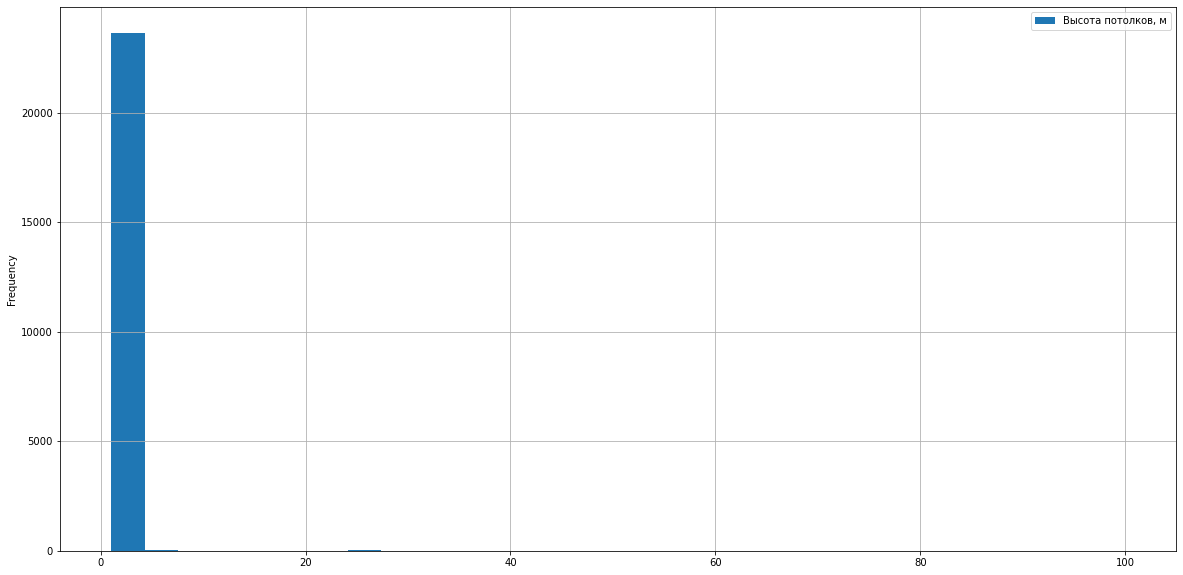

In [246]:
data_new.plot(
    kind='hist',
    y='ceiling_height',
    figsize=[20,10],
    bins=30,
    linewidth=5,
    alpha=1,
    label='Высота потолков, м',
    grid=True,
    legend=True,
)

<AxesSubplot:ylabel='Frequency'>

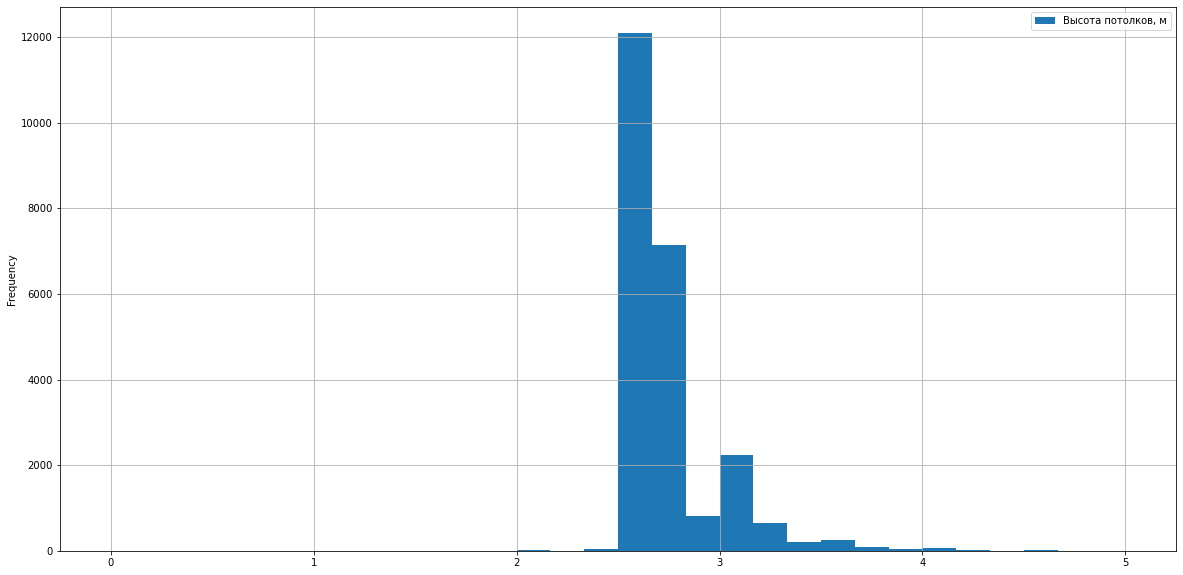

In [247]:
#Ограничим нереалистичные (или уникальные) выбросы свыше 5 метров.

data_new.plot(
    kind='hist',
    y='ceiling_height',
    figsize=[20,10],
    bins=30,
    range=(0,5),
    linewidth=5,
    alpha=1,
    label='Высота потолков, м',
    grid=True,
    legend=True,
)

Как уже ранее говорилось, нижняя граница должна быть ограничена 2.5 метрами, что обусловлено минимальной высотой в жилом помещение согласно ГОСТу.
При этом, расчеты ниже подтверждают, что это верная переходная граница (менее 2.5 метров - выбросы из-за человеческого фактора или технической ошибки, а сама высота 2.5 метров, как минимально допустимая, встречается уже почти у 21% квартир. 

In [248]:
print('{:.2%}'.format(len(data_new.query('ceiling_height < 2.5')) / data_len))
print('{:.2%}'.format(len(data_new.query('ceiling_height < 2.51')) / data_len))

0.36%
24.39%


<AxesSubplot:ylabel='Frequency'>

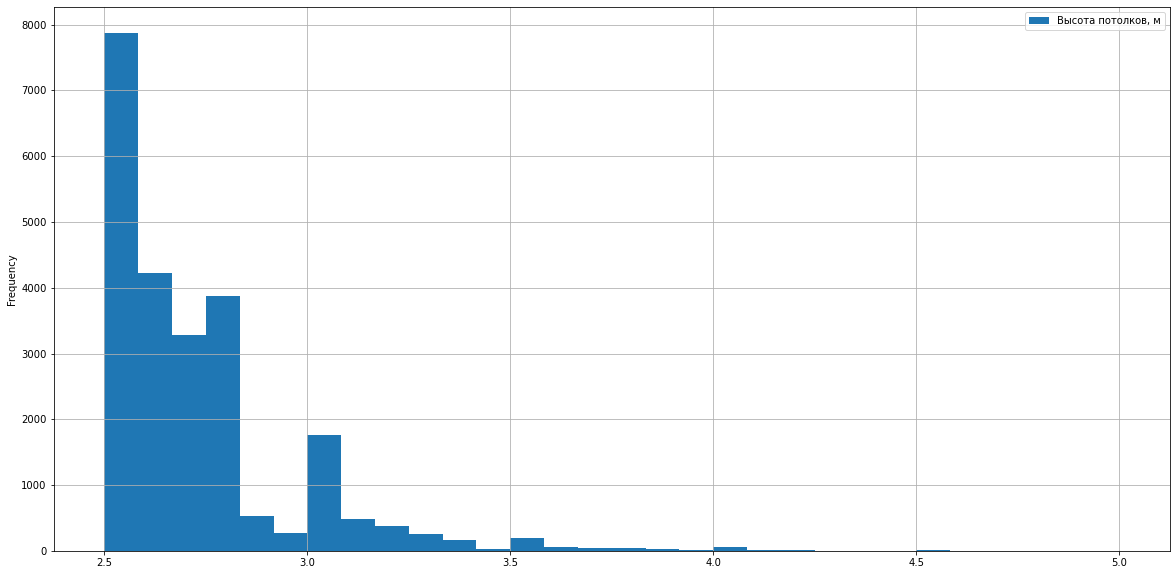

In [249]:
data_new.plot(
    kind='hist',
    y='ceiling_height',
    figsize=[20,10],
    bins=30,
    range=(2.5,5),
    linewidth=5,
    alpha=1,
    label='Высота потолков, м',
    grid=True,
    legend=True,
)

С верхней границей не все так очевидно. Самые высокие "массовые потолки" это сталинки с 3.2-3.6 метров, рассмотрим более детально эти пару верхних метров (гистограмма с шагом 20 см).

9.64%
4.73%
2.54%
1.25%
0.79%


<AxesSubplot:ylabel='Frequency'>

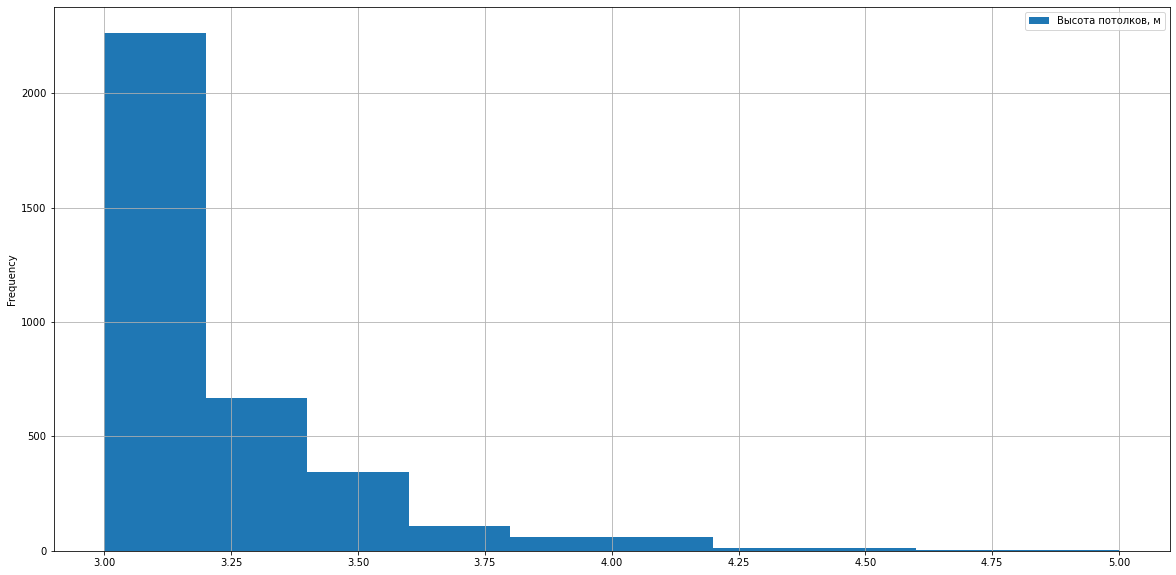

In [250]:
print('{:.2%}'.format(len(data_new.query('ceiling_height > 3')) / data_len))
print('{:.2%}'.format(len(data_new.query('ceiling_height > 3.2')) / data_len))
print('{:.2%}'.format(len(data_new.query('ceiling_height > 3.4')) / data_len))
print('{:.2%}'.format(len(data_new.query('ceiling_height > 3.6')) / data_len))
print('{:.2%}'.format(len(data_new.query('ceiling_height > 3.8')) / data_len))

data_new.plot(
    kind='hist',
    y='ceiling_height',
    figsize=[20,10],
    bins=10,
    range=(3,5),
    linewidth=5,
    alpha=1,
    label='Высота потолков, м',
    grid=True,
    legend=True,
)

Похоже, что теоретическая высота в 3.6 подтверждается и статистикой. Если встретить сталинку с 3.2 не настолько и редко, то выше зверь уже редкий. 
Предлагаю ограничиться 3.6 метрами.

In [251]:
print('{:.2%}'.format(len(data_new.query('(ceiling_height < 2.5) | (ceiling_height > 3.6)')) / data_len))
print('{:.0f}'.format(len(data_new.query('(ceiling_height < 2.5) | (ceiling_height > 3.6)'))))

1.60%
329


In [252]:
data_new_plot = data_new.query('(ceiling_height >= 2.5) & (ceiling_height <= 3.6)')
data_new_plot['ceiling_height'].describe().apply(lambda x: format(x, '.2f'))

count    23370.00
mean         2.70
std          0.21
min          2.50
25%          2.55
50%          2.65
75%          2.79
max          3.60
Name: ceiling_height, dtype: object

<AxesSubplot:ylabel='Frequency'>

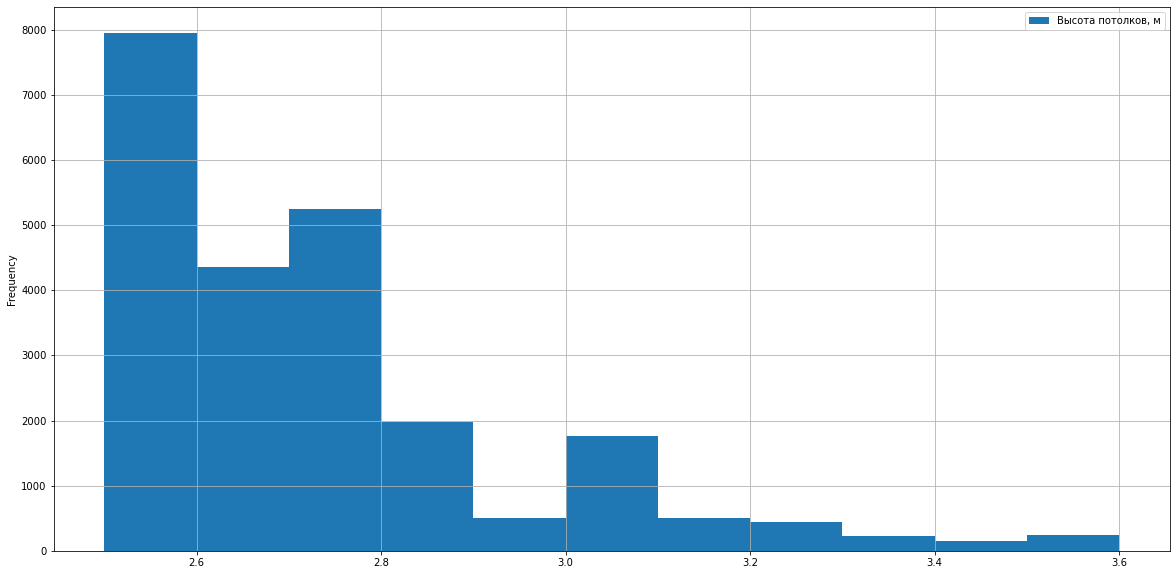

In [253]:
data_new_plot.plot(
    kind='hist',
    y='ceiling_height',
    figsize=[20,10],
    bins=11,
    linewidth=5,
    alpha=1,
    label='Высота потолков, м',
    grid=True,
    legend=True,
)

#### Формируем финальный датасет с учетом ограничений по выбросам

Итак, какие границы у нас вышли по различным показателям (границы включаются в выборку):
- площадь от 25кв.м до 180кв.м;
- цена от 1млн. до 30 млн. рублей;
- число комнат от 0 до 5;
- высота потолков от 2.5м до 3.6м;

Создадим копию data_new, однако с учетом границ, обозначенных выше и сравним, какой объем данных войдет по совокупному фильтру. 

In [254]:
data_new.head(5)

,price_th,price_sq_m,total_area,rooms,ceiling_height,floor_cat,location_cat,locality_name,city_center_km,days_exposition,year,month,weekday
0,13000,120,108.0,3,2.70,другой,Санкт-Петербург,Санкт-Петербург,16.028,NaN,2019,3,3
1,3350,82,40.4,1,2.75,первый,другой,посёлок Шушары,18.603,81.0,2018,12,1
2,5196,92,56.0,2,2.55,другой,Санкт-Петербург,Санкт-Петербург,13.933,558.0,2015,8,3
3,64900,408,159.0,3,3.00,другой,Санкт-Петербург,Санкт-Петербург,6.800,424.0,2015,7,4
4,10000,100,100.0,2,3.03,другой,Санкт-Петербург,Санкт-Петербург,8.098,121.0,2018,6,1


In [255]:
#Задаем все фильтры через оператор И, то есть в финальную выборку попадут только те квартиры,
#которые подходят под все условия

data_cleared = data_new.query('(total_area >= 25) & (total_area <= 180) & \
               (price_th >= 1000) & (price_th <= 30000) & \
               (rooms <= 5) & \
               (ceiling_height >= 2.5) & (ceiling_height <= 3.6)')

data_cleared.head(5)

,price_th,price_sq_m,total_area,rooms,ceiling_height,floor_cat,location_cat,locality_name,city_center_km,days_exposition,year,month,weekday
0,13000,120,108.0,3,2.70,другой,Санкт-Петербург,Санкт-Петербург,16.028,NaN,2019,3,3
1,3350,82,40.4,1,2.75,первый,другой,посёлок Шушары,18.603,81.0,2018,12,1
2,5196,92,56.0,2,2.55,другой,Санкт-Петербург,Санкт-Петербург,13.933,558.0,2015,8,3
4,10000,100,100.0,2,3.03,другой,Санкт-Петербург,Санкт-Петербург,8.098,121.0,2018,6,1
5,2890,95,30.4,1,2.55,другой,другой,городской посёлок Янино-1,NaN,55.0,2018,9,0


In [256]:
#Изучим разницу в объеме данных

print(len(data_new) - len(data_cleared))
print(1 - len(data_cleared) / len(data_new))

1213
0.05118359424448293


In [257]:
#Проверим себя

data_cleared[['price_th', 'total_area','rooms', 'ceiling_height' ]].describe().loc[['min', 'max']]

,price_th,total_area,rooms,ceiling_height
min,1000.0,25.0,0.0,2.5
max,30000.0,180.0,5.0,3.6


**Вывод**

Итак, у нас появился очищенный от явных выбросов и ошибок датасет data_cleared, потери данных по сравнению с первоначальным датасетом составили 5,1% или 1213 строк. 

Для оценки смысла работы в очищение от выбросов, будем строить корреляционные матрица по очищенному и первоначальному датасету. 

### Зависимость цены от...:

In [258]:
#Создадим датасеты-копии только с нужными нам столбцами 
#для корреляционной матрицы по площади, комнат и удаленности от центра

data_new_corr = data_new[['price_th', 'total_area', 'rooms', 'city_center_km']]
data_cleared_corr = data_cleared[['price_th', 'total_area', 'rooms', 'city_center_km']]

data_new_corr.head(5)

,price_th,total_area,rooms,city_center_km
0,13000,108.0,3,16.028
1,3350,40.4,1,18.603
2,5196,56.0,2,13.933
3,64900,159.0,3,6.800
4,10000,100.0,2,8.098


#### от площади, числа комнат и удаленности от центра

**Очищенный датасет**

In [259]:
data_cleared_corr.corr()

,price_th,total_area,rooms,city_center_km
price_th,1.000000,0.779381,0.471139,-0.342406
total_area,0.779381,1.000000,0.783787,-0.212910
rooms,0.471139,0.783787,1.000000,-0.140579
city_center_km,-0.342406,-0.212910,-0.140579,1.000000


array([[<AxesSubplot:xlabel='price_th', ylabel='price_th'>,
        <AxesSubplot:xlabel='total_area', ylabel='price_th'>,
        <AxesSubplot:xlabel='rooms', ylabel='price_th'>,
        <AxesSubplot:xlabel='city_center_km', ylabel='price_th'>],
       [<AxesSubplot:xlabel='price_th', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_center_km', ylabel='total_area'>],
       [<AxesSubplot:xlabel='price_th', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_center_km', ylabel='rooms'>],
       [<AxesSubplot:xlabel='price_th', ylabel='city_center_km'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_center_km'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_center_km'>,
        <AxesSubplot:xlabel='city_center_km', ylabel='city_center_km'

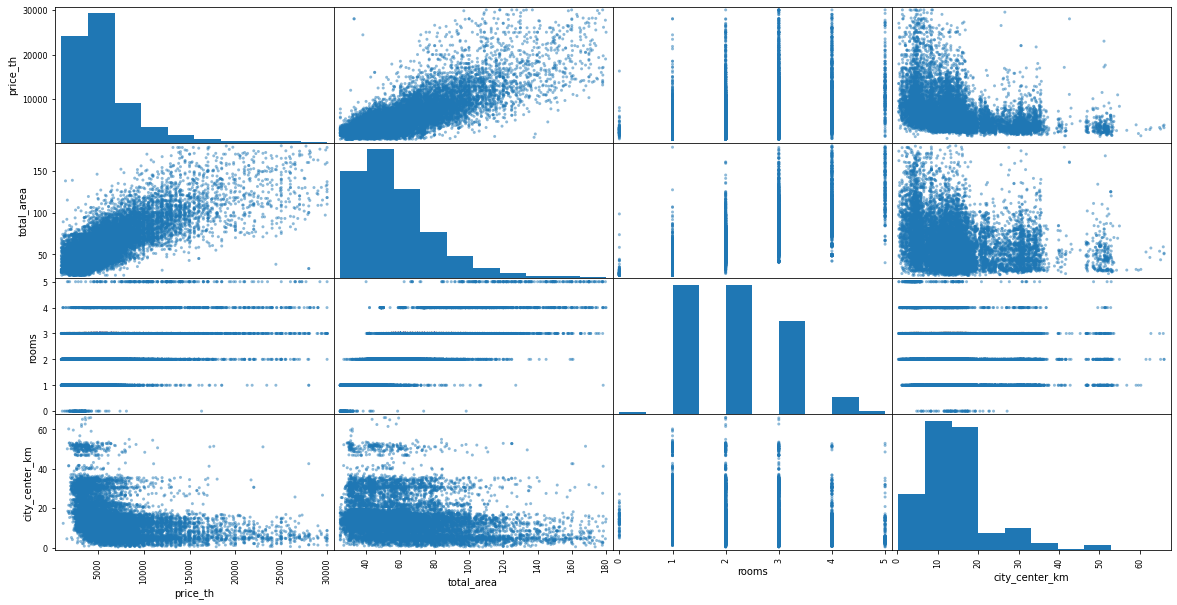

In [260]:
pd.plotting.scatter_matrix(data_cleared_corr, figsize=(20,10))

**Первоначальный датасет**

In [261]:
data_new_corr.corr()

,price_th,total_area,rooms,city_center_km
price_th,1.000000,0.653675,0.363343,-0.206747
total_area,0.653675,1.000000,0.758344,-0.231446
rooms,0.363343,0.758344,1.000000,-0.184864
city_center_km,-0.206747,-0.231446,-0.184864,1.000000


**Вывод**

Для вывода по степени корреляции будем придерживаться общепринятых границ:

Значение	Интерпретация
до 0,2	Очень слабая
до 0,5	Слабая
до 0,7	Средняя
до 0,9	Высокая
свыше 0,9	Очень высокая корреляция

- Первое, что можно заметить, что работа над выбросами оказалась не зря, влияние 5% очищенных строк датасета в ряде значений оказывает влияние больше 10 сотых коэффициента Пирсона (например влияние площади на цену по очищенному датасету 0.78, по неочищенному 0.65).

- Наибольшее влияние, что логично, на цену оказывает площадь квартиры, степерь влияния высокая, зависимость прямая. 

- Что интересно, влияние количества комнат на цену достаточно слабая (0.47), хотя кажется, что с ростом комнат должна расти и площадь (хотя и нелийнейно), что косвенно подтверждается высокой корреляцией комнат и площади (0.78). Однако же сам по себе показатель количества комнат не так сильно влияет на цену.

- Удаленность от центра, опять же, что логично, оказывает обратное влияние на цену, однако степень этого влияния достаточно слабая (-0.34).

#### от этажа

Категориальный признак формата string, в котором представлен столбец классификации этажей на: первый, последний и другой не поддерживает расчет коэффициента Пирсона. Можно было бы попробовать перевести эти классы в числовой вид (формата 0,1,2), однако для разнообразия попробуем выяснить разброс цен другим способом. 

**Очищенный датасет**

In [262]:
#Для начала изучим количество представленных вариантов

data_cleared['floor_cat'].value_counts()

другой       16688
последний     3066
первый        2732
Name: floor_cat, dtype: int64

In [263]:
print('Доля первых этажей:','{:.2%}'.format(data_cleared['floor_cat'].value_counts()[2] / len(data_cleared)))
print('Доля последних этажей:','{:.2%}'.format(data_cleared['floor_cat'].value_counts()[1] / len(data_cleared)))
print('Доля других этажей:','{:.2%}'.format(data_cleared['floor_cat'].value_counts()[0] / len(data_cleared)))

Доля первых этажей: 12.15%
Доля последних этажей: 13.64%
Доля других этажей: 74.22%


**Статистика для первого этажа**

In [264]:
data_cleared[data_cleared['floor_cat'] == 'первый']['price_th'].describe()

count     2732.000000
mean      4547.273792
std       2792.789774
min       1000.000000
25%       2900.000000
50%       3950.000000
75%       5400.000000
max      26000.000000
Name: price_th, dtype: float64

**Статистика для последнего этажа**

In [265]:
data_cleared[data_cleared['floor_cat'] == 'последний']['price_th'].describe()

count     3066.000000
mean      5396.183953
std       4002.698699
min       1000.000000
25%       3050.000000
50%       4280.000000
75%       6300.000000
max      29500.000000
Name: price_th, dtype: float64

**Статистика для других этажей**

In [266]:
data_cleared[data_cleared['floor_cat'] == 'другой']['price_th'].describe()

count    16688.000000
mean      5894.724053
std       3816.918536
min       1000.000000
25%       3600.000000
50%       4800.000000
75%       6800.000000
max      30000.000000
Name: price_th, dtype: float64

**Вывод**

Попробуем найти логичное объяснение той статистике, которую только что изучили:

- Первый этаж ценится меньше всего, средняя и медиана у нее меньше всех, ну еще бы, кто хочет жить на первом этаже, даже хорошего здания? 

- С последним и другими этажами не все так просто. Было бы очень интересно изучить цену последних этажей не в целом, а только новым и высоким зданиям, наверняками такие последние этажи, с хорошим видом, ценились бы лучше, чем какой нибудь 6 или 8. Однако имеем, что имеем, согласно средней и медиане, самые дорогие квартиры это не последние этажи. Видимо в не очень новых домах люди опасаются брать на последнем из-за возможных протечек крыши и прочих проблем. 

Таким образом можно подтвердить зависимость цены от этажа, где находится квартира. При этом разрыв в ценности между последним этажом и другими, не такой критичный, как первый. Они совсем не ценятся. 

#### от даты размещения

**От дня недели**

<AxesSubplot:xlabel='weekday'>

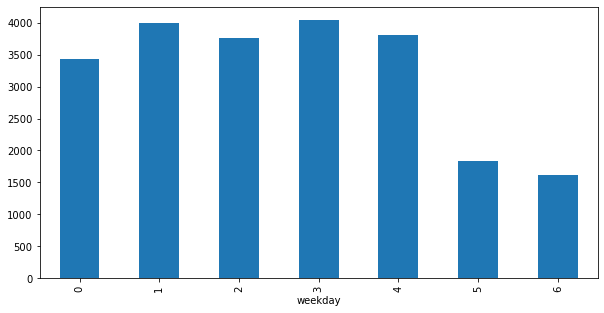

In [267]:
data_cleared.groupby('weekday')['price_th'].count().plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='weekday'>

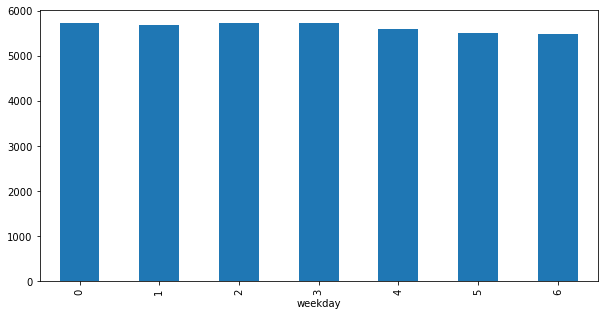

In [268]:
data_cleared.groupby('weekday')['price_th'].mean().plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='weekday'>

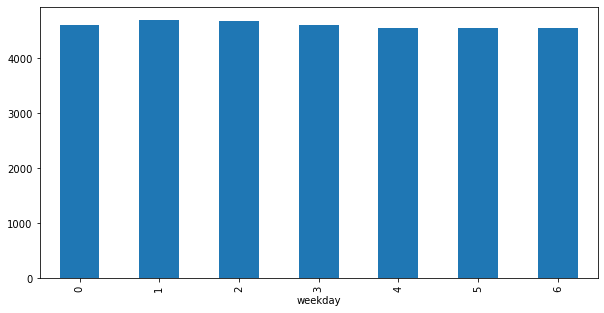

In [269]:
data_cleared.groupby('weekday')['price_th'].median().plot(kind='bar', figsize=(10,5))

**Вывод**

С учетом рассмотрения обоих графиков, врядли можно заявить о прямой зависимости цены и дня недели выставления объявления.
Что, впрочем, логично, т.к. покупка и продажа квартиры это не сходить за молоком в продуктовый, странно ожидать более высоких цен в выходные.
Также, если изучить график распределения количества объявлений, бросается в глаза явный провал в выходные дни по количеству (почти в 2 раза от значений будних дней).
Возможно это можно объяснить, что большая часть объявлений это не физические лица, а продажа от риелторов и агенств, которые работают по будним. 

**От месяца**

<AxesSubplot:xlabel='month'>

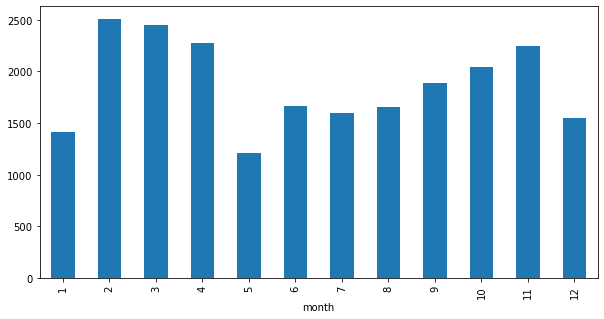

In [270]:
data_cleared.groupby('month')['price_th'].count().plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='month'>

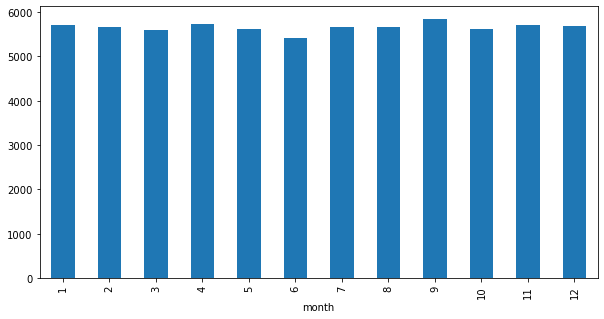

In [271]:
data_cleared.groupby('month')['price_th'].mean().plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='month'>

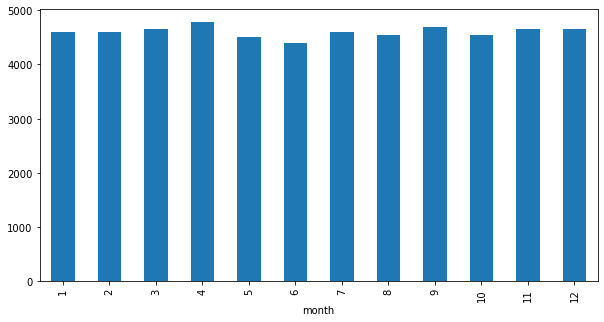

In [272]:
data_cleared.groupby('month')['price_th'].median().plot(kind='bar', figsize=(10,5))

**Выводы**

Если судить по количеству, то у нас опять микроподтверждение, что часть объявлений это агенства и риэлторы, т.к. имеются явные провалы по количеству объявлений в январе и мае, как месяцам с наименьшим количеством рабочих дней. Также интересен провал в количествах в декабре, скорее всего можно объяснить общим снижением деловой активности населения в этих вопросах перед новым годом, т.к. часто продажа квартиры совпровождается со встречной покупкой новой и переездом, что, в новогодние праздники не очень удобно делать. 
Наибольшая активность замечена в феврале, марте, апреле, октябре и ноябре. Остальные месяца отстают, видимо, по причине сезона отпусков (с мая по сентябрь). 

Связи же месяца выставления объявления с ценой, опять же, явной не замечено.

**От года**

<AxesSubplot:xlabel='year'>

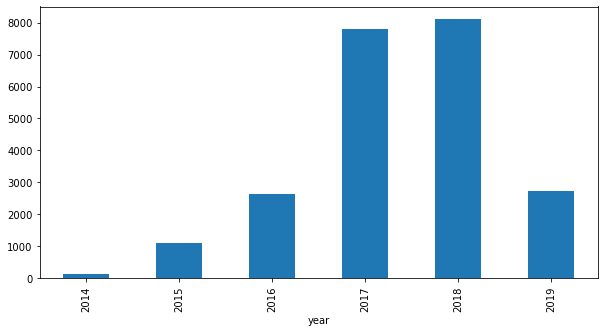

In [273]:
data_cleared.groupby('year')['price_th'].count().plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='year'>

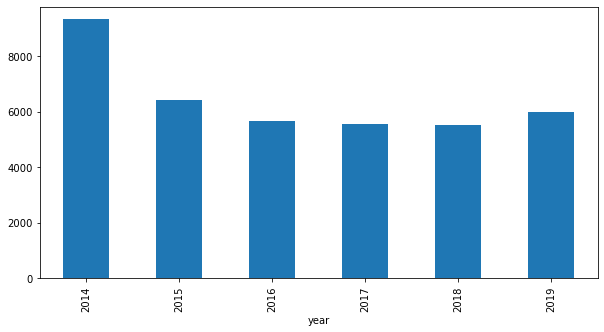

In [274]:
data_cleared.groupby('year')['price_th'].mean().plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='year'>

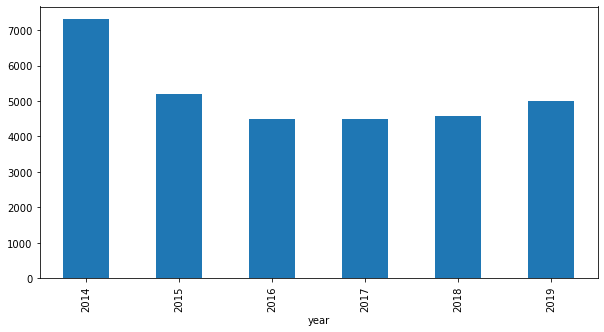

In [275]:
data_cleared.groupby('year')['price_th'].median().plot(kind='bar', figsize=(10,5))

**Выводы**

Максимальное количество объявлений приходится на 2017 и 2018 года. Минимум в 2019 объясняется тем, что выборка была выгружена в мае 2019.
Минимумы же в 2014-2016 могут объясняться количеством активных пользователей сервиса.

Таким образом, максимум в цене за 2014 да и 2015 года не считаю релевантным из-за маленькой выборки. И напротив, динамика 2017-2019 с небольшим ростом медианы и средней отражает реальную инфляцию в стоимости квартир. 

### Изучение населенных пунктов

Создадим сводную таблицу с группировкой по населенным пунктам, где расчитаем количество объявлений, а также среднюю по стоимости квадратного метра.

In [276]:
data_cleared.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      14948
посёлок Мурино         491
посёлок Шушары         434
Всеволожск             390
Пушкин                 353
Колпино                335
посёлок Парголово      324
Гатчина                303
деревня Кудрово        286
Выборг                 222
Name: locality_name, dtype: int64

In [277]:
data_cities = data_cleared.pivot_table(index='locality_name', values='price_sq_m', aggfunc=['count', 'mean'])
data_cities.columns = ['Количество объявлений' ,'Средняя цена за кв. м']
data_cities = data_cities.sort_values(by='Количество объявлений', ascending=False)
data_cities = data_cities.head(10)
data_cities

,Количество объявлений,Средняя цена за кв. м
locality_name,,
Санкт-Петербург,14948,109.884132
посёлок Мурино,491,84.592668
посёлок Шушары,434,77.785714
Всеволожск,390,68.184615
Пушкин,353,102.101983
Колпино,335,74.788060
посёлок Парголово,324,90.021605
Гатчина,303,68.468647
деревня Кудрово,286,91.611888


In [278]:
print('Наибольшая цена за квадратный метр')
data_cities.sort_values(by='Средняя цена за кв. м', ascending=False).head(1)

Наибольшая цена за квадратный метр


,Количество объявлений,Средняя цена за кв. м
locality_name,,
Санкт-Петербург,14948,109.884132


In [279]:
print('Наименьшая цена за квадратный метр')
data_cities.sort_values(by='Средняя цена за кв. м').head(1)

Наименьшая цена за квадратный метр


,Количество объявлений,Средняя цена за кв. м
locality_name,,
Выборг,222,57.923423


**Вывод**

Вполне ожидаемый результат, что самая дорогая жилплощадь в среднем в Санкт-Петербурге, а самая дешевая, из топ-10 по количеству объявлений в Выборге, который наиболее удален от Питера.

### Поиск центра Санкт-Петербурга

Создадим отдельный датасет с данными только по Санкт-Петербургу, удалим строки с пропусками в данных по расстоянию до центра города, потом округлим данные в столбце city_center_km до целого числа и создадим график зависимости цены по сгруппированному по км датасету.

In [280]:
data_spb = data_cleared.query('locality_name == "Санкт-Петербург"')
data_spb = data_spb.dropna(subset=['city_center_km'])
data_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14898 entries, 0 to 23697
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_th         14898 non-null  int32  
 1   price_sq_m       14898 non-null  int32  
 2   total_area       14898 non-null  float64
 3   rooms            14898 non-null  int64  
 4   ceiling_height   14898 non-null  float64
 5   floor_cat        14898 non-null  object 
 6   location_cat     14898 non-null  object 
 7   locality_name    14898 non-null  object 
 8   city_center_km   14898 non-null  float64
 9   days_exposition  13018 non-null  float64
 10  year             14898 non-null  int64  
 11  month            14898 non-null  int64  
 12  weekday          14898 non-null  int64  
dtypes: float64(4), int32(2), int64(4), object(3)
memory usage: 1.5+ MB


In [281]:
data_spb['city_center_km'] = data_spb['city_center_km'].astype('int')

In [282]:
data_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14898 entries, 0 to 23697
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_th         14898 non-null  int32  
 1   price_sq_m       14898 non-null  int32  
 2   total_area       14898 non-null  float64
 3   rooms            14898 non-null  int64  
 4   ceiling_height   14898 non-null  float64
 5   floor_cat        14898 non-null  object 
 6   location_cat     14898 non-null  object 
 7   locality_name    14898 non-null  object 
 8   city_center_km   14898 non-null  int32  
 9   days_exposition  13018 non-null  float64
 10  year             14898 non-null  int64  
 11  month            14898 non-null  int64  
 12  weekday          14898 non-null  int64  
dtypes: float64(3), int32(3), int64(4), object(3)
memory usage: 1.4+ MB


In [283]:
data_spb.head(5)

,price_th,price_sq_m,total_area,rooms,ceiling_height,floor_cat,location_cat,locality_name,city_center_km,days_exposition,year,month,weekday
0,13000,120,108.0,3,2.70,другой,Санкт-Петербург,Санкт-Петербург,16,NaN,2019,3,3
2,5196,92,56.0,2,2.55,другой,Санкт-Петербург,Санкт-Петербург,13,558.0,2015,8,3
4,10000,100,100.0,2,3.03,другой,Санкт-Петербург,Санкт-Петербург,8,121.0,2018,6,1
7,7915,110,71.6,2,2.75,другой,Санкт-Петербург,Санкт-Петербург,11,NaN,2019,4,3
9,5400,88,61.0,3,2.50,другой,Санкт-Петербург,Санкт-Петербург,15,289.0,2017,2,6


<AxesSubplot:xlabel='city_center_km'>

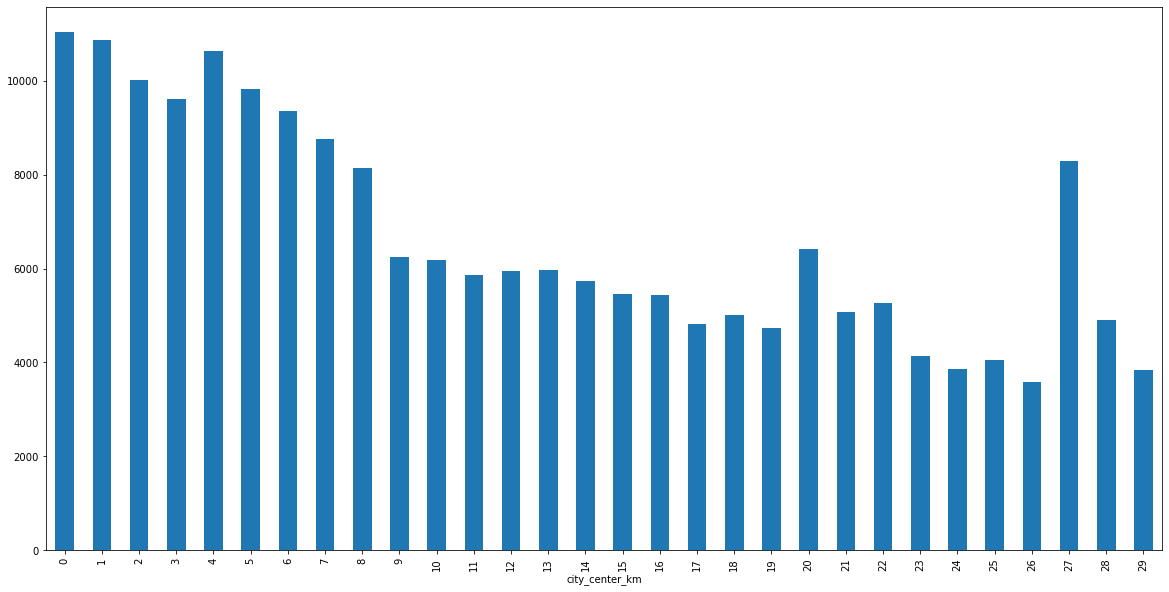

In [284]:
data_spb.groupby('city_center_km')['price_th'].mean().plot(kind='bar', figsize=(20,10))

Наибольшее изменение цены происходит с 7 на 8 км. Соответсвенно центр лежит примерно в границах 7 км.

### Работа с квартирами в центре

Создадим отдельный датасет с данными по центру города

In [285]:
data_spb_centre = data_spb.query('city_center_km <= 7')

In [286]:
data_spb_centre.head(5)

,price_th,price_sq_m,total_area,rooms,ceiling_height,floor_cat,location_cat,locality_name,city_center_km,days_exposition,year,month,weekday
24,6500,66,97.2,2,2.80,первый,Санкт-Петербург,Санкт-Петербург,2,265.0,2015,10,5
35,15500,104,149.0,5,3.05,другой,Санкт-Петербург,Санкт-Петербург,3,644.0,2017,6,0
61,7990,107,74.0,2,3.10,последний,Санкт-Петербург,Санкт-Петербург,4,609.0,2017,8,3
63,20000,169,118.0,3,3.00,другой,Санкт-Петербург,Санкт-Петербург,4,37.0,2018,9,1
94,3500,118,29.5,1,2.50,другой,Санкт-Петербург,Санкт-Петербург,7,4.0,2019,4,4


#### Анализ площади, цены, числа комнат и высоты потолков

In [287]:
data_spb_centre.describe()

,price_th,price_sq_m,total_area,rooms,ceiling_height,city_center_km,days_exposition,year,month,weekday
count,3116.00000,3116.000000,3116.00000,3116.000000,3116.000000,3116.000000,2646.000000,3116.000000,3116.000000,3116.000000
mean,9901.58344,128.912709,77.39354,2.541399,2.941362,4.291399,239.752079,2017.184531,6.439345,2.520218
std,5239.18262,45.846265,31.15393,1.055698,0.271108,1.720932,267.156168,1.112153,3.444377,1.726363
min,1600.00000,15.000000,25.00000,0.000000,2.500000,0.000000,3.000000,2014.000000,1.000000,0.000000
25%,6335.75000,99.000000,53.07500,2.000000,2.750000,3.000000,60.000000,2017.000000,3.000000,1.000000
50%,8452.50000,120.000000,72.00000,2.000000,3.000000,4.000000,135.500000,2017.000000,6.000000,3.000000
75%,11990.00000,147.250000,95.80000,3.000000,3.100000,6.000000,332.000000,2018.000000,10.000000,4.000000
max,30000.00000,848.000000,179.60000,5.000000,3.600000,7.000000,1512.000000,2019.000000,12.000000,6.000000


In [288]:
data_spb.describe()

,price_th,price_sq_m,total_area,rooms,ceiling_height,city_center_km,days_exposition,year,month,weekday
count,14898.000000,14898.000000,14898.000000,14898.000000,14898.000000,14898.000000,13018.000000,14898.000000,14898.000000,14898.000000
mean,6700.333199,109.809974,59.892802,2.081152,2.719393,11.383407,179.690505,2017.354343,6.427171,2.555377
std,4005.254123,31.376215,25.709409,0.971532,0.219369,4.697180,221.459676,1.051868,3.459811,1.782358
min,1200.000000,15.000000,25.000000,0.000000,2.500000,0.000000,1.000000,2014.000000,1.000000,0.000000
25%,4200.000000,90.000000,41.600000,1.000000,2.550000,8.000000,42.000000,2017.000000,3.000000,1.000000
50%,5400.000000,103.500000,54.000000,2.000000,2.700000,12.000000,93.000000,2017.000000,6.000000,2.000000
75%,7700.000000,122.000000,71.800000,3.000000,2.800000,15.000000,225.000000,2018.000000,10.000000,4.000000
max,30000.000000,848.000000,180.000000,5.000000,3.600000,29.000000,1553.000000,2019.000000,12.000000,6.000000


**Вывод**

- Площадь, средняя и медианная площадь в центре значительно выше (на 29% и 33% соответственно). Что объясняется старым фондом со старой планировкой, все муравейники с малым метражем вынесены к окраинам города. 

- Цена в среднем в центре выше на 48% в целом за квартиру и на 17% за квадратный метр.

- Среднее число комнат в центре стремится к 3 (2,55), тогда как по городо оно около 2 (2,1). При этом медиана одинаковая и равна 2.

- Высота потолков в центре выше в среднем на 22 см или 8%, медианное значение в центре = 3 м, тогда как по городу - 2,7 м

#### Факторный анализ влияния параметров на цену

**Число комнат в центре**

In [289]:
data_spb_centre['price_th'].corr(data_spb_centre['rooms'])

0.3978892054104584

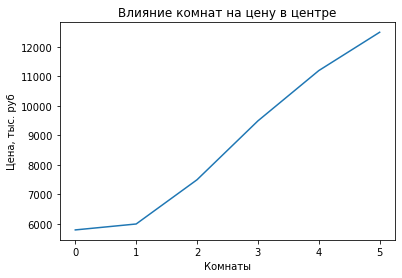

In [290]:
data_spb_centre.groupby('rooms')['price_th'].median().plot()


plt.title('Влияние комнат на цену в центре')
plt.xlabel('Комнаты')
plt.ylabel('Цена, тыс. руб')
plt.show()

**Число комнат по городу**

In [291]:
data_spb['price_th'].corr(data_spb['rooms'])

0.5090526964998013

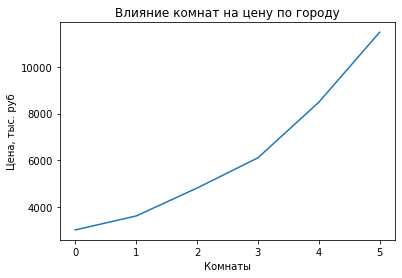

In [292]:
data_cleared.groupby('rooms')['price_th'].median().plot()


plt.title('Влияние комнат на цену по городу')
plt.xlabel('Комнаты')
plt.ylabel('Цена, тыс. руб')
plt.show()

**Вывод**

Влияние числа комнат в центре на цену квартиры несколько меньше, чем по городу. С учетом бОльшей средней площади в центре, это может быть вызвано особенностями планировки квартир в центре, где на 1 комнату приходится больше квадратных метров, чем в целом по городу. 

Также на графиках виден более резкий подъем цены при росте комнат с 1 на 2-3, тогда как студии и однушки в центре оцениваются примерно одинаково.

**Удаленность от центра ПО центру**

In [293]:
data_spb_centre['price_th'].corr(data_spb_centre['city_center_km'])

-0.08713031889412294

**Удаленность от центра по городу**

In [294]:
data_spb['price_th'].corr(data_spb['city_center_km'])

-0.39962203960756476

**Вывод**

Влияние на цену удаленности от центра ПО центру минимально, т.к. квартира и так находится в центре))
На перифирии это влияние уже сильнее сказывается на цене. 

**Этажи в центре**

In [295]:
print('Средняя цена на первом этаже в центре:', '{:.0f}'.\
      format(data_spb_centre[data_spb_centre['floor_cat'] == 'первый']['price_th'].mean()))
print('Средняя цена на последнем этаже в центре:', '{:.0f}'.\
      format(data_spb_centre[data_spb_centre['floor_cat'] == 'последний']['price_th'].mean()))
print('Средняя цена на других этажах в центре:', '{:.0f}'.\
      format(data_spb_centre[data_spb_centre['floor_cat'] == 'другой']['price_th'].mean()))

Средняя цена на первом этаже в центре: 7392
Средняя цена на последнем этаже в центре: 9908
Средняя цена на других этажах в центре: 10303


**Этажи по городу**

In [296]:
print('Средняя цена на первом этаже в городе:', '{:.0f}'.\
      format(data_spb[data_spb['floor_cat'] == 'первый']['price_th'].mean()))
print('Средняя цена на последнем этаже в городе:', '{:.0f}'.\
      format(data_spb[data_spb['floor_cat'] == 'последний']['price_th'].mean()))
print('Средняя цена на других этажах в городе:', '{:.0f}'.\
      format(data_spb[data_spb['floor_cat'] == 'другой']['price_th'].mean()))

Средняя цена на первом этаже в городе: 5597
Средняя цена на последнем этаже в городе: 6868
Средняя цена на других этажах в городе: 6819


**Вывод**

Законномерность с более дешевым первым этажом характерна для всего города без исключения, однако в среднем по городу выявилась интересная законномерность, что последний этаж самый дорогой. Чего не заметно по центру, там самые дорогие это иные этажи. 
Возможно это опять же вызвано более старым фондом в центре и плохим состоянием крыш. 
Ну а в среднем по городу, с учетом строительства нового многоэтажного жилья, у людей начинают пользоваться спросом видовые квартиры на последних этажах. 

**День размещения объявления**

**Центр**

<AxesSubplot:xlabel='weekday'>

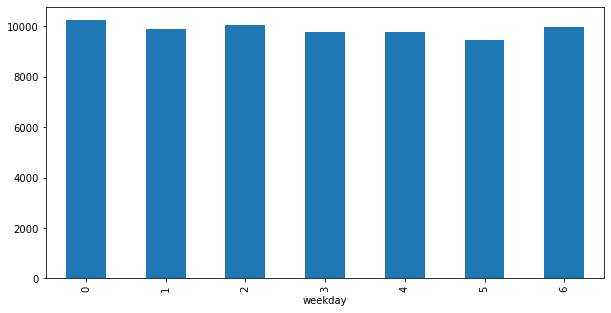

In [297]:
data_spb_centre.groupby('weekday')['price_th'].mean().plot(kind='bar', figsize=(10,5))

**Весь город**

<AxesSubplot:xlabel='weekday'>

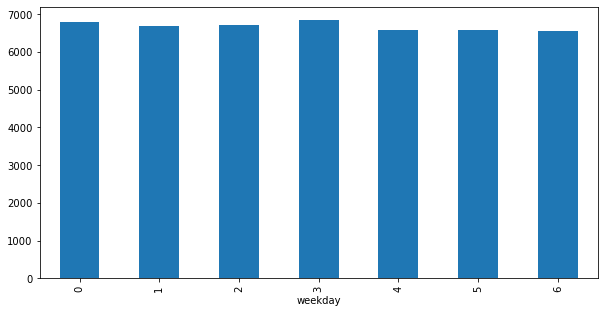

In [298]:
data_spb.groupby('weekday')['price_th'].mean().plot(kind='bar', figsize=(10,5))

**Месяц размещения объявления**

**Центр**

<AxesSubplot:xlabel='month'>

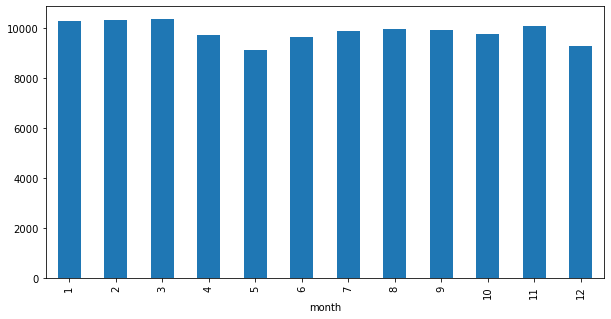

In [299]:
data_spb_centre.groupby('month')['price_th'].mean().plot(kind='bar', figsize=(10,5))

**Весь город**

<AxesSubplot:xlabel='month'>

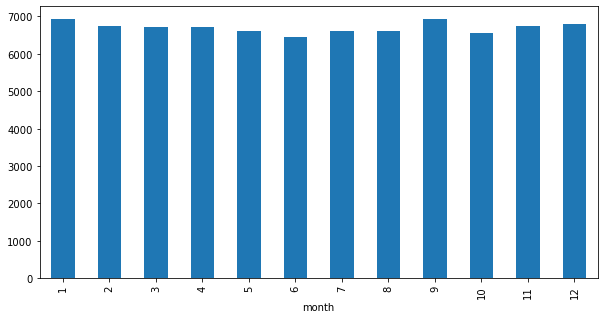

In [300]:
data_spb.groupby('month')['price_th'].mean().plot(kind='bar', figsize=(10,5))

**Год  размещения объявления**

**Центр**

<AxesSubplot:xlabel='year'>

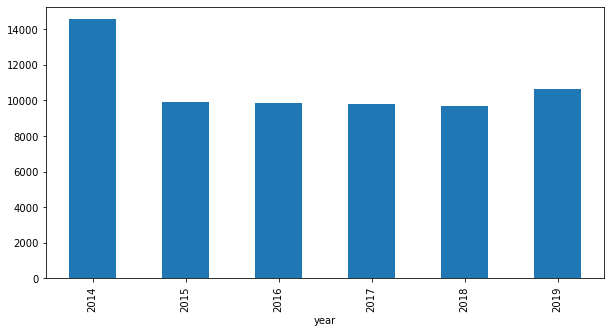

In [301]:
data_spb_centre.groupby('year')['price_th'].mean().plot(kind='bar', figsize=(10,5))

**Весь город**

<AxesSubplot:xlabel='year'>

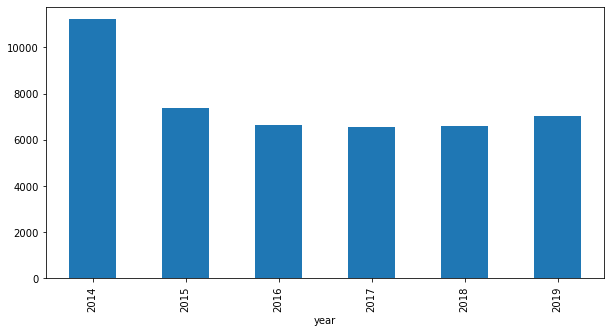

In [302]:
data_spb.groupby('year')['price_th'].mean().plot(kind='bar', figsize=(10,5))

**Вывод**

Сильной зависимости цены от дня размещения объявления не выявлено.
Аналогичная ситуация и по году - там картинка схожа уже с ранее проведенным анализом. Выброс в 2014 из-за малого числа квартир и далее в 2016-2019 годах постепенный инфляционный рост.
Однако по месяцу размещения объявления есть небольшие отличия. 
Так, в центре наблюдается незначительный провал в мае и декабре, который также характерен и для всего датасета. Тогда как в целом по городу предложение в целом одинаково в течении года. 

In [303]:
print('Медиана цены квартиры в центре города:', data_spb_centre['price_th'].median())
print()
print('Медиана цены квартиры в городе:', data_cleared['price_th'].median())
print()
print('Медиана площади квартиры в центре города:', data_spb_centre['total_area'].median())
print()
print('Медиана площади квартиры в городе:', data_cleared['total_area'].median())

Медиана цены квартиры в центре города: 8452.5

Медиана цены квартиры в городе: 4600.0

Медиана площади квартиры в центре города: 72.0

Медиана площади квартиры в городе: 51.6


## Общий вывод

Итак, мы провели достаточно большую работу, смогли восстановить большой пласт данных в части столбцов разными способами, в том числе и через поиск аналогичного здания с наличием интересующей нас информации, есть надежда, что такой способ закрыл пропуски с высокой точностью.

В рамках исследовательского анализа было выявлено, что чистка от выбросов повышает часть корреляционного анализа, а также прямую связь цены и площади с высокой зависимостью, однако влияние количества комнат достаточно слабым, не смотря на прямую зависимость роста числа комнат от роста площади квартиры.
В свою очередь зависимость цены от расстояния до центра (обратная) достаточно слабая, хотя не брать её в расчет нельзя. Также, стоит отметить, что влияние удаленности от центра по сегменту квартир в центре минимально, тогда как в целом по городу выше (-0,085 против -0,4).

Выявлено, что первый этаж представляет наименьшую ценность. А последний более ценен за пределами центра, тогда как в центре он на втором месте после остальных. 

Дата размещения не оказывает значительного влияния на цену объектов, поэтому отклонения в этом разделе следует отнести к естественным колебаниям значений. 

Самый дешевый населенный пункт из Топ-10 по объявлениям, Выборг. Ну и правда, какую конкуренцию он мог составить Мурино или Шушарам?))
Второе по ценности место после Санкт-Петербурга – город Пушкин. 

Центр города по ценовому фактору определяется в границах 7 км. Падение средней стоимости квартиры с 7 на 8 км составляет почти 2 млн. рублей.